In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
#Importing the data
data_train = pd.read_csv('Train.csv')
data_test = pd.read_csv('Test.csv')

In [3]:
data_train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [4]:
data_test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

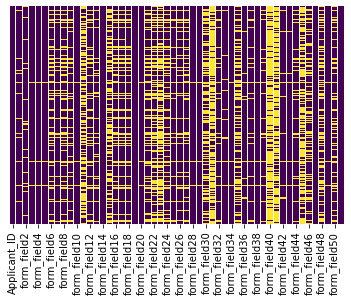

In [6]:
#Checking for missing values
sns.heatmap(data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
#Checking for null values
data_train.isnull().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
#Encoding to a numeric data
label_encoder = LabelEncoder()
data_train['form_field47'] = label_encoder.fit_transform(data_train['form_field47'])

In [10]:
data_train

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0000,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,0,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0000,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,0,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0000,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,0,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0000,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,0,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0000,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,0,97.887502,1.427891,0.045630,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,Apcnt_999968,3740.0,0.01730,0.0000,0.0000,0.000,770998.0,9637475.0,4047934.0,11641992.0,...,0.000000,9.09,0.730040,NaN,0.0,1,591.048913,0.000000,0.241598,no
55996,Apcnt_999972,3360.0,2.01145,0.6252,0.0000,0.000,NaN,927765.0,NaN,NaN,...,0.297913,30.30,0.498208,NaN,0.0,1,NaN,0.000000,NaN,yes
55997,Apcnt_999980,3500.0,0.76640,0.0000,0.0000,0.000,118645.0,3662435.0,3662435.0,3585024.0,...,0.550000,3.03,0.450512,0.0,0.0,1,1252.474467,2.000000,0.163153,no
55998,Apcnt_999988,3280.0,0.05235,2.0916,2.2212,0.000,NaN,3458599.0,NaN,115533.0,...,0.942854,0.00,0.705048,1.0,0.0,0,NaN,0.000000,0.002997,no


In [11]:
data_train.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [12]:
#Columns to be used while training
feature_columns = ['form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field50', 'default_status']

In [13]:
data_train.drop('Applicant_ID',axis=1,inplace=True)

In [15]:
#Replacing missing 
for column in data_train.columns:
    data_train_mean = data_train[column].mean()
    data_train[column].fillna(data_train_mean, inplace = True)
    print(data_train.isnull().sum())

form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0
form_field50      0


dtype: int64
form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0
form_fi

form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0
form_field50      0


form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0
form_field50      0


dtype: int64
form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0
form_fi

form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0
form_field50      0


TypeError: Could not convert nonoyesnononoyesnonoyesnonononononoyesnoyesnononoyesnonononononoyesnonoyesyesnononononononononononononononononoyesnonononononononoyesnonoyesyesyesnononononononoyesnoyesnoyesnononononononoyesnononoyesnonononoyesnonononoyesnonoyesnoyesnononoyesyesnononononononononoyesnonononononononononoyesnoyesnononononononononononononononononononononoyesnononononononononononoyesnoyesyesyesyesnonononononononoyesnonononoyesnonoyesnoyesnoyesyesyesnononononoyesnoyesyesnonononoyesyesyesnonononoyesnoyesnoyesnononoyesyesnonoyesnoyesnoyesyesnononoyesnononoyesnonononoyesnoyesyesnonononoyesyesnoyesnonoyesnonoyesnononononononononononononoyesnononoyesnonononononononononononononononononononononononononoyesnonononoyesnononononononoyesyesyesnoyesyesnoyesnoyesnoyesnonononoyesnononononononononoyesnononoyesnonoyesyesnoyesyesnonononononononononononononononononononoyesnonoyesnonononononoyesnonononoyesyesnonononononoyesnoyesyesnoyesnonononoyesyesyesnonononononononononononononononononononoyesnononoyesnoyesyesyesnonoyesnonononoyesnononoyesyesnoyesnonononoyesnoyesyesyesnononononononononoyesnononononoyesnonononononononoyesyesnoyesnonoyesnononononononoyesnononoyesnonoyesyesnonoyesyesnonononononoyesyesnonononoyesnoyesyesyesnononononononoyesyesnoyesnoyesnononoyesnononononononononononoyesnonononononoyesnononoyesnonononononononononononoyesnonononononononononononononoyesnonononononoyesnonoyesnononononononoyesyesyesyesnonononononononoyesyesnoyesnonononoyesyesnoyesnononononoyesnonoyesnonononoyesnoyesnoyesnonononoyesyesnononononononononononononononononononoyesnoyesnonononoyesnonoyesnonoyesnononoyesnonononoyesnonoyesnonononoyesyesnoyesnonononoyesyesyesyesyesnoyesyesyesnonononononoyesyesnoyesyesnoyesnonoyesnononoyesnononononononononononoyesnonononononononononononoyesnonononononononononoyesnoyesnonononoyesyesyesnononoyesnonononoyesnononononononononoyesnoyesnononononoyesyesnonononoyesnonononononoyesyesnononoyesnononononoyesnononononononoyesyesnoyesnonononoyesnononononoyesnonoyesnononononononononononononoyesnonoyesnoyesnonononononoyesnoyesyesnoyesnononoyesnonoyesnononononoyesnoyesnonoyesyesyesnononononononononononononoyesnonononononoyesnononononononononononoyesyesyesnonoyesnononoyesnononononononononoyesyesnoyesnonononononononononononononononononononoyesyesnonononoyesnonoyesnonononononononoyesyesnoyesyesnononononoyesnonoyesnoyesnoyesnononononoyesyesnononoyesyesnonoyesnonononoyesnononoyesnonononoyesnononononononononoyesnononoyesyesyesnononononononononononononononoyesnonoyesnoyesnonoyesnoyesnonoyesyesnoyesnonononoyesyesnonononononononoyesyesyesyesnonoyesnononoyesnoyesnononononononononononoyesnonoyesnoyesnonoyesyesnonononoyesnononononoyesnonoyesnoyesnoyesnoyesnononoyesyesnoyesyesnonononononononononononononononoyesnonononononononononoyesnononononononoyesnononononononononononononononoyesnonononononoyesnoyesyesnoyesyesnononononoyesyesnonoyesyesnoyesnoyesnonononononononoyesnononononoyesnononoyesnonoyesnonononononoyesyesyesnonononononoyesnononononononononononoyesnononononononoyesyesnonononononoyesnonononononononoyesyesnonononoyesyesnoyesyesyesnonoyesnoyesnononoyesyesnonononoyesnoyesnonononononononononononononoyesnonoyesyesnononononoyesnononononononononononononononoyesnononononononononoyesnononoyesnonononononoyesnonoyesnonoyesnononononoyesyesnonononononoyesnononoyesyesyesnonononononoyesnononononoyesnoyesnonoyesnoyesnoyesnonoyesnoyesnoyesnononononononononoyesnoyesnoyesnoyesnononononoyesnoyesnonononoyesnononononoyesnononononononononononononononoyesnononononononononoyesnonononononononononoyesnonononononononononoyesnononononoyesnoyesyesnoyesyesnoyesyesnonononononononononononononononononononononononononononononononononononoyesnononononoyesnoyesnononoyesnononononononononononoyesnonononoyesyesnonononononoyesyesyesnoyesnoyesnonoyesyesyesnoyesnonononononononoyesnonoyesnononononononononononoyesnoyesnonononononoyesnononononononononononononononoyesnoyesyesnononoyesnononononoyesnonoyesnonononononononononononoyesnonononononononoyesyesyesyesnoyesnononoyesyesnonoyesnoyesnononononononononononoyesnonononononononoyesnononoyesnonoyesnoyesnonoyesnonononononononononoyesnonononononononononononononononononononoyesnonoyesnonononononononononononononoyesnonononoyesnononononononononoyesyesnoyesnonononononononoyesnoyesnononoyesnonononononononononoyesnononoyesnonononononononoyesnonononoyesnonoyesnononoyesyesyesnoyesnoyesnonononononononoyesnononoyesyesnonononoyesnonoyesyesnonoyesnononononononoyesnononoyesnonoyesnononononoyesnononononoyesyesnonononononononononononoyesyesyesyesnononononoyesnononononoyesyesnonoyesnoyesnoyesnoyesyesnoyesnonononononononononononononononoyesnonononononononononoyesnonononononononononononononononoyesnonononononoyesyesnonononononononononononononoyesnononononononoyesnoyesnonoyesnonoyesnonononononononoyesnonoyesyesnoyesyesyesnonononononoyesnonononoyesnononononononononononononononononoyesnoyesnoyesnoyesnoyesnonononoyesnonoyesnononoyesyesnoyesyesyesyesnonononoyesnononoyesnononononoyesnoyesnoyesnonoyesnonononononononononoyesnononoyesnonononononoyesnonononononoyesyesyesyesnononoyesnononononononononoyesnononononononoyesnononononoyesnonoyesyesyesnononoyesnonononoyesnonononononoyesyesyesnonononoyesnonononoyesyesyesnononononononononononoyesnoyesnononononoyesnononononononononononononononoyesnonoyesnonononononoyesyesyesnononononononononoyesnoyesnoyesnoyesnoyesnonoyesnononoyesyesnononoyesnononononononononononononononononononononononononononononononononononononononononononononoyesnononononononoyesnononononononononononononononoyesnonononononoyesyesnonononononononononononononononononoyesnononoyesnonoyesnonoyesyesnoyesnonononononononononononononononoyesnononononononononoyesyesnononononononononononoyesnoyesyesnonononononoyesyesyesnononoyesyesnonononononononoyesnononononoyesyesyesnonoyesnononononononononononononononononononononononoyesnonoyesnonononononononononononononononononononononoyesnonononononononoyesyesnonoyesnoyesnononoyesnonononononoyesnoyesnonononononoyesnoyesnonononononononoyesyesyesnononononoyesnononoyesyesnononononononoyesnononoyesyesyesnonononononononononononononononononoyesnonoyesyesnonononoyesnonononoyesnoyesnoyesnoyesnoyesyesnononoyesnonoyesnonoyesnononononoyesnoyesnoyesnoyesyesyesyesyesyesnonoyesnononononononononononononononononononononononononononononoyesnoyesnononoyesnononononoyesnonononononononononoyesnononoyesnonononononoyesyesnoyesnononoyesyesnononoyesnonoyesnoyesnonononononononononononononoyesnonononononoyesnonoyesnononoyesyesnonononoyesnononononoyesnonoyesnonononoyesnonononononoyesnonononononononononoyesnoyesnononoyesyesyesnoyesyesnoyesnonononoyesnonoyesnonoyesnonononoyesnonononononoyesyesnonoyesnoyesnonoyesyesnononononononononononononononoyesnonononononononononoyesyesyesnononononononononononoyesnononononononoyesnononononononononononononononononononononononononononononononoyesnonoyesnononoyesnonoyesnonoyesnonononononononoyesnoyesnonoyesnonoyesnonononoyesnononoyesnononoyesyesnoyesnonoyesnononononoyesyesyesnonoyesnononoyesyesnoyesnononononoyesnoyesnoyesnonononononoyesnononoyesyesnoyesyesnoyesnononononoyesnonononoyesnonononononononononononoyesnonoyesnoyesnonoyesnonoyesnonononoyesnonoyesnonoyesyesnoyesnonoyesyesyesyesnonononoyesyesnonoyesnononoyesnonoyesyesnonoyesnonoyesyesyesyesnonononononononononononononoyesyesnoyesnoyesnonoyesnononononononononononononononononononoyesnonoyesnononoyesnoyesnonononononononoyesnononononoyesyesnonononoyesnonoyesyesnononoyesyesnonoyesnonononononoyesnononononononononoyesyesnononononoyesyesnononoyesyesnonoyesyesnonononoyesnonoyesnoyesnononoyesnononononoyesnonononoyesnonononononononononononoyesnoyesyesyesnononoyesnononoyesnoyesyesnoyesyesyesnoyesnononononoyesyesyesnonononoyesnoyesnononoyesnonoyesnononoyesnonononononononoyesnononoyesnononoyesyesnoyesyesnonononoyesyesyesyesnonononononononononononononononoyesnononononoyesnononononononoyesnonononononononoyesnonononononoyesnononononononononoyesnoyesyesnononononoyesyesnonoyesnononoyesnononoyesyesnoyesnonononoyesnonoyesnoyesnonoyesyesyesnoyesyesyesnonoyesnononononoyesnonononoyesnononononononoyesnoyesnononoyesnoyesnonononononoyesyesnononononononononononoyesnonoyesyesnonoyesnonoyesnoyesnononoyesyesnonononoyesnonoyesnoyesyesnoyesnoyesnoyesnonoyesyesyesyesnoyesnononoyesnononoyesnoyesnonononoyesyesnonoyesyesnononononoyesnonononoyesnoyesnoyesyesnoyesnoyesyesnonononononoyesnononoyesnononononononononononononononononononononononononononononononononoyesyesnonoyesnononononononononononononononoyesnononononoyesnonononoyesyesnonoyesyesnonoyesnononononoyesnoyesnononononoyesyesnoyesnononononononoyesyesnonononononononononononoyesnonononoyesyesnoyesnoyesnoyesnononononononoyesnoyesnonononononononoyesnonononoyesyesyesnonononoyesyesnononononoyesnononoyesnoyesnonoyesnonononoyesnonoyesnonononononononononoyesnonoyesyesyesyesnononononononononoyesnonononononoyesnonononoyesnonononononononononononononononononononononononoyesnonononoyesnoyesnonononononoyesnonoyesnoyesnoyesnononononononononononoyesyesnoyesnoyesnononoyesnoyesnoyesnoyesnononoyesyesyesyesnononononononoyesnonononononononononoyesnonononoyesnoyesnoyesnoyesnonononononononononononoyesnonononoyesnoyesnoyesyesnoyesyesyesnonononononononononoyesnonononononononononononononononoyesyesyesnonononoyesnonononoyesnoyesnonoyesnoyesnononoyesyesnononononoyesyesnonononononononoyesyesnononoyesnoyesnononoyesnonoyesyesyesnononoyesnoyesnonononononononononoyesnonoyesnononoyesyesnononoyesnoyesyesnoyesnononononononoyesyesyesnononononononononononononononoyesnonononononononononoyesnononononoyesnoyesnoyesnonononononoyesnononoyesnoyesnoyesnoyesyesnonoyesyesyesnonononononononononononononoyesnonononoyesnonononoyesnononononoyesyesnononoyesnononononoyesnononononoyesnonoyesyesnonoyesnoyesnoyesnoyesyesyesnonononononoyesnononoyesyesnonononononoyesyesyesnonoyesyesyesnoyesyesnoyesnononoyesnonoyesyesyesyesnoyesnononononoyesnonononoyesyesyesyesnoyesnononoyesnononononoyesyesnononoyesyesyesnoyesyesyesnononononononoyesnoyesnonoyesyesnononoyesyesyesyesnonoyesnonononononononononononononononononononoyesnononononoyesyesnonononononononononononononononononononononoyesnononoyesnonoyesnonoyesnoyesnonoyesyesyesnonononoyesyesnoyesnononoyesnonononononoyesnonononoyesnoyesyesnononoyesyesnonoyesnoyesyesnonononoyesnononoyesnononononoyesyesnoyesnononononononononononononoyesyesnononoyesnononononoyesnonoyesnoyesnoyesnoyesnoyesnononononononoyesnononononononoyesyesnoyesyesyesyesyesnononoyesnoyesnononoyesyesyesnonoyesnonoyesnoyesnononoyesnononoyesnononononoyesnononoyesnononononononononoyesnononoyesyesyesnonononoyesyesyesyesnononoyesnonoyesnononononononononoyesnononononononoyesyesnonoyesnonononononononononononononononononononononononononoyesnononononononoyesnononononoyesnonononoyesyesnononononononoyesnoyesnonoyesnononoyesnonoyesnoyesnononoyesnoyesyesnonoyesnononoyesnonononoyesnonoyesyesnonoyesnoyesnonoyesyesyesyesyesyesyesyesyesnoyesyesnonononoyesnoyesnonoyesnononoyesyesnoyesnoyesnononononononoyesyesyesnonononononononoyesnonononononoyesnoyesyesnononoyesyesnonononoyesnonoyesyesnonononononononononoyesnoyesyesnonoyesnononononononoyesnonoyesnononoyesnonononononononononononononononononononononoyesnonononononononononononononononononononoyesyesnonoyesnoyesnononononononononononononoyesnononononononononoyesnoyesnoyesnonoyesnonononononoyesnoyesnoyesyesyesnoyesnoyesnoyesyesyesyesnonononoyesnonononoyesnoyesyesyesnononononononononononononoyesnonononononononoyesnonononoyesnononononoyesyesnonononoyesyesnonononononononononononononoyesnonononononononononononoyesnoyesnononoyesnononononoyesnononoyesyesnoyesnoyesnononoyesnononoyesnoyesnonononononononononononononononononononononononononononononononoyesnonoyesnonononoyesnonononononoyesnononoyesnononoyesnononoyesnoyesnononononononoyesnonononononoyesnonononononononononoyesnoyesnonoyesyesnononoyesnononoyesnonononononononoyesnoyesnoyesnoyesyesnonononoyesnononoyesnononoyesnoyesyesyesnonoyesnonononoyesnoyesyesyesyesnonoyesyesnoyesyesyesyesnonononononononononoyesnononononoyesnononononoyesnoyesnononononononononononononononononoyesnoyesnonononoyesnononononoyesnononoyesyesyesyesyesyesnonononoyesnonoyesnononononononononoyesyesnoyesnonononononononononononononononononononononononononononononononoyesnononoyesnoyesnonononononoyesnonononoyesnononoyesnononononoyesnoyesnonononononoyesnononononononononononononononononononononoyesnoyesyesnoyesyesnonoyesnonoyesyesnononononononoyesnonononoyesnoyesnononoyesnonoyesnoyesyesnonoyesyesnononononononoyesyesyesyesyesyesyesnonononononononononononononononoyesnonononononoyesnonononoyesyesnoyesyesyesyesnonononoyesnononononononononoyesyesnoyesnonononononononononoyesnononoyesnoyesyesnoyesyesnoyesyesyesnononoyesyesnoyesnonononononononononononononononononoyesyesnonoyesyesnonoyesyesnononononononononononononononononononononononononoyesnonononoyesyesnonononoyesnonoyesnoyesnonononononoyesnonononononoyesnoyesyesyesnonononoyesnonononononononononoyesnononononoyesyesnonononononononononoyesyesyesnonoyesnonoyesnonoyesyesnonononononononoyesyesnononononoyesnononoyesyesnononononononoyesnonoyesyesyesyesnoyesnonoyesnoyesyesnoyesnonoyesnonononoyesnonononoyesyesyesyesnonoyesnononononoyesnonononononononoyesnonoyesnonononoyesnononoyesnoyesyesnonononononononononononononononononononoyesnoyesnonononoyesyesnononononoyesnononononononoyesnonononoyesnonononoyesnoyesnoyesnonononoyesnoyesnoyesnonoyesnonoyesnoyesyesnononoyesyesyesnononononononononoyesyesnonononononoyesnononoyesnonononoyesnononoyesnoyesyesyesnonononononoyesnoyesnoyesnonononoyesyesnonononoyesnononononononononoyesnonononononononononononononoyesnoyesnononononoyesyesyesnoyesnononononononononononononoyesnonoyesnononoyesyesnonoyesyesnonoyesnonoyesnononononononononononoyesnononoyesyesyesnoyesnonoyesyesyesnononononoyesnononoyesnononononoyesnoyesyesnoyesnoyesnoyesnoyesnonoyesyesyesnoyesnononoyesyesyesnoyesnononononoyesyesnoyesnonoyesnonoyesnonononononoyesnononononononononoyesnononononononononononoyesnonononononononononononononononononononononononoyesyesnonoyesnononononoyesnonononononononononononononononoyesnoyesnoyesnononoyesnonoyesyesnoyesyesyesnoyesyesnonononoyesnonoyesyesnoyesnoyesyesnoyesyesyesnoyesyesnoyesyesnonoyesnoyesyesyesnonononononononoyesyesnonononononononononononononononononononoyesyesnonononononononononoyesnonononoyesyesnononoyesnonononononoyesnononononoyesyesnoyesnonononononoyesyesyesnononoyesnonoyesnononoyesnononononononoyesyesnonononononononoyesyesyesnonononononononononononononoyesnonononoyesyesnonoyesnononoyesnononononoyesnononoyesnoyesnoyesyesnonononononononononononononononononononononononoyesnonoyesnoyesyesnonoyesyesnonononoyesyesyesnoyesnoyesyesnononoyesyesnonononoyesnonononoyesnonoyesyesyesnonononononononononononononononoyesnoyesnononoyesyesnoyesyesnonononononoyesnononononoyesyesnonononononoyesyesnononononoyesnoyesnononoyesnonononoyesyesnonononoyesnononoyesnononoyesnoyesnoyesnonononononononononononononononoyesnonononoyesnonononononononononononononononoyesnonoyesnoyesnononoyesnonoyesnonoyesnononononononononoyesnonoyesyesnononononoyesnonoyesnonononononononononoyesnoyesyesnonononononononononoyesnonononoyesnononononononoyesyesnonononoyesnonononononoyesnonononononononononononononoyesnonononoyesyesnononoyesnoyesnoyesnonoyesyesyesnoyesnononononononoyesnononononononononoyesnononoyesyesnononononononononononoyesnononoyesnonononoyesnonoyesnonononononononononononononononoyesnonononoyesnonoyesnoyesnonoyesnoyesyesnononoyesnonononoyesnoyesyesnoyesnononononononononoyesnonononoyesnonoyesyesnonoyesyesnonoyesnononoyesnoyesnoyesyesyesyesnonononoyesnonoyesyesnoyesnonononononononononononononononononoyesnoyesnoyesnononononoyesyesnonononononononoyesnonononononononononononoyesyesnoyesnononononoyesnononoyesnonoyesnonoyesnoyesnonononononononoyesyesnononoyesnonononononononoyesnononoyesnonoyesnonononononoyesnonononoyesnonononononononoyesnonoyesnoyesnononoyesnonononononononononononononononoyesnonoyesyesnoyesnoyesnoyesnonononononononononononononononononononononoyesnonononononoyesyesnononononononononononononononononoyesnonononoyesnoyesnoyesnoyesyesyesnononoyesnononononononoyesnonononononoyesnononononononononononoyesyesnonononononoyesnononononoyesnononononononononononoyesnonoyesnonononononononoyesnonononononononononoyesnonononononononononononoyesnoyesyesnonoyesnonoyesnonononoyesnonononononononononoyesnononononononononoyesyesnonononononoyesnononononononononononoyesnonononononoyesnononononononononoyesnononoyesnonononononoyesyesnonoyesnonononoyesyesnononononononoyesnonononononononononononononononononononoyesyesnononononononononoyesnoyesnononoyesnononononononoyesnoyesnonononoyesyesnoyesnononoyesnononoyesyesnononoyesyesyesnonononoyesyesnoyesnonononoyesnononoyesyesyesnoyesnonononoyesnonononononoyesnononoyesyesyesnoyesyesnoyesyesnononoyesyesnoyesnoyesnononononononoyesyesnononoyesnonononononononononononononononononoyesnonononononoyesyesnoyesnononononononononononononononononononoyesnoyesyesyesnonononoyesyesyesnononoyesnonoyesyesyesnonoyesnonoyesnonononononononoyesnononononoyesyesyesyesyesnonoyesyesnononononoyesnonoyesnononoyesnononoyesyesnonononononoyesnononononononoyesyesnononoyesyesnonononoyesnonoyesyesnoyesnonononononoyesnonoyesyesyesnonoyesnoyesnononoyesnononoyesyesyesnonoyesyesyesnononononononoyesyesnonononoyesyesyesnonononoyesnoyesyesyesnoyesnonononononoyesnononononoyesnonononononononoyesnonononoyesnonoyesnonoyesnonoyesnonononononononononononononononononononoyesnonoyesnoyesnonoyesnoyesyesyesnonoyesyesyesnonoyesnoyesnonoyesyesyesyesyesnoyesnononononoyesyesnonoyesnoyesyesyesyesnoyesnononoyesnonononoyesnonononononoyesyesnoyesyesnoyesnononoyesyesnoyesnonononoyesnononoyesyesyesnoyesnonononononoyesnoyesyesnonononononoyesnononononoyesnonoyesnononoyesnononononoyesyesyesyesnonononoyesnonoyesyesnononoyesnononoyesyesnononononoyesyesnonoyesnonoyesyesnoyesnoyesnononoyesnonoyesnononoyesnonononoyesyesyesnonononoyesyesyesnoyesyesyesnononoyesyesyesyesyesnoyesnononononononononononononoyesyesnonononoyesnoyesnonononononononononononononoyesnononoyesyesnoyesyesnonoyesnonoyesnoyesnonoyesyesyesnoyesyesnononononononoyesnonoyesnonoyesyesnononononoyesnoyesnononononoyesnoyesnoyesnonoyesnonoyesnonoyesyesnonoyesyesyesnononononoyesyesnononononononononononoyesnoyesnonononononononoyesyesnonononoyesnoyesnonoyesnononoyesyesnoyesyesnononoyesnoyesnonoyesyesyesnonoyesnoyesnononoyesnonoyesyesnonononononoyesnoyesnoyesnonoyesyesyesnononononoyesnoyesnonoyesnononononononononononononononoyesnononoyesnononononononononononononononononononoyesnoyesnoyesnonoyesnoyesyesnononononononoyesnononononoyesnoyesnononononoyesnonoyesnononoyesnononoyesnoyesyesyesnoyesnonoyesyesnonoyesnoyesnononoyesyesnonoyesyesnononoyesnoyesnononoyesnonononononoyesnoyesnononoyesnoyesnoyesnononoyesyesyesyesyesnonononoyesyesnonononoyesyesnonononoyesnoyesyesnononoyesnonoyesnononononononoyesyesnonoyesnoyesyesnononononoyesnoyesyesnonononononononoyesnonononononononoyesnoyesyesyesnononononononononononononononoyesyesnononononononoyesnonononononoyesnonoyesyesnoyesnoyesnonononoyesnonoyesnonononoyesyesnonononoyesnononoyesyesnoyesnonoyesnonononoyesnonononononoyesnonoyesnonoyesyesnononononononononononoyesyesyesyesnoyesnononononononononoyesyesyesnononononononononononononononononononoyesnononononoyesyesyesnoyesyesnononoyesyesnononononononononoyesyesyesyesnonoyesyesyesyesnonononoyesyesnononoyesyesnonononoyesnoyesnonononononoyesnoyesyesnonoyesnononononoyesnonoyesnononoyesyesnonononononononononoyesnoyesnonoyesyesnononononononoyesyesnonononoyesnonononononononononoyesyesyesnononononoyesnononoyesnonoyesyesnoyesnonononoyesnoyesyesnoyesnoyesyesyesnononononononononononononononononononononononononononononononononononoyesnononoyesyesnononononoyesnonoyesnonoyesnonoyesyesyesnonoyesnoyesnononononononoyesnoyesyesyesnonononoyesyesnonononoyesnonoyesnononononononoyesnoyesyesyesnoyesyesnonoyesnononononononononononoyesnoyesyesnononoyesyesnoyesnononononoyesnonoyesnoyesnoyesnononononoyesnononoyesnonononononononoyesyesnononononononoyesnoyesyesnonoyesnononoyesyesnonononononoyesnonononononononononoyesyesyesnonoyesnonononononononoyesnonoyesyesnoyesnoyesnononononononoyesnonoyesnoyesyesnononoyesyesyesnonononononononononononononononoyesnononononononononononoyesnononononoyesnononoyesyesnoyesyesyesnoyesyesyesyesnoyesnonononoyesnonoyesnoyesyesnonoyesnonoyesnonoyesyesyesnonononoyesyesnononononononoyesyesnonononononoyesyesnononoyesyesnoyesnonononononononoyesnononononononononononononoyesnoyesnonoyesnonoyesnonoyesnoyesnonononoyesnoyesyesnonononoyesyesnoyesnoyesyesyesyesyesnonoyesnoyesnonoyesnonoyesyesnononoyesyesyesnonononoyesnonoyesyesnonononononoyesnonoyesyesnononoyesnoyesnononononononononoyesnononoyesnononoyesnoyesnoyesnononoyesyesnonoyesnoyesyesnoyesnoyesnoyesnononoyesnoyesnonononononononononononononononononononononononoyesnononononononononononononononononononononononononononoyesnonononoyesnonoyesnoyesnonoyesnoyesyesnoyesnononononononoyesnononononoyesnoyesnonononoyesyesnonononononononoyesnononoyesnononononononoyesnoyesnoyesyesyesnononononoyesnononononoyesnononoyesnonoyesnoyesnoyesyesnononoyesnonoyesnonoyesnononononoyesnoyesyesnononononoyesyesnononononoyesnononononononononoyesyesyesyesyesyesnonoyesnonononoyesyesyesyesnonoyesnononononononononoyesnononononoyesnononononononononononononononoyesnononononononononononoyesnoyesnonoyesnononononononononononononoyesyesnoyesnonoyesnonoyesyesnoyesnonononononoyesyesnonoyesnononoyesnononononoyesnonoyesnonononononoyesnoyesyesnonononononononononoyesnoyesnonoyesnoyesnoyesnoyesnonoyesyesnonononononononoyesnoyesnoyesnoyesnononoyesnoyesnonononoyesnonononononononononoyesnoyesnoyesnononononononononononononononononononononononononononoyesyesyesnoyesyesnonononononononononononononononononononoyesnonononoyesnononoyesnonoyesnonoyesnononoyesnonoyesyesnonononononoyesnonoyesnononoyesyesnonononoyesnoyesyesyesyesnonoyesnonoyesnononononoyesnononoyesnononononoyesyesyesyesnonononoyesnonononononoyesnoyesyesnononoyesnonoyesnonononoyesyesyesnoyesnoyesnonoyesnononoyesyesnoyesyesnoyesnononoyesnononononoyesnoyesyesnononononononononononononononoyesnonononononononononononononononoyesnonononononononononononononononoyesnonononoyesyesnonoyesnonoyesnoyesyesnonoyesnoyesyesnonononononononononononononononoyesyesyesnononoyesyesyesyesnonoyesnonononononononononoyesnoyesnonoyesnononononoyesnonoyesnonoyesnononoyesyesnonononoyesnoyesnonoyesnonoyesyesnononoyesyesnoyesnonoyesnononoyesnonoyesnononononoyesnonoyesyesnonoyesnoyesnoyesnononoyesyesnonononononoyesnonoyesyesnononoyesyesnoyesyesnonoyesyesyesnonononononononononononononononononoyesnonononononononoyesnononononononononononononononoyesnonononononoyesnonononononononoyesnonononononononoyesnoyesyesnononononoyesnoyesyesnonononoyesnoyesnononononoyesnonononononononononononoyesnononoyesnononoyesnonoyesnonoyesnonononononononononoyesnononoyesnonoyesnoyesnoyesnonoyesyesnoyesnoyesnonoyesnonoyesnonoyesnonononononononononononoyesyesnonononononononononoyesnonononononononoyesnoyesyesyesnoyesnononononononononononononononononononononononononononononoyesnonononononononononononoyesnononononoyesnononononoyesnononoyesyesyesnoyesnonononoyesnoyesnonononoyesnoyesnonononoyesyesnononoyesnonoyesyesnonoyesnononoyesnoyesnononononononononoyesnoyesnonoyesnononoyesyesnonononononononoyesnoyesnonononononoyesnononoyesyesnonononoyesnononononononoyesnonononoyesnoyesnononoyesyesnononoyesnonoyesnononoyesyesyesnononononoyesnoyesyesnonoyesyesnonononononononoyesnonoyesnonononoyesnononononoyesnoyesnononononononononononononononononononononononononononoyesnononoyesyesyesyesyesyesnonononoyesnonononoyesnonononononoyesnononoyesyesnoyesnonononoyesyesnoyesyesyesnonononoyesyesnononononoyesnonoyesyesyesnonononononononoyesnononononononononoyesnoyesyesyesnonononononoyesnononononononoyesnoyesyesyesnonoyesnononononononononononononononoyesnonoyesnonoyesyesyesyesnononononononononononoyesnononononononononononononononononononononononononononoyesyesnononononoyesnoyesyesyesyesyesnonoyesnoyesnonononononononoyesnonononononononoyesnonononononoyesnoyesnonononoyesnonoyesnoyesnonononononononononoyesnoyesnononononononononononononononononononononononononononononoyesnonononoyesnononoyesnonoyesyesnonononoyesnonononoyesnonoyesyesnononononononononononononononoyesnoyesnononoyesnonoyesnonoyesnononoyesnoyesnonononononononononononoyesnonononononononoyesnonoyesnonoyesnonononononononoyesnononononoyesnonononononononoyesyesyesnonoyesyesnononoyesyesnonononononononoyesnonoyesnononononononononononononoyesnononoyesnononononononoyesyesnoyesnononoyesnononoyesyesyesnoyesnonononoyesyesnoyesyesyesnoyesnononoyesnoyesnonononononononoyesnonononoyesnononoyesnononononononoyesnononononononononononononoyesnonononononononononoyesnoyesnoyesnononononononononononononononononononononononoyesnoyesnonononononononononoyesyesnononononononononononoyesnononoyesnononoyesnonononoyesnonononononononononononononoyesnonononononoyesyesnononoyesnoyesnononononoyesnoyesnoyesnonononoyesyesyesyesnononononononononononononononononoyesyesyesyesnonoyesnonononononononoyesnonoyesnonononoyesnoyesnonononoyesnoyesnoyesyesyesnoyesnoyesnoyesnonoyesnoyesnoyesyesnonononoyesyesyesnononononoyesyesnoyesnonononononononononononononononononononoyesnonononoyesnonoyesnononononononononononoyesnonoyesnoyesnonoyesnononononononononononononoyesnonononononoyesnonononononononononoyesyesnonononoyesnoyesnononononoyesnononononoyesnoyesnonononoyesnoyesnoyesnonononononononononononononononononoyesyesnonononononononoyesnonononononoyesnonononononononononoyesnoyesnononoyesnonoyesyesnonoyesnonononononoyesyesnononononoyesnononoyesnonoyesnonononoyesnoyesnononononononoyesnononoyesnonononononononononononononononononononononononononononononoyesnonoyesyesyesnoyesnonononoyesyesnonoyesyesnonoyesnonononononoyesnoyesyesyesyesnoyesyesnoyesnonononononononononononononononononononononononononononononoyesnonoyesnonononononoyesnononoyesnoyesyesyesyesnonononoyesnononononoyesnonoyesnonononononoyesyesyesnononononononoyesnoyesnoyesnonononoyesnonononononononoyesnoyesnoyesnonoyesnonononononononononononononononononononononoyesyesnononononononononononononoyesnonoyesyesnononoyesyesnonononoyesyesnononononononononononoyesnoyesnonoyesyesyesnononononoyesnonononoyesnonononononononononononononononononoyesnonononononononoyesnononononononononononoyesyesnononoyesnonononoyesyesyesnononononoyesyesnoyesnonoyesnonononononononononononononoyesnoyesnoyesyesyesnononononononononononononononoyesyesyesyesyesnonononoyesyesnononoyesyesnonononononononononononoyesyesnononoyesyesyesnonoyesnoyesnononoyesyesyesnonononoyesyesyesyesyesnonononoyesyesyesyesyesyesnononoyesnonoyesnononoyesnonononononoyesnonononononononononononononononononononononoyesyesnonononoyesnononononoyesnononononoyesnonononoyesyesnonoyesyesnonononononoyesnoyesyesyesnonononoyesnononoyesnononononoyesnonoyesnoyesyesnonoyesyesnononononononononononononononononononoyesnononononoyesnononononoyesnononononononononoyesnonononoyesyesnonoyesyesnonononoyesnonoyesyesnonoyesnonononoyesyesnoyesnonononononoyesnonoyesnonononoyesnonononoyesyesnononononononoyesnonononononononoyesnoyesnonoyesnonoyesyesyesnoyesnononononoyesyesyesnononoyesnonononononononononoyesyesyesyesnonoyesnononoyesyesnoyesyesnoyesnoyesnonoyesnoyesnonoyesnoyesnoyesnononoyesyesyesnonononoyesnonoyesnoyesyesyesyesyesnonononoyesnonononononoyesyesnononononononoyesnonoyesyesyesnonononononononononononoyesnonononononoyesnononononoyesnoyesyesnonononononoyesyesnonoyesyesnonoyesnonononononoyesyesnoyesnonononononononoyesyesyesyesyesyesyesnonononononononoyesnonononononoyesyesnonononononoyesyesnoyesnononononoyesnononoyesnonoyesnoyesnononoyesnonoyesnoyesyesyesnoyesyesyesnononoyesnonoyesnononononononononononoyesyesnoyesyesyesnononoyesyesnononoyesnoyesnonononononoyesnoyesyesnoyesnonoyesnonoyesnonoyesnonoyesnonoyesnononononoyesnononononononoyesnonononoyesnonononoyesnonononononononononoyesnononoyesnononononononoyesnononononononononononononononononoyesyesnononononoyesnonononononoyesnonoyesyesnonoyesnononononononononononoyesnononononononoyesnonononoyesnonononoyesnononoyesnonononoyesnonoyesnonoyesnonononononononoyesnonoyesyesyesyesyesyesnonononoyesnoyesyesnononononoyesnonononononononononononoyesyesnononononononononononoyesnonoyesyesnoyesnoyesyesnoyesnoyesnonoyesnoyesyesnoyesnononoyesnonoyesnononoyesnononononoyesnonoyesyesyesnononoyesyesyesnonoyesnonononoyesnoyesyesnoyesyesnonoyesnononononoyesnonoyesnonoyesyesnoyesnononoyesnononoyesyesnonononononononononononononononoyesyesnononononononononononononononononononononononononononoyesnonononoyesnonononononononononoyesnononononononononononoyesnonononononononononononononoyesyesyesnonoyesnoyesnoyesnononononoyesnononononoyesnononononononoyesnoyesyesnononononoyesyesyesnononononoyesnonononononononononoyesnonononononoyesnonoyesyesnononoyesnonoyesnoyesyesnonononoyesnoyesnoyesnonononoyesnoyesnonononononononoyesyesnoyesyesnononoyesnononononononononoyesnononononoyesnonoyesyesnonononoyesnoyesyesnoyesyesnononoyesnonoyesnoyesnononoyesyesyesnononoyesyesnononononoyesyesnoyesyesyesnonononononononoyesnonononononoyesnonononononoyesnonoyesnonoyesnonononoyesnonoyesnonononononononononononononononononononononononononononononoyesyesnonononoyesnonoyesnononononononoyesnononoyesyesyesyesnonononononoyesyesnoyesnonononononononoyesnoyesnonononononononononononoyesyesyesnoyesnoyesnoyesnononononoyesyesnoyesnoyesyesnonononoyesyesyesnoyesnoyesnonononoyesyesyesnononononononoyesnoyesnoyesyesnononoyesnoyesyesyesyesnononononononononononononoyesnoyesnonoyesnonoyesnonoyesyesyesyesnononoyesnoyesyesnononoyesyesnonononononononononononononononoyesnoyesnonononononononoyesnononononononononononononononononoyesyesyesyesnoyesnononononoyesnoyesnonoyesnoyesnononoyesnonoyesnonoyesnonoyesyesnonoyesnonononononoyesnononononoyesnoyesnononoyesnoyesnoyesnoyesnonoyesyesnonoyesyesnoyesyesnononononoyesyesyesnononononoyesnononononoyesyesnononononoyesyesnononoyesyesnononoyesnoyesnoyesnoyesnonoyesnononononononoyesyesnonononononononononononononononoyesnonononononononononoyesnononononononoyesnonoyesyesnonoyesyesnononononoyesyesyesnonononoyesnoyesnonoyesnononoyesyesyesnoyesnoyesnonononoyesnononoyesnoyesnonononononoyesnoyesyesnonoyesyesnoyesnononoyesyesnononononononoyesyesyesnoyesnoyesnonononononoyesnonoyesyesnonoyesnoyesnoyesyesnoyesyesnoyesyesyesnonoyesyesyesnononononononononononononononononoyesnonononononoyesnoyesnoyesnononononononoyesyesnoyesnononoyesyesnononoyesyesnonononononoyesnonoyesyesnononononononononononononononoyesyesyesnonononononoyesyesnonoyesnoyesyesnonononononononononononononoyesyesnoyesnoyesnononononoyesyesnonononononononononononononoyesnonoyesyesnoyesyesyesnoyesnonoyesyesyesnoyesnononoyesnonoyesnoyesnonoyesnonononoyesnononononononoyesyesnononoyesyesyesnonononoyesnonoyesnonoyesnonoyesnonononononononononononononoyesnonoyesnonoyesyesnonononoyesyesnonononononoyesnoyesnoyesyesyesyesnoyesnonononononononononoyesnoyesnononononononononoyesnoyesnonononononononononononononononononononononononononoyesnoyesnononononononononononoyesyesnonononononononononoyesnoyesnononoyesnoyesyesnonoyesnoyesnoyesnononononononononononoyesyesnoyesnononoyesnononoyesnonononoyesnonononononononononoyesnonononoyesnoyesyesyesyesnonononononononononononononoyesyesnononoyesyesyesnonononoyesnononoyesnoyesnononononononoyesnoyesnononononoyesnonoyesyesyesnonononononoyesyesnoyesyesnononononoyesnononoyesyesnonoyesnoyesnonononononoyesnonononononononononononononoyesyesnonononononononoyesyesyesnoyesnonononononoyesnoyesnoyesnonononononononononononoyesnonononoyesyesnonononononoyesyesnoyesnononononoyesnonononononoyesnonononononoyesnonononoyesnononononononononoyesnononoyesyesnonononononononononononononononononoyesyesyesnonoyesnonoyesnononononononononononoyesyesnonononoyesnonoyesnoyesyesnononoyesyesnoyesyesyesyesnonoyesyesyesnonoyesnononononononoyesyesnonononoyesnonoyesyesnoyesnoyesnonononoyesyesnonoyesyesnonononoyesnononoyesnonononononoyesyesnononononononoyesnoyesnonoyesnonononoyesnoyesnoyesnononononononoyesyesnoyesnonoyesyesnoyesnonononononononononononononoyesnonoyesnonononononoyesnoyesyesnononoyesnononoyesyesnononoyesnoyesnoyesnonoyesyesnoyesyesnonoyesnononoyesyesyesyesnoyesnonononoyesnoyesnoyesyesyesnoyesnonononoyesnoyesyesnonononononononononoyesnononoyesyesnonononononononononononoyesnonononononononononononoyesnononoyesnonoyesnoyesnononononoyesyesnononoyesyesnononoyesnoyesyesnoyesyesnonoyesnononoyesyesnonoyesyesnonoyesnonononoyesnononononoyesyesyesnoyesnononononoyesnononononoyesnonononoyesnononoyesyesnonoyesnoyesnononononoyesyesnononoyesnoyesnonoyesyesnonononoyesnoyesnonononoyesnonononoyesnononononononoyesnoyesnonoyesnonoyesnoyesnononoyesnoyesnonononononononononoyesnonononononononononononononononononononononononononoyesnonononononoyesnononononoyesnononononononoyesnoyesnoyesyesnoyesyesnoyesnonononononoyesnonoyesnoyesnononononoyesnonoyesnonoyesyesnononoyesnononoyesnononoyesyesyesnonoyesnonoyesyesyesnonononoyesyesnonononononononoyesnoyesyesyesnonononoyesyesyesyesnononoyesnonononononononoyesnononononoyesnoyesnononoyesnononononononononoyesnonoyesnonoyesnononononononononononononononononononononononononononononononononononononononoyesnonoyesnononononononoyesnonoyesnononononononoyesyesyesnoyesnonononononoyesnononononoyesnononononononoyesnonoyesnononoyesyesyesnononononononononoyesyesnononononononononononononononononononononononononononoyesnoyesnonononononononononononononononononoyesnoyesyesnoyesnononononononoyesnonononoyesnonononononoyesyesnonoyesyesyesnonononononononononononononononononononononononononononononononoyesnonononononononoyesnonononononoyesnononoyesnonononoyesyesnonoyesnononononoyesnonoyesnononononononoyesnonononononononononoyesnoyesnoyesyesnonononononoyesnonononononononononononononononoyesnononoyesnonononoyesnoyesnonononononononoyesyesnononononononoyesnoyesnononononoyesnoyesnoyesyesnoyesnonoyesnonononoyesnoyesnononononononoyesnononoyesnonononononoyesnonononoyesnoyesnoyesyesnononononononononononoyesnoyesnononononononoyesnonoyesnoyesnononononononononononononononononononononononoyesnonoyesnonononononononononononononoyesnoyesnonononononononoyesyesyesyesnononoyesyesnoyesnononoyesnononononononononoyesyesnonononoyesnonononononoyesnonononononoyesyesnononononononoyesnononoyesnonononononononononoyesnononononononoyesnononononononoyesnonononoyesnonoyesnoyesnoyesnononononononononononononononoyesnonoyesnoyesyesnononoyesnonononoyesyesyesyesnonoyesnonoyesnononoyesyesnoyesyesnonononononononoyesyesnonoyesnononoyesnononoyesnonoyesnonoyesyesnonoyesnononononononononononononononononononononoyesnoyesnonononononononononononoyesnoyesyesyesnonoyesnoyesnoyesnononoyesyesyesyesnoyesnononoyesyesnonoyesnonoyesnononononononononoyesyesyesyesnoyesnononononononononoyesnononononoyesnonoyesyesnonoyesyesnonoyesyesnoyesnonoyesnonononononoyesyesnoyesnononoyesnonoyesyesnonoyesnonononoyesnononononononononoyesyesnoyesnoyesnonononononoyesnonoyesnononoyesnonononoyesnonoyesnonononononononononononononononononononononononononoyesnononoyesnoyesnonononoyesnonononononoyesnonononoyesnonoyesnoyesyesyesnononononononoyesyesnonononoyesnonononononononononononoyesnononononononononononononoyesyesnononoyesyesnoyesnononononononononononononoyesnonononononononoyesnonoyesnononoyesyesnoyesyesnonononoyesnonononoyesnononoyesnononononononononononononoyesyesyesnononononononononononononononoyesnonononononononononoyesyesnonononoyesyesnoyesnoyesnonononoyesyesyesnoyesyesyesnoyesyesyesnonoyesyesnoyesyesnononoyesnoyesnoyesnononoyesnononononononoyesyesnononononononoyesnonoyesnoyesyesnonoyesnonononononononoyesyesnonononononoyesnoyesnoyesyesnonononononononononononononononononononononononononononononononoyesyesnonononoyesyesyesyesyesnoyesnonononononoyesyesnononononononononononononononononononononononononononoyesnonononononoyesnonoyesnonononononononoyesyesnononononoyesnononoyesnonoyesnononoyesnononononononononoyesnononononononononoyesnonononononononononoyesyesyesnoyesnonoyesnonononoyesnonoyesnoyesnononoyesnononoyesyesnoyesyesyesnonoyesnonononononononoyesyesyesnoyesyesnoyesnoyesnonononoyesnonoyesnoyesyesyesnoyesyesyesnonononononononononononoyesnononoyesnononononononononononononononononoyesnononoyesnononononononoyesnononoyesyesnoyesnonononononononononoyesnonononononoyesnonononoyesnonoyesnonononononoyesyesnononononoyesnonononoyesnoyesyesyesyesnononoyesnonononoyesnononoyesnonoyesyesnonoyesyesyesnonoyesyesnonoyesnoyesnononononononononononoyesnonononononoyesnonoyesnonononoyesnonononoyesnonoyesnonononoyesnononononononononoyesnonononononononoyesnonononononononononononoyesnononononononononoyesnononononononoyesyesyesnonoyesnononononoyesnonononoyesnoyesnononoyesnononoyesyesnoyesnononoyesnononononononoyesyesnonononononononoyesyesnononoyesnonononononoyesyesnononoyesnononoyesnononoyesnononononononononononononoyesyesnonononoyesnonononononononononononononononononononoyesnonononononononononononononononoyesnoyesnononononoyesnonononoyesyesnoyesnononoyesnononononononononononoyesnononoyesyesnonoyesnononoyesnoyesnonoyesnoyesyesyesnononononononoyesyesyesnoyesyesnonononoyesnonononononoyesnoyesnoyesnonoyesnononoyesnoyesnonononoyesnonononononononononoyesnonononononoyesnononononoyesnononononononononononoyesyesnoyesnononononononoyesnononononoyesnononononononoyesnonoyesnononononononononoyesnononononoyesnonoyesnonoyesyesnoyesnononoyesnonononoyesyesnononoyesyesnoyesyesnoyesnoyesyesnononoyesnononononononononononoyesnonononononoyesyesnononononononononononononononononoyesnononononononoyesnonononononoyesyesyesyesnononononononoyesnononononononoyesyesnoyesnononononononoyesnonononononononononononononoyesnononononoyesnoyesnonoyesyesnononononoyesnoyesnonoyesnoyesnoyesnononoyesnonononononoyesnoyesyesyesyesnononononononononononononononononononoyesnoyesnoyesnonoyesyesnononononoyesnonoyesnoyesnonoyesnonononononononoyesnoyesyesyesyesnonononoyesnonononononoyesnonoyesnononononoyesnoyesnonononononoyesnonoyesnoyesnoyesnonononononoyesyesnonoyesnononononononononononoyesnononononoyesnononononononononononononononononononononoyesnoyesnononononoyesnonononononononoyesnononoyesnoyesnononononoyesnononononononoyesnonononononononononoyesnonononoyesnonoyesyesnonoyesyesnoyesyesyesnoyesnononononononoyesnoyesyesnononoyesyesnonononoyesnononononoyesnonononononoyesyesnonoyesnonoyesnononoyesnonononononoyesnoyesnononononononoyesnoyesnonoyesyesyesyesnononononoyesnonoyesnononononononononononononononononononoyesyesnononononononononoyesyesnonononononononoyesyesyesnonononononononoyesyesyesnonoyesyesnononononononoyesnoyesyesyesyesnoyesnononoyesnonoyesnononoyesyesnoyesnononoyesyesyesyesnoyesnonononoyesnonononoyesyesnonoyesnonononoyesyesyesnoyesyesnononoyesyesyesnonoyesyesyesnonoyesyesyesyesyesnononoyesnonoyesyesyesnonoyesyesnoyesyesnoyesyesnoyesyesyesnoyesnonoyesyesnononoyesnoyesyesyesnonoyesyesnonononoyesnonononononononononononononoyesnononononoyesnononononononoyesnonononoyesnononoyesnonoyesnoyesyesyesnonoyesnoyesnonononoyesyesnonoyesnonoyesyesyesnoyesnonoyesnonoyesnononononoyesnoyesnoyesyesyesnonononoyesnoyesnononoyesyesnoyesnoyesnononoyesyesnoyesnonononoyesyesyesnonoyesnonononononononononoyesnonononoyesnonoyesnonoyesnononoyesnonoyesyesnonoyesnononononoyesnonononononoyesyesnoyesnoyesnonononoyesyesnoyesnoyesnoyesnononononononononononononononononoyesnonoyesnoyesnononononononononoyesnoyesnoyesnononoyesnonononononononoyesyesnonoyesyesnonononoyesnonononononoyesyesnoyesnoyesnononononononononoyesnoyesnoyesnononoyesyesyesyesnoyesnoyesnoyesnoyesnononononononoyesnononoyesnonononoyesnonoyesnonononononononoyesyesnonoyesnononononoyesyesyesnonoyesnonononononononononoyesnononononononononononoyesnonononononononoyesyesnonononononoyesyesyesnoyesnoyesyesnonononononoyesnonononoyesnoyesnoyesnoyesnonoyesnonoyesyesnonoyesnononoyesyesnononoyesnonononononononononononononoyesnononoyesyesnoyesyesnoyesyesnononononononononononononononoyesnononononoyesyesnononononoyesyesnononoyesnoyesnoyesnononoyesnonononoyesnonoyesnonononononoyesnononononononoyesnonononononoyesyesnoyesnoyesnononoyesnoyesnononononoyesnononononononononoyesyesnononononoyesnoyesyesnoyesnoyesnoyesnoyesnoyesyesyesnonoyesyesnonoyesnononononoyesnoyesnononononononoyesyesnonononoyesnononoyesnonoyesyesnonoyesyesnononoyesnoyesnoyesnononononoyesyesnonoyesnoyesnononoyesyesyesnonoyesnononoyesnonononononoyesnonoyesnononoyesnoyesnoyesnoyesnonoyesnononoyesnoyesyesnoyesyesnononononoyesyesyesnononononoyesnoyesnonoyesyesnonononoyesnonononononoyesnonononononononononononononoyesnonononononononoyesnononononononononoyesyesnoyesnonoyesnonononoyesnoyesnonononoyesnonoyesnonononoyesnonoyesyesyesyesnoyesnoyesnononononononononononononononoyesnonononoyesyesnoyesnonoyesnonoyesyesyesnonononoyesnoyesyesnoyesyesyesyesnonononoyesyesnonononononoyesnonononononononoyesnononoyesyesnonononoyesnoyesyesnonoyesnonononononoyesnononononononononononoyesnonononoyesnonononononoyesyesyesnonononoyesyesnonoyesyesyesnoyesnonoyesnononononoyesyesnoyesnononoyesnoyesnoyesnonononoyesnonoyesyesyesyesnoyesyesnoyesyesyesnonononononononononononoyesnonononononononononononononononononoyesnonononononononononoyesnonononononononoyesnoyesyesnonoyesnononoyesnonoyesnonoyesyesnonoyesnoyesyesnonoyesnonononoyesnononononoyesyesnononononononoyesnonoyesnononononononoyesnonononononoyesnononoyesnononononoyesnonoyesnononononoyesnononoyesnononoyesnoyesnonononononononononononoyesyesnononononononoyesnononononononoyesnononoyesnoyesnonononoyesnonononoyesnoyesnononononoyesnononoyesnoyesyesnonoyesnonoyesyesnononononoyesnoyesyesnonononoyesnononononoyesnoyesnonoyesnononoyesnonoyesnononononononoyesnononoyesnoyesnonononononoyesnoyesyesnonononononononononononononononoyesyesyesyesnononononononoyesnoyesnonononoyesnoyesnononononononononononononoyesnonononoyesnononononoyesyesyesnonoyesnononoyesyesyesnoyesnoyesnonononoyesnononononononononoyesyesyesnonononononononoyesnoyesnonoyesnonononononoyesnoyesnononononononononononoyesnononononoyesyesnononononononononononononoyesnononononoyesnononononononoyesnononononononoyesnoyesnononoyesnononononoyesnononoyesyesnoyesnonononononononoyesnononoyesnononoyesyesyesnononononononononononononononoyesnononononoyesnononoyesyesnonoyesnoyesyesnonoyesnoyesnonononoyesnononoyesnonoyesnonononoyesnoyesnononoyesnonoyesnononononoyesyesnononoyesnononoyesyesnonononononononoyesyesnonoyesnonononononoyesnononononononoyesnoyesyesyesnonoyesnonoyesyesnonoyesnonononoyesnonoyesnononononononoyesnoyesyesyesyesnonoyesyesyesnonoyesnononoyesnonoyesyesnononononoyesnononoyesnonononononononononononononoyesnonononoyesnonononononononononoyesnonononoyesyesnonoyesyesyesnoyesnonononoyesnononononononononononoyesnononononoyesnoyesnononoyesnonoyesnonononononoyesnoyesyesnoyesyesnonononoyesnonoyesnonoyesyesnoyesyesyesnonononononoyesyesnoyesnononononononononononononononoyesnoyesnononoyesyesyesyesnoyesyesyesnonoyesnonononoyesyesyesnonononoyesyesnoyesnoyesnoyesyesnononononononononononononononononoyesnononononoyesnonoyesnonoyesnononoyesyesnonononoyesyesnoyesyesnononoyesnonoyesnonoyesnoyesnoyesnonononononononononononononononononononoyesnonononononoyesnonononononononononoyesnoyesnonononoyesnonononoyesnonononononoyesnonononoyesnonononononoyesnonononononononoyesnoyesyesyesnonoyesnononononononononoyesnononoyesnoyesnonoyesnononononoyesyesnononoyesnononononononononononononononononononoyesnonononononononononononononononoyesnonononoyesyesnonononononoyesyesnononononononononononononoyesnononononononononononononononononononononoyesnonoyesnoyesyesyesnoyesnoyesnoyesnononoyesyesnononononononoyesnononononononononononoyesnoyesnononoyesnonononoyesyesnoyesnoyesnonononoyesnonoyesyesnononononononoyesnoyesyesnonoyesnonononononononononononononononononononononoyesnoyesyesnononoyesnonononononoyesnononoyesnononononononononoyesnonononononononononoyesnononoyesnonoyesyesnoyesyesnoyesyesyesnonononononononoyesyesyesnonononoyesnonoyesyesnononononononoyesnononononononononoyesnonoyesyesnonononoyesnoyesnoyesnonoyesnonononononoyesnononononoyesnonononononononononononononononoyesnoyesnonononononononononononoyesnononoyesyesnonononoyesyesnononononononononoyesnoyesnoyesyesnonononononononoyesnononoyesnononoyesnononoyesnoyesnonononoyesnononononononononononononononononononononononoyesnononoyesnononoyesyesnoyesnoyesnonoyesnonoyesnononononoyesyesnonononononononononononononononononoyesnononononoyesnononoyesnonononononononoyesyesnonoyesnonoyesyesnononononononononononoyesyesnononononononoyesnonononononononononononononoyesyesyesnononoyesnononoyesnonononononononoyesnononoyesyesnonononononoyesyesnonononononononononononoyesyesyesnononononononononononononoyesnoyesyesnoyesyesnononononononononononoyesnononononoyesnononoyesnononononononononononononononononononononononononoyesnononononoyesnononononononononoyesnonoyesnononoyesnonoyesnononononononononoyesnoyesnonoyesnononoyesnonononoyesnonononoyesnonononononononoyesyesnonoyesyesyesnonononononononononononononononononononoyesnononononoyesnononoyesyesnononoyesnononononoyesnononononoyesnoyesnononononoyesnonononoyesnononononoyesyesyesyesnononononononoyesnononoyesnononononononoyesyesyesyesnononoyesnononononononononoyesnonoyesnonoyesnononoyesnononononoyesnononononononoyesnoyesnonoyesnonoyesyesnonoyesyesnonononoyesyesyesnonononononoyesnoyesyesnonononononoyesnononononononononoyesnonononoyesyesnonononoyesnonoyesyesnononononoyesnononononononononononoyesyesyesnononononoyesnononononononononononononononononononononononononoyesnonononononoyesnonononoyesyesnononononononononoyesyesyesyesnoyesyesnonoyesnoyesnononoyesnononononoyesnononoyesnononononononoyesnononoyesnononononononoyesnonoyesnononononononononononononoyesyesnoyesnonononononononononononononononoyesnoyesnonononoyesnononononononononoyesnoyesyesnononononononononoyesnononononononononoyesyesnonononononononononononononononononoyesnonoyesnoyesyesnonoyesyesnononononononononononoyesyesnononononoyesnonoyesnononoyesyesyesnonoyesyesyesnononononononononoyesyesyesnoyesnonononononononoyesnoyesnoyesnonoyesnoyesnonoyesyesyesnononoyesyesnonononononoyesnoyesnonononoyesyesnonoyesnoyesyesnonononoyesnonononononononoyesnononononononononononoyesnononononononononononononononononoyesnonoyesnononononoyesnonononononononoyesnononononononononoyesyesnonoyesyesnoyesnononononononononononoyesnonononononoyesnoyesnononononoyesnononoyesnoyesnonoyesnonononoyesnonononononononoyesyesnoyesyesnoyesnonononononononononononononoyesnononononononononoyesnononononoyesyesyesyesnonononononoyesnonononononoyesyesnonononononononoyesyesyesnonoyesnononoyesnonononononoyesnonoyesnoyesnononoyesnoyesnononononononononononoyesnononoyesnonononononoyesnononoyesyesnononoyesyesyesnonononononononoyesnonoyesyesnonononononoyesnonononononononononononononononononoyesnonononononoyesyesnononononoyesyesyesnoyesnonoyesnononononoyesnonononoyesnonoyesnononononoyesnoyesnononononononoyesnoyesnononoyesnonononoyesnoyesyesnoyesyesnononononoyesyesnonoyesyesnonoyesnonoyesnonoyesnoyesnonoyesnononoyesyesyesnoyesyesyesyesyesyesnonoyesnonoyesnoyesnononoyesnonononononoyesnoyesnonononoyesyesyesnononononoyesnononononononoyesnonononononoyesnoyesyesnonononononoyesnonononoyesnononononononononononononononononononononononoyesnoyesnononononoyesnoyesnononononononononononoyesnononononoyesnonononoyesyesnonoyesyesnononononononoyesyesnonononoyesnonoyesnonononononoyesyesyesnoyesyesnononoyesyesnonononononononononononononononononoyesnoyesyesyesyesyesnononoyesyesyesnononononononoyesnonononononononononoyesnononoyesnononoyesyesnonoyesyesnonoyesyesnonoyesyesnoyesnonononoyesnoyesnoyesnononoyesyesnononononononoyesyesnonononononononoyesnoyesnonoyesnoyesyesnononononoyesnonononononoyesyesyesnonoyesyesnoyesnonoyesyesnononoyesnononononoyesnoyesnonoyesnononoyesyesnoyesnoyesyesnononononoyesnononoyesnonononononononononononononoyesnoyesnononoyesnononoyesnonononononononononononononoyesnoyesnononononononoyesyesnonononoyesnonoyesyesnoyesyesnonononoyesyesnoyesyesyesnononononoyesyesnonoyesnoyesnoyesnonoyesnononoyesyesyesnonononoyesnoyesnononononoyesyesnoyesnononoyesyesnonoyesyesnonoyesyesnononoyesnononoyesyesnononononononononoyesnonononoyesnononoyesnoyesnonoyesnonononoyesnonononoyesnononononononononononoyesnoyesyesnoyesnononoyesnoyesnoyesnononoyesnononoyesyesnoyesnonononoyesnoyesyesnonoyesyesyesnononononoyesyesyesnoyesnononononoyesnonononoyesyesyesnonononononononoyesnonoyesnoyesnonoyesnononononononononononoyesnononononononononoyesnonononononoyesnonononononoyesnonoyesnonoyesyesnononoyesnononoyesyesnononononoyesnoyesyesyesnoyesnonoyesnoyesyesyesnononoyesyesnonoyesyesnoyesnononononoyesyesnoyesnononoyesnonononononononononoyesyesnonononononoyesnononononoyesyesnoyesyesnonononononoyesyesnonononoyesyesnononononononoyesyesnoyesnoyesyesyesnoyesnoyesnoyesnonononononoyesnonoyesnoyesyesnonononononoyesnoyesyesyesnoyesnononononoyesyesyesnonoyesnonoyesyesnonononononononononononononononononoyesnononononoyesnonononononoyesnoyesnononononononoyesnoyesnonoyesnonoyesnonoyesnonononononoyesyesyesyesnononoyesyesnoyesnononononoyesyesyesnoyesnoyesnonoyesnonononoyesnononononoyesnoyesnoyesnoyesyesnononoyesnononononononononononononononoyesnonononoyesyesnoyesyesyesyesyesnonoyesnononononoyesyesnonononoyesyesnononoyesnonoyesyesnonoyesyesyesnonoyesnononononoyesnoyesnoyesyesnononononoyesyesyesnoyesyesyesnononononoyesnononoyesyesnonononononoyesnononoyesnonoyesnononoyesnoyesnonononoyesnononononononononoyesnonononoyesnoyesyesnonononononononononononononononoyesyesyesnonononononononoyesyesnonoyesyesyesnononoyesyesyesnoyesnononoyesnonononononononononononoyesyesnonononononoyesnononoyesnononononoyesnoyesnononononoyesnoyesnoyesyesnoyesnononononoyesnonoyesyesyesnoyesnonoyesnonononoyesnononoyesnoyesnoyesyesnoyesnoyesnoyesnononoyesyesyesnononononononoyesnononononoyesyesyesnononononononoyesnonononononononononoyesnoyesnoyesnoyesyesnoyesyesnononononononononononoyesnononononoyesnononononononoyesyesyesyesnonoyesnononononononononoyesyesnonononononoyesnonononononoyesnononononoyesyesnonononononononononononoyesnonononoyesnonoyesnononononoyesnoyesnoyesnonononoyesnonononoyesyesnoyesnonononononoyesnoyesnononoyesnononoyesyesyesnonoyesyesyesnoyesnononononoyesnonoyesnononoyesyesnonononononoyesnonoyesyesnonononononononononoyesnonononoyesnoyesyesyesnonoyesnononononoyesnononononononononoyesnoyesnonoyesyesnononononoyesnononoyesnononoyesyesnononononoyesnonoyesyesyesnonononoyesnononoyesnononononoyesyesnonoyesnonononoyesnonononononoyesnoyesyesnoyesnononononononoyesnoyesnoyesnonoyesnoyesnononononoyesnonoyesnononononononoyesnoyesnoyesnoyesnoyesnononononoyesyesnonononononoyesnoyesnonononononononononononoyesyesyesyesnononoyesnoyesyesyesnoyesyesnononononononoyesnononononoyesyesnonoyesnonononononoyesyesnoyesnonononononoyesyesnonononononoyesnononononononoyesnononononoyesnonononoyesnonoyesnoyesnonoyesnonononononoyesnononononononoyesnonononononononoyesnononononononononononoyesnonononoyesnononononononoyesnononononoyesnononoyesnoyesnoyesnononoyesyesnonoyesnonononoyesnononoyesnoyesnonononoyesyesnoyesyesnonoyesnonononoyesnonononononononoyesyesnonononoyesnonononononononoyesyesnonoyesnonoyesnonononononononononoyesnononoyesyesnonononononoyesnononononononoyesnononononononononononononononoyesnonononononoyesnoyesnononoyesyesnononoyesyesnoyesnononoyesnonononoyesnoyesnoyesnononoyesnoyesnonoyesnoyesnononononononononononononoyesnoyesnoyesyesnonononoyesyesyesnononoyesyesnoyesnononoyesnononononoyesnonononoyesnononoyesnoyesnonoyesnonoyesnononononononoyesnonononoyesnoyesyesnonoyesnoyesyesnonoyesnoyesnononoyesnonononononoyesnoyesnononoyesyesnoyesnononononoyesnoyesyesnononononoyesnononononononononononoyesnoyesyesnonoyesnononononononononoyesnononoyesyesnononononononononononoyesnoyesyesnonononononononononononoyesnononononononoyesnonononononononoyesyesnonoyesnoyesnoyesnonononoyesyesnoyesnonononoyesyesnonoyesnonononononononononononoyesnonoyesnonoyesnoyesnoyesnononoyesnononononoyesnoyesnoyesnoyesnonoyesnonoyesyesnononononononononoyesnonoyesnoyesnonononoyesnononoyesnonononononononononononononoyesnonononononononononononononononoyesnonononononoyesyesnonononoyesyesnoyesyesyesnonoyesnonononononoyesnonoyesnononoyesnononononononononononononononononononononononononononononononononononononononononononoyesnonononononoyesnonononononononoyesyesnonononoyesnoyesnononononononononononoyesnononononononononoyesyesnoyesyesyesnononononononononononoyesnononononoyesnonoyesyesnoyesyesnonononononononononononoyesnonoyesnonoyesnoyesyesnononononononoyesnonononoyesnonoyesnononononononononononononononononononoyesnoyesnonononoyesnononononononoyesnononoyesyesyesnoyesyesnononoyesnononononononononoyesnononoyesnononoyesyesnononononononononoyesnoyesnonoyesyesyesyesnonononononoyesnonononononononoyesyesyesnoyesnonoyesnonononoyesnoyesyesyesnononononoyesyesnononononononononononononononononoyesnononononoyesnonononoyesyesyesnoyesyesyesnoyesnonoyesnoyesnoyesnonononononononononononononononoyesnononononononononoyesnonoyesnononoyesnonononononononoyesnonononononoyesyesnononononononononononoyesnonoyesnonononononononoyesnonononononononononoyesnononononoyesnononoyesnoyesyesyesyesyesyesnononononoyesyesnoyesnonoyesnononononononononononoyesnononoyesnononoyesnononoyesyesyesnonoyesnononononoyesnonononononoyesnononoyesyesnononoyesnononoyesnononoyesyesnonoyesyesyesyesnononononononononononoyesnonononononoyesnonononononononononononononoyesnononononoyesyesnonoyesnoyesnoyesyesnonoyesyesnoyesnononoyesnononononononononononononononononononononononoyesyesnoyesnononoyesyesnoyesnononononononoyesnononononoyesnoyesnonoyesyesnonononononoyesyesnononoyesnonononoyesnonoyesnonoyesnononononoyesnononoyesyesnonoyesnonoyesnonoyesnonoyesnoyesnonononononoyesnononoyesnoyesnonoyesyesnoyesnonononoyesyesnonoyesnonoyesnononononononononononononoyesnonononoyesnononoyesnononononononoyesnonononononoyesnonononononononononoyesnononononoyesnonononoyesyesyesyesnononononononoyesnonoyesnononoyesnonononoyesyesnoyesnonoyesyesyesyesnononoyesnononoyesyesyesyesyesnononononoyesnononononononoyesnononononononoyesyesnononononononononoyesnonononoyesyesyesnononononononononononononononoyesnoyesnonoyesnonononononononononoyesnoyesnonoyesyesnonononononononononoyesnonononononoyesnonononononononononononononononononononoyesnononononononoyesnonononoyesnoyesnonononononononoyesnonononoyesyesnonononononononononononononononononononononononononononononononononononoyesnononononoyesnonononoyesnononoyesnononoyesnonoyesnonononoyesnononoyesnononononononononononoyesnoyesnononoyesyesnonoyesnononoyesyesyesyesnononoyesyesnononoyesnonoyesnonononononononoyesnonononononononoyesnonononoyesnononononoyesnonononoyesnonoyesnonononononononononoyesnonoyesyesnonoyesnononoyesyesnonononoyesnonononononononononononoyesnonoyesyesnonoyesyesnononononoyesnoyesnononononononononononoyesnonoyesnononoyesnononononoyesnonononononononononoyesnonononoyesyesnoyesnoyesyesnoyesnoyesnononononononoyesyesnonoyesnonoyesnonoyesnoyesnoyesnonoyesnoyesnononoyesnoyesnonononoyesnononoyesnononoyesnonoyesnonoyesnononoyesnoyesnonononononononononononoyesnononononoyesyesnoyesnoyesnoyesnoyesnonononononoyesnoyesnonononononoyesnonononononononononononononoyesnonononononononononononoyesnoyesnononononoyesnononononononononononononoyesnonoyesnonoyesyesnonononoyesnoyesnonononononoyesnonononoyesnonononoyesnononoyesyesnonoyesnoyesnonoyesnonoyesnonononononononoyesnonononononoyesnononononoyesnoyesyesyesnonoyesyesnonononoyesnonononoyesnonononononoyesnoyesyesnononoyesyesnononononoyesyesnonononoyesnonoyesnonononononononoyesnononononononononononoyesnonoyesnonononoyesnononononoyesnononononoyesnonononoyesnonononononoyesnononoyesnonononononononononoyesnononoyesnononononoyesnononoyesnononononoyesyesyesnononoyesyesnonoyesnononononoyesnononoyesnonononononoyesnoyesnonoyesnonononoyesnonononoyesyesnoyesnonononononoyesnonononononoyesnonoyesnonononononoyesyesyesnonononononononononononononononononononoyesnonononoyesnononononoyesnonononoyesnonoyesyesnononononoyesnonononononononononoyesnoyesnoyesnonoyesnononoyesnoyesyesnononononoyesyesnononoyesnoyesnonononononoyesyesnoyesnonononononoyesnoyesnonoyesyesnoyesnononononoyesnononoyesnonononoyesyesnonononoyesnonononononononononoyesnonononononononononoyesnononononononononononoyesnonononoyesnoyesnononoyesnononononononononononoyesnonoyesyesnononononononononononononoyesnonoyesnoyesnonononoyesyesnononoyesnononononononoyesnononoyesnonononoyesnononoyesyesnoyesyesnonononoyesnonoyesnoyesnonononononononoyesyesnononononoyesyesnononononoyesnoyesnonononoyesyesyesnonoyesnononoyesnononoyesyesnonononoyesnoyesnonoyesnonononononoyesnononononononoyesyesyesnonononononoyesnonoyesnonoyesyesyesnoyesnononoyesnoyesyesyesnononononononononononoyesyesyesnononononononoyesnononononoyesnoyesnonoyesnoyesnonononononononononoyesyesyesnonononoyesnonoyesyesnonoyesnononoyesnonoyesnonononononononoyesnoyesnonononoyesyesyesyesnonoyesnononoyesyesnononoyesyesnonononoyesyesnoyesyesyesyesnonoyesyesnononononononononoyesyesnonononoyesyesnonononononononononoyesnonononoyesnononononononoyesnonoyesnononononononoyesyesyesyesnoyesnonononononononononononoyesnoyesyesyesyesnoyesnonoyesyesnonoyesnononononoyesnononoyesnononoyesnoyesyesnononononoyesnoyesnoyesyesnoyesnonononononoyesnonoyesnonononoyesyesyesnoyesyesnononoyesyesnononononononoyesnoyesnononoyesyesnoyesyesyesnoyesnoyesnonoyesnoyesnononononoyesyesnonoyesnonononononoyesyesyesyesnoyesyesyesyesnononononoyesyesyesnoyesyesnonononononononoyesnonononoyesnonononoyesnononononononononononononoyesnonononononononononoyesnononononoyesnonoyesyesnonoyesnonononononononononononononoyesnononoyesnoyesnoyesnonononononononononoyesyesnonononoyesnoyesnoyesnonoyesnononononononoyesnoyesnononoyesnoyesnonoyesnonoyesnonoyesnononononoyesnononononononoyesyesnonoyesnoyesyesnonoyesyesyesyesyesyesnonononoyesyesnoyesnononononoyesnonoyesnononoyesyesyesyesyesyesnoyesyesyesnonononononoyesnoyesnononononononononoyesnoyesnoyesnoyesnonononononononononoyesnoyesnoyesnononononoyesnoyesnoyesyesyesnonoyesnoyesyesyesyesyesnononononoyesnonononononononononononononoyesnoyesnonononononononononononononoyesyesnoyesnononononononononononononoyesnonononoyesnonoyesnoyesnoyesyesnoyesnonononoyesnonononoyesyesyesyesnononononononoyesyesnononoyesnonoyesyesyesnoyesnononononoyesnonoyesnoyesnonoyesnoyesnonoyesnononononononononoyesyesyesnononoyesnonoyesyesnoyesnoyesnonononononononononoyesnonononononononoyesnoyesyesyesnononononoyesnoyesnonoyesyesnoyesyesnononononononoyesyesnoyesnoyesnononononoyesnonononononononoyesnonoyesyesnonoyesnonononoyesnoyesyesnoyesnonononononoyesnonononononononononononononoyesyesnonononononononononononoyesnonononononoyesnoyesyesnononoyesyesnononononononononoyesnonoyesyesnonononononononoyesyesnoyesnonononononononoyesnoyesnoyesnoyesnoyesnoyesnonononononoyesyesyesnononoyesyesyesyesnoyesyesnoyesyesnononoyesyesyesnonoyesnoyesnoyesnononoyesnononononoyesnoyesnonononoyesnononononononoyesnonononoyesnoyesyesnonoyesyesnonononononoyesnoyesyesnoyesyesyesnoyesyesnonononononoyesnononononoyesnononononononononononononoyesyesyesnononoyesyesnononoyesnonoyesnoyesnonononononononononononoyesnonononononononoyesnononononononononoyesnonoyesnonononoyesnonononoyesnoyesnoyesnoyesnonononoyesnononoyesyesnonoyesnonoyesyesnononoyesnonoyesnononoyesyesnoyesnonoyesnononononononoyesyesyesnononoyesnononoyesnoyesnoyesyesnoyesnononononoyesyesnononoyesyesnoyesnononoyesnoyesnonononoyesyesnonononoyesnononononononononononoyesnoyesyesnononoyesyesnononononononoyesyesnoyesyesnonononononononoyesnononoyesyesnononoyesyesyesnonoyesnoyesnoyesyesnonoyesnonononononoyesnonoyesyesnononoyesnonononoyesnononononoyesyesnoyesyesyesnonononoyesnonoyesyesnoyesnonononononononononononononononononononononononononononoyesnonoyesyesnoyesnoyesyesnonononononononoyesnonononoyesnonononononononononononononoyesnonononononoyesnoyesyesnonononoyesnonononononononononoyesnononoyesnononoyesyesnoyesyesyesnononoyesyesnonoyesyesyesnoyesyesnononoyesnoyesnonononoyesnonononoyesyesyesnoyesnoyesnoyesnononononoyesnonoyesnononononoyesyesnoyesnonoyesnoyesyesnoyesnoyesnoyesnononononononononononoyesnonononoyesnononoyesyesyesnononoyesnoyesnonoyesnonoyesyesyesyesnonononoyesnonoyesyesnononoyesnonononoyesyesyesnoyesyesnononoyesyesnoyesnonononoyesnononoyesnononononoyesnoyesyesyesyesyesnoyesnonoyesnoyesyesyesnonoyesnonoyesyesnoyesyesyesnononononoyesyesnoyesnonononoyesnonoyesnonononononononononoyesnonononononononoyesnononononononononononononoyesyesnonononononononoyesyesnononononononononoyesnononoyesnonononononononononononoyesnonoyesyesnononononoyesnoyesnonoyesyesnoyesnonoyesnonoyesnoyesyesyesyesnonononononononoyesnonononononononononononononoyesnonoyesnononononoyesnononononoyesnoyesyesyesnonoyesnonononoyesnoyesyesyesyesnoyesnoyesyesnonoyesnononononononononononoyesnononononoyesyesyesyesnoyesyesnonononoyesnoyesyesnoyesyesnoyesnonononononoyesnononoyesnoyesnoyesnonononononoyesnonoyesnoyesyesyesnonononoyesnononononoyesnonoyesyesnononononononononononoyesnononoyesnonononoyesyesnononoyesnonoyesyesnonononoyesnonononononononononononononononononononononononoyesnononononoyesnononoyesnononononononononoyesyesyesnonononoyesnononononononononononononoyesnononoyesnononoyesnononononononoyesnoyesnonononononononoyesyesnonononononoyesnonononoyesnononononoyesnonoyesnonononoyesyesyesyesyesyesnonoyesnoyesnonoyesnonononoyesnoyesnoyesnononoyesnonoyesyesyesyesnononononononoyesnononononononoyesnoyesyesnoyesnonononoyesnonoyesyesnonononoyesnonoyesnononoyesyesyesyesnoyesnoyesyesyesyesnononononoyesnonononoyesyesnononoyesyesnononononoyesnononononoyesyesnoyesnononoyesyesyesnoyesyesnononoyesnoyesyesnoyesyesyesnononoyesnononononoyesnonoyesnonononononononononononononononoyesnoyesnonononononononoyesyesnononononoyesnononoyesnonononononononoyesyesnonononoyesnonononoyesnonononononoyesnonononoyesnonononoyesnonononononononononononononoyesnoyesnoyesnonoyesyesnonoyesnonononoyesnoyesnonononoyesnoyesyesyesnonononononoyesnonononononononoyesyesyesnononoyesnonononoyesyesnonononononononoyesnoyesyesnonoyesnoyesnoyesnoyesnonoyesnononononoyesnononoyesnononononononoyesnonononoyesnononoyesnonononononononononononononononononoyesnonononononononononononononononononoyesnononononononononoyesnononononoyesnononononoyesnoyesnononoyesnononononononononoyesnoyesyesyesnononononoyesnonoyesnononononononononononononononononononononononononononoyesnonoyesnoyesyesyesnononoyesyesnoyesyesnononononononononononononononoyesyesnoyesnoyesnonoyesyesyesyesnononononononononononoyesnononononononononoyesyesnonoyesnonononononoyesnonononoyesnoyesyesnononononoyesnononoyesnononononoyesyesnononononoyesyesyesyesyesyesyesnononoyesnoyesnoyesnononononononoyesnononoyesnonononoyesnoyesnonoyesyesnononoyesyesnoyesnoyesyesnononononononononononoyesnonoyesnoyesnononononononononoyesnoyesyesnonononononononononononoyesnononoyesnonoyesnononononononononononononoyesnonoyesnononoyesnoyesnoyesnoyesyesnononoyesnoyesnonononononononoyesyesnonononoyesnonononononoyesnononoyesnoyesnonononoyesnonononoyesnononononononononononononononoyesnonoyesnonononononononoyesnononoyesnoyesnononononoyesyesyesnonononononononononononononononononononononononoyesyesnononoyesnonoyesyesnoyesyesnoyesnononoyesnoyesnonononoyesyesyesnonononononononoyesnononoyesnonoyesyesyesyesnoyesnononoyesyesyesnononononononononononononononoyesnonononoyesnononononoyesnoyesyesyesnonononononononoyesnoyesnononoyesyesnonoyesnonononononoyesnononononoyesnonononononononoyesnononononononononoyesnonoyesyesnonononoyesnoyesnononononononononononoyesnonoyesnononoyesyesyesnoyesnonononoyesnoyesnononononononononononoyesnoyesnononoyesnonononononoyesyesnoyesnoyesyesnononononononoyesnonononononoyesyesnonononoyesnoyesnononoyesyesnonoyesnoyesyesnononoyesnononononononononononoyesnonononoyesnonononoyesyesnonoyesnononoyesyesnononoyesnoyesyesyesyesyesnononononoyesnonononononononononononoyesnononononononononononoyesnoyesnonononoyesnononoyesnoyesnonononoyesnoyesnoyesnononononononononoyesnoyesyesnononoyesnoyesyesnoyesyesnonononoyesnononononoyesnononoyesnonoyesnonoyesyesyesyesnonoyesnononoyesnononononoyesnonoyesnononoyesnonoyesnoyesnoyesnonononoyesnoyesnoyesnononononoyesnonononoyesnononononononononononononononononononononononononononononononononononononononoyesnoyesyesnoyesnonoyesnonoyesyesyesyesnoyesnonononononononononononononoyesnoyesnoyesnononoyesnoyesyesnonononononononononononononononononononononononoyesnonononoyesnononoyesnonoyesnonoyesnoyesnonoyesnoyesyesyesnononoyesyesnonononononononononononononononoyesnoyesnononoyesnonoyesnonononononononononononononononoyesnonononononoyesnoyesnononononononononononoyesnononononoyesnononoyesnonononoyesnonononononononononononoyesnononoyesnonoyesnonononononoyesnonononoyesnononoyesnoyesnononoyesnoyesnononononononoyesnonoyesnonoyesnononoyesyesyesnonononoyesnononononoyesnonononoyesnononoyesnonoyesyesyesnonononoyesnonononoyesyesnonononononoyesnonoyesnonoyesnononoyesnoyesyesnononoyesnoyesnononononononononononononononononoyesnononononononononononoyesnoyesnoyesnononononoyesyesnonoyesyesnonononononononononononononononononononoyesnoyesnonononoyesnonoyesnononoyesnononononononononononononononononoyesnonononononoyesnononononononoyesnonoyesyesnonoyesnonononoyesnonoyesnononoyesnonononononononononononoyesnononononoyesnonoyesyesnononononoyesnononononoyesnonononoyesnonoyesnonoyesnonoyesyesnononoyesyesnononoyesnonononononononoyesyesyesyesnononoyesnonoyesnononoyesnonoyesnoyesnononoyesnoyesnononononononoyesyesnoyesnononononoyesnonoyesnonononononononononoyesnonononoyesnononoyesnonononoyesnonononononoyesyesyesnoyesnononoyesyesyesnonononononoyesyesnononoyesnonoyesnoyesnoyesnonononononononononononoyesnoyesyesnonoyesnononoyesnonononononononononoyesnonononononoyesnonoyesnoyesnononononoyesyesyesnonononononononoyesnononononononoyesnononononoyesyesnoyesnononononoyesnoyesnononononoyesnononononononononononononononononononoyesnononononononononoyesnonononononononoyesyesnonoyesnonoyesnononononononoyesnonononononoyesyesnoyesnononononononoyesnononoyesnononononoyesnonoyesnoyesyesyesnonononononononoyesyesnononononoyesnonoyesnonoyesyesnonoyesyesnononononononononoyesnonoyesyesyesyesnononoyesnoyesnoyesyesnonononononononononononononononononononononoyesnonononoyesnononoyesnononononononononononononononononoyesnononoyesnonononoyesnonoyesnononononononoyesnononononoyesyesnonoyesnononononononoyesnoyesyesnonononononononononoyesnonononononoyesnoyesnonononoyesnononononononononoyesnoyesyesyesnonoyesnononononoyesyesnononoyesnononoyesnonononononononononoyesnononononoyesnononononononoyesnononononononononoyesnononononononoyesnononononononononononononononononononoyesnoyesnoyesnononononononoyesnoyesnonononononoyesnoyesnonoyesnonononoyesnonoyesnonoyesnononononoyesyesnoyesnonoyesnononononononononononoyesnoyesnonononononoyesnoyesyesnononoyesyesnononononoyesnononoyesnoyesnoyesnononoyesyesnononoyesyesnoyesyesnonoyesnoyesnonononononononononononononononononononononononoyesnononoyesnonononononononononononononononononoyesyesnonoyesnononononononoyesnoyesnoyesnononononononononononononononoyesyesyesyesnoyesnoyesyesyesnononoyesnononoyesnoyesnoyesnonoyesnononoyesyesnoyesyesnononoyesnonoyesnoyesnonononoyesyesnononoyesyesnononononoyesnoyesyesyesyesyesnonononoyesnononononononononoyesnonoyesnononononononononononononononononononononononononononononononononononononoyesnononoyesnonononononononoyesyesnoyesnoyesnoyesnonoyesnoyesyesnoyesnonoyesyesnonoyesnoyesnononoyesnoyesyesyesnononoyesyesnoyesnononononoyesnoyesnononononononoyesnonononoyesnononononoyesnonononoyesnononononoyesnoyesnonononononoyesyesnoyesnoyesnoyesnoyesnoyesnoyesnononononoyesyesnonononononononoyesyesnonoyesnoyesyesnononononononoyesnoyesyesnonoyesyesnononononononoyesyesnonoyesnonononoyesnononoyesyesnoyesnonononoyesnononononononononononononononononoyesnonoyesnonononononononononononononononononononoyesnononoyesnononoyesnonononoyesnonoyesnoyesnononoyesnonononoyesnoyesyesyesyesyesnononoyesnonononoyesyesnononoyesyesnononoyesnonoyesnononononononoyesnononoyesnononoyesyesnoyesnoyesyesnoyesnonoyesyesnonoyesyesyesnoyesnoyesnoyesnoyesnoyesnoyesyesyesnonoyesnoyesyesnoyesnoyesnonononoyesnoyesyesyesnonononoyesnonononononoyesnononononoyesnoyesnoyesyesyesnononononoyesyesnononoyesnononoyesnonoyesnononoyesnoyesnononononononononononononononononononononononononononoyesnononononoyesnonononoyesyesnonononononoyesnonononononoyesnoyesnonononononononoyesyesyesyesnonononoyesnoyesnoyesyesnonononoyesyesyesyesyesnononononoyesyesyesnonononononononoyesnonononononoyesnoyesnononoyesyesyesnononononoyesnoyesnonoyesyesyesnoyesyesyesnoyesyesyesyesyesnonoyesnonononononononononoyesnonononoyesyesyesyesnononoyesyesnononoyesnononoyesnoyesyesnononoyesyesnoyesnoyesnonoyesnonononoyesyesnononononoyesnonoyesnoyesnonononononoyesnonononoyesnonononononononononononononoyesyesnononoyesnonononononoyesnonoyesnononononononononononoyesnoyesyesyesnononoyesnononoyesnonononoyesnonoyesnononononononoyesnonononononoyesyesyesnononoyesnononoyesnonoyesnononononoyesnoyesnonoyesyesnonoyesnononoyesnoyesnononoyesnononononoyesyesnoyesnononononoyesnoyesnonononoyesnoyesnonononoyesnoyesyesnonoyesnoyesnonononoyesnononoyesyesnonoyesyesnonoyesnoyesyesnononononoyesyesnoyesnoyesnoyesyesnonononoyesnonoyesyesnononoyesnononoyesnononoyesyesnonoyesnonononononononononononononononononoyesnonononoyesnonoyesnononononoyesnonoyesnonononoyesyesnononoyesyesnonoyesnonononononoyesyesnoyesyesyesnononononoyesnononononononoyesnoyesyesnoyesnoyesyesyesnoyesnoyesnoyesyesyesnonononononononononoyesnononononoyesyesyesyesnononoyesyesnoyesnonoyesnonoyesyesnonononoyesyesnononoyesnononononoyesnononoyesnononoyesnonoyesnononoyesnonoyesnoyesnoyesnoyesnonoyesyesnononoyesyesnononoyesnonononononononononononoyesyesnonononononoyesnononoyesyesnonoyesyesnonononononononononononoyesnononoyesnonononononononoyesnonononononoyesnonoyesnonononoyesnononoyesyesnoyesyesnonononononoyesnonoyesyesnoyesnonononoyesnonoyesnonoyesnononononononononoyesyesyesyesnoyesnononoyesnoyesnonoyesyesyesnonononononoyesyesnonoyesnononononoyesnononononoyesyesyesyesnonoyesnononononoyesnoyesnoyesnononononononononononoyesnonoyesnonononononononononononononononononononononononononoyesyesnononononononononononononononononoyesyesnonononononononoyesnoyesnoyesyesyesnonoyesyesyesnononoyesnonononononononononoyesyesnononononononononoyesnoyesnononoyesnononoyesyesyesnoyesnononoyesnoyesyesyesnononoyesnononoyesnonononoyesnoyesnononononoyesyesyesnonoyesnononononoyesnoyesnoyesyesnonononoyesnonoyesnononoyesnoyesnonononononononoyesnonononoyesyesyesnonoyesnononononononoyesyesyesnonoyesyesyesyesyesyesnonoyesyesnoyesyesnononoyesnononononononoyesyesnononononoyesnoyesnononononoyesnononononononononoyesnononononoyesnonononoyesnononoyesnonononononoyesyesyesnonononoyesyesnoyesyesnononononononoyesnonononononononoyesnonononoyesnononononoyesnonoyesnonononoyesnonoyesyesnonononononoyesnoyesnononononononoyesnoyesnonononoyesnonoyesnoyesnonoyesnoyesyesnoyesyesnononoyesyesnonoyesnoyesnononononoyesnononoyesnonoyesnoyesnonoyesnoyesyesnoyesnononoyesyesnoyesnoyesyesyesnoyesnonononoyesnonononoyesnonoyesnononoyesnonoyesnonononononononononoyesnonoyesnononoyesnononononononoyesyesnononoyesnoyesyesnonoyesnonoyesnonononoyesnonononononononononononononononononononononononononoyesyesnonononoyesnoyesyesnonoyesnonoyesnoyesyesnonoyesnononoyesyesnononoyesnonononoyesyesnononononoyesyesnononononononoyesnonononoyesnonononoyesnononononononoyesnonononononononononononononononoyesyesnonononononoyesnonononononoyesyesnonononononononoyesnononoyesyesnonoyesnonononoyesnoyesnonoyesnononoyesnoyesnoyesnononononoyesnononoyesnononononononononoyesnoyesyesnononoyesnononononononononononoyesnononononononononononononoyesnononononononononononononononononoyesyesnonoyesnoyesnononononoyesnonoyesnoyesnoyesnononononononoyesnonononononononononononononononoyesnoyesnononoyesyesnonononoyesyesnonononoyesnononoyesnoyesnoyesnoyesnononoyesyesnoyesyesnonoyesnoyesnonoyesnonononoyesnonoyesnonoyesnonoyesyesnononononononononononoyesyesnononononononoyesnoyesnoyesyesnoyesyesyesyesnononoyesnonononononononononononononononoyesnonoyesyesnoyesnonoyesnonoyesnoyesnononoyesnoyesyesnonononononoyesnonoyesnonononoyesnoyesnononononononoyesnoyesnonoyesnoyesnononononononononononoyesyesnononoyesnoyesnoyesnoyesyesnononononononoyesyesnoyesnononoyesnonononoyesnonoyesnononoyesyesnoyesnononoyesyesyesnonononononoyesnononononononoyesnononoyesnoyesnonoyesyesnononoyesnonoyesnonononononononononononononoyesnonononoyesnoyesnononoyesyesnonononononoyesnononononononononoyesnonononononoyesyesyesyesyesnononoyesnonoyesnoyesnonoyesyesnoyesnonononononoyesnonononononoyesnonononononoyesnoyesnonononononononoyesyesyesnonononononononononononononononononononoyesnononoyesnonononoyesnonoyesnononoyesnonononoyesyesnonoyesnonoyesnoyesyesnonoyesyesnonoyesnonononononoyesnonoyesnononononononoyesnononononononononononononononononoyesyesnononoyesyesnonoyesnononoyesnonononononoyesnononononononoyesyesnononononononononononononoyesyesnonononoyesnononoyesnoyesnononononononononoyesyesyesnononononononoyesnononononononononononoyesnononononononoyesnoyesyesnoyesyesnonoyesnonononononoyesnonoyesnonoyesyesyesnoyesnonononononoyesnononoyesnoyesnononononoyesnonoyesyesnononononoyesyesnononononoyesnonononononononoyesnononononononoyesyesnonononononoyesnononoyesnononoyesnoyesnononoyesnoyesnonoyesnonononoyesnoyesnonononononononononononononoyesnonoyesnononoyesnononononononoyesnononononoyesnoyesnonoyesnoyesnonoyesyesyesnononoyesyesnoyesnoyesyesnonoyesnonoyesnononoyesyesyesnonoyesnononononononoyesnoyesnonoyesnoyesnonononononoyesyesnonoyesyesyesyesnononoyesnonoyesnonoyesnononoyesyesnonononoyesyesnoyesnonoyesnoyesnonoyesnonononononononononoyesnonononononoyesnononononononononononononononoyesyesyesyesnononoyesnononoyesnonoyesnonoyesyesnononononononononononononoyesyesyesnononoyesyesyesnononononoyesnononononononononononononononoyesnonononononononononononononononononononoyesyesnonononononononononoyesnonoyesyesyesyesnonononononoyesnonononoyesyesnonoyesnononoyesyesnonononoyesyesnononoyesnonoyesnoyesnoyesnonoyesnononoyesnonononoyesyesnonononoyesyesnononoyesnoyesyesnononoyesnononononononononononononononononononoyesnononononononononoyesnonononononononononononononononoyesnononononoyesnonoyesyesyesnonononononononoyesnononononoyesnononoyesnononononononononoyesnonoyesnoyesnononononononononononoyesnonoyesnoyesnoyesnonononononononoyesyesnononoyesyesnononoyesnonononoyesnoyesnonoyesnonononoyesyesnonoyesnononononoyesnoyesnononoyesnoyesyesnonononoyesyesnonononononononoyesnoyesnoyesnononononononoyesnonoyesnononononononononoyesyesnonoyesnonononononononoyesnononononoyesyesnonononoyesyesnoyesnonoyesnonononoyesnonoyesyesnoyesnonononoyesnoyesnonoyesnononoyesnononononononoyesnononononononoyesnononononoyesyesnonoyesnonoyesyesyesyesnononoyesyesnononononoyesnoyesnononoyesnonoyesnonononononoyesyesyesnononononononononoyesnonononoyesnonononoyesnonoyesnononononoyesnononononoyesnoyesnonoyesnononoyesnoyesnonononononononoyesnonoyesyesnononononoyesyesyesnonoyesyesnoyesnononoyesnonononononononoyesnoyesnonononononoyesnononoyesyesnononoyesnonoyesyesnononononoyesyesnonoyesnonononoyesyesyesnononoyesnonononononononononoyesyesnoyesnonononoyesyesnoyesnononononononononononononononononononoyesyesnononononoyesnononoyesnonoyesnoyesnoyesnononoyesnoyesnonononoyesyesyesyesyesnonononononoyesnonononononoyesnonoyesnoyesyesnonononoyesnononoyesyesnoyesyesnonoyesnononoyesnonononoyesyesnononononononononononononoyesyesyesnonononononononoyesnonononononoyesnoyesnoyesnonoyesnoyesnoyesyesnonononononoyesnoyesnonononoyesyesnononoyesyesnonononononononononononononoyesnonoyesyesnoyesnonononononoyesnonononoyesyesnonononononononoyesnononoyesnoyesyesnononoyesyesyesnononoyesnononononononononononononononononononononononononononoyesyesnononoyesnonononoyesnonoyesyesnoyesyesnononononoyesnonoyesyesyesnoyesnononoyesnonoyesnononoyesnononononononoyesnonononononoyesyesnonononononononononononononoyesnonononononononononononoyesnononoyesyesnonoyesnoyesyesnonononoyesnonoyesnonononoyesnonononononononoyesnonononononononononoyesnonononoyesyesnonoyesnononononononoyesnononoyesnoyesnononoyesnononononoyesyesyesnonononononononoyesnononoyesnoyesnoyesnonononononoyesnonononoyesnononoyesyesnoyesnononoyesnononoyesnonoyesnononoyesnononoyesnonononononononoyesyesyesnoyesyesyesnononoyesnoyesyesnononononoyesnononoyesnoyesnonoyesnononononoyesnononoyesnononononononononoyesnononononononononoyesnoyesnonononoyesnononononononononononoyesnonononononoyesnonoyesnonononononononoyesnonononoyesnonononoyesnononoyesnononononononoyesyesnononononoyesyesnononononoyesnoyesyesyesnononoyesnonoyesnononononononononoyesnononononoyesyesyesnonoyesyesnoyesyesnonoyesnononononoyesnonoyesnonononoyesnoyesnoyesnononononoyesnononononononononononoyesnonoyesnononoyesnonononononononononononononononononononononoyesnononoyesnonononononoyesnonoyesnonononononoyesyesnoyesnonononononoyesnonoyesnonoyesyesyesnoyesnoyesnononononononoyesnonononononononononononoyesnonononoyesnonoyesnoyesnononoyesyesnoyesnoyesnonoyesnonoyesnononononononononononoyesyesnononoyesnoyesyesnononoyesnonoyesnonononononononononononoyesnonononononononononononononoyesnononoyesnononononoyesnoyesnonononononononoyesyesnononononoyesnonoyesnononoyesyesyesnononononononononononononononoyesnononononoyesnonononoyesnonoyesnonoyesnonononononononoyesnonononononononononoyesnononononoyesyesyesnoyesnononononoyesnononononononononononononoyesyesnoyesyesnonoyesnonononoyesyesyesnononoyesnonononononononononoyesnonononoyesnonononoyesyesyesnonononononoyesnonononoyesyesnonononoyesnonononononononoyesnonoyesnonoyesnononoyesnononoyesnonononononononononononononononoyesnononoyesnononoyesnoyesnoyesyesyesnononoyesyesyesnoyesnoyesyesnonononoyesyesnonononononononoyesnononononononoyesnononononononononoyesnoyesnononononononononononononononononoyesnoyesyesnononononononononononoyesnononoyesnononononononoyesnoyesnonoyesnoyesnononononoyesyesnonoyesnonononononoyesyesyesyesnonononononoyesnonoyesyesnonononononoyesyesyesyesnononoyesnonoyesnoyesnoyesyesnonoyesnonoyesyesyesyesnonoyesyesyesnoyesnononoyesnonoyesnoyesnonononononononononononononononononononononononoyesyesnononoyesnononononoyesnononoyesnonononononononononononononononononoyesnonononononoyesnonononoyesnononononononononononononononoyesnonononoyesnonononoyesnonoyesnoyesyesyesnonononononoyesnonononononoyesnonononoyesnoyesnononononononononononoyesyesyesnononoyesnonoyesnononoyesnononoyesnonononononononononononononononoyesnonononononononononononononononononononoyesyesnononoyesnononononononononononoyesyesyesnononoyesnonononononoyesyesnononononononononononoyesnonononononononononononononononononononononononoyesnoyesnoyesnonononoyesnononononononoyesnononononononononoyesnononoyesnonononononoyesnononononononoyesyesnonononononononoyesyesyesnononoyesnonononononononoyesnononononononoyesnononoyesnononononononononononononononoyesnononononononoyesnoyesnononononononononoyesnononononononononononononononoyesyesnonoyesyesnononoyesyesnonononononoyesnoyesnononoyesnoyesyesnonononononoyesnoyesnononoyesnoyesnononononononoyesnonononononononoyesnononoyesnononoyesnononoyesnonononononononoyesnoyesnononoyesnonononoyesnonoyesnoyesnononoyesnoyesnonoyesyesnonoyesyesyesnonononononoyesnonononononononononononononononononononononoyesyesnonononononononoyesnononononoyesnonononononononononoyesnonononononoyesyesyesnononoyesnoyesnonononoyesnonoyesyesnoyesnonononononoyesnoyesnononoyesnononononoyesnononononoyesnoyesnoyesnonononononononononononoyesnonoyesyesnononoyesyesnoyesnononoyesnonononoyesyesyesnoyesyesnoyesnononoyesnononoyesnononononoyesnononononononononoyesnonononononononononononononoyesyesnonoyesnonononononononononononononononoyesnononoyesnonoyesyesnoyesnononononoyesnoyesnonononoyesnonoyesnonononononononoyesnonoyesyesyesnonoyesnonoyesnoyesnoyesnononoyesnonononononoyesnonoyesnoyesnoyesnonononononononononononoyesnononoyesyesnonoyesyesnononoyesnonononononoyesyesyesnononoyesyesnoyesnoyesyesnononoyesnononoyesyesyesyesnonononononononononononononononoyesnononoyesnonononononononoyesnoyesnononononoyesnononononononoyesnononoyesnononononoyesnonononononononononoyesnononononoyesnononononononononononononononononononoyesyesnonoyesnonononoyesnononononoyesnoyesnoyesnonoyesyesyesyesyesyesnonononononoyesyesnononoyesyesnonononononononoyesnononononononoyesnoyesnonoyesnonononoyesyesnoyesnononoyesnononoyesyesyesnoyesnononoyesnoyesnononononoyesnonononoyesnoyesyesnononoyesnonoyesyesnononononononononononononononoyesnoyesnonononononoyesnoyesyesnoyesnonoyesnonononoyesyesnoyesnonononoyesyesnonoyesnonoyesnonoyesnonononononononoyesyesyesnononoyesnoyesnonoyesnoyesyesyesyesyesyesyesnonoyesnonononononoyesyesyesnonoyesnononoyesyesnonoyesyesnononoyesyesnonoyesnonoyesnononoyesyesnononoyesyesnonononononononononononononononoyesnononoyesnononononononononononononoyesyesnonoyesnononononononononoyesnonononononoyesyesyesnononoyesnoyesnoyesnoyesyesyesnonononoyesyesnoyesyesyesnononononononononoyesnoyesyesnononononoyesyesnonononononononoyesnoyesnonononoyesnononoyesnoyesyesnoyesnoyesnononononononononoyesyesnoyesnononononononoyesnoyesyesnononononoyesyesnonononoyesyesnoyesnononononononononononoyesnoyesnonononononononononononoyesnoyesyesnononononoyesyesnonoyesnononononononoyesyesnoyesyesnonononoyesyesnonononoyesnoyesyesyesyesnoyesnoyesyesnoyesyesnononononoyesyesyesyesyesyesnonononoyesnononoyesnonononononoyesnononononononononononoyesnononononoyesnonoyesnononoyesnononoyesnonononoyesnonononoyesnonoyesnonononononoyesnononononoyesnoyesyesnoyesnononononoyesnoyesnoyesnonoyesnononoyesnononononononononononononononononononoyesnoyesnononononoyesyesnononoyesyesnononoyesnononononononononoyesnoyesyesnonoyesyesnoyesnononononononoyesnonoyesnonoyesnonononoyesnonononononoyesnonoyesnonononononoyesnonoyesnonononononoyesnonoyesyesnonononoyesyesnonoyesnonononoyesyesyesyesnononononoyesyesnonononoyesyesnonononoyesyesyesnononononoyesnonoyesyesnonononoyesnonononoyesnonononononononononononoyesnonononononononononoyesnononoyesnoyesyesnonononononononoyesnonononoyesyesnononononoyesyesyesyesyesyesyesnoyesyesyesnonoyesyesnoyesnonononononononononononoyesnononononononoyesnonononoyesnonononoyesnoyesyesnononononoyesyesyesnonoyesnononononononoyesyesnononoyesnoyesnoyesyesnonononoyesnoyesnoyesnoyesyesyesyesyesnononononononononononoyesyesyesnonononononononononononoyesyesnononoyesyesnoyesyesnonononoyesyesyesyesyesnononoyesnononoyesyesnoyesnonononoyesyesyesyesnoyesnonononononononoyesnoyesnonoyesnonononoyesnononononononononoyesnononononononononononononononononononononononoyesnononononononoyesnononononoyesnonoyesyesnononoyesnonoyesyesyesnoyesyesnononoyesnoyesnononoyesyesyesyesnoyesnonoyesnononononononoyesyesyesnoyesyesyesnonoyesyesnoyesnoyesnonononononononononoyesnonoyesyesyesyesnoyesnonoyesyesnononononoyesnonoyesnoyesnoyesnononoyesnononononononoyesyesnoyesnonoyesyesnonoyesyesyesnononoyesnonoyesyesyesyesnonoyesnononoyesnoyesnononoyesnoyesnoyesyesnonoyesyesyesyesyesyesyesnoyesnonoyesnoyesyesyesnononoyesnonononoyesnoyesnononononoyesnonononoyesnonoyesyesyesnonononononononoyesnonononononononoyesnoyesnonoyesnononoyesnononoyesyesnoyesnononoyesnoyesnonononononononononoyesnononoyesnoyesnononoyesyesnononoyesnoyesnoyesyesnoyesnonononononononoyesnoyesnonononoyesyesnononononononoyesnonononononononononoyesnonononononoyesyesnoyesnononoyesyesnoyesyesnonoyesnoyesyesnonoyesnononononoyesnonononononoyesnonononononoyesyesnononoyesnononononoyesnononononoyesyesnononononononoyesnononononoyesnonononoyesyesyesnoyesyesnoyesnononoyesnononoyesnoyesnononoyesnonoyesyesnoyesyesnonoyesnoyesyesyesnonoyesnonoyesyesnoyesnonononononoyesnoyesnonononononononoyesnonononoyesnonoyesnononononononoyesyesnoyesyesnonononononononoyesyesnonoyesnononoyesnononoyesyesyesnoyesnoyesnonoyesnononoyesnonononononononononononononoyesnonoyesnononononononononoyesyesnonononononononononoyesnonononononoyesnoyesyesnononononoyesnonononononononoyesnonoyesyesnonononononoyesnonononononononononononononoyesnononoyesnoyesnoyesnononoyesnoyesnonononoyesnoyesnononononoyesnoyesnonononononoyesyesnoyesnonoyesnoyesyesnonoyesnonoyesnoyesyesyesyesnononoyesnoyesnoyesyesyesyesnoyesyesnonoyesyesyesnoyesyesnoyesyesnonoyesnoyesnonononononononononoyesnononononononoyesnononononoyesnonononononononoyesyesyesnononoyesnononoyesnonoyesnonononononoyesnonoyesnonononononononoyesyesyesnonoyesyesyesnonononononononononononoyesyesnonononononononononononoyesyesnonoyesnonoyesyesnononoyesyesnononoyesnoyesnononononoyesnonoyesnonononoyesyesnonoyesyesnoyesnonononononononoyesnoyesyesyesnononoyesnononononoyesyesnoyesyesnoyesyesnonoyesnononononoyesnonononononoyesnononoyesnononononoyesnononoyesnononoyesnonononoyesnononoyesnoyesnoyesnonoyesyesyesnononoyesnonononoyesnoyesnonononoyesnonononoyesnononoyesnonoyesyesnonoyesnonoyesnonononoyesnononoyesyesnoyesnononoyesnononononoyesnonononononoyesnonononoyesnonoyesnonononononononoyesnoyesnononoyesnonononoyesnonononononononoyesnonoyesnonoyesnoyesnononononononononononoyesnoyesnoyesyesnoyesyesyesnonononononononononononoyesnoyesnonononoyesnoyesnonoyesnoyesnonononononoyesyesyesnonononononononononononoyesyesnonononoyesyesnoyesnonoyesnoyesyesyesnononoyesyesnoyesyesyesnoyesnoyesnonononoyesyesnononoyesyesyesnonononononoyesyesyesyesyesnonoyesnonoyesnonononononoyesyesnonononononononononononoyesnonoyesnononononoyesnoyesnononoyesnoyesyesnononononononononoyesyesyesnonoyesnonononoyesnoyesnonoyesnonoyesnonoyesnononoyesyesnonononononoyesnoyesnoyesnoyesnononononoyesyesnononononononoyesyesnonononononoyesyesnonononoyesnoyesyesnonononononononoyesnononononononoyesnononononoyesnoyesyesnoyesnonoyesnononoyesnononoyesnonononononononoyesnonononononoyesnonononononoyesnonononoyesnonononoyesnonononoyesnoyesnoyesnoyesyesyesnonononononononoyesnoyesnononononoyesnoyesyesnononononoyesnonoyesyesyesnoyesnonoyesnononononononononoyesnonononononononononoyesnonoyesyesyesyesnononononononoyesnoyesnoyesnoyesnoyesyesyesyesyesnoyesyesnonoyesnononononoyesnonononononoyesnonononononoyesnoyesnonononononononononoyesyesnoyesyesnonoyesnonoyesnonoyesnoyesnononoyesnononoyesyesyesnononoyesnonoyesnonoyesnoyesnonononononoyesyesnonoyesnonononoyesnononononononononoyesyesyesyesyesnonononononononononoyesnonoyesnononoyesnonononoyesyesyesnononoyesyesnoyesyesnonoyesnoyesnononononononoyesyesnonoyesnononoyesnonononoyesnononoyesnononoyesnononononononononoyesnononononoyesnoyesnonononononoyesnoyesnoyesnononoyesyesnononononononononononononononoyesyesnoyesnononoyesnoyesnononoyesnonononononoyesnonononononononononoyesyesnonoyesnoyesnonoyesnononoyesnononoyesyesnoyesnononononononononononoyesnononononononononononononoyesnonononoyesnonoyesyesyesyesnoyesnonononononoyesnoyesyesnononononoyesyesnononononononoyesnononononononoyesnonoyesnononoyesnoyesyesnoyesyesyesnoyesyesnonoyesyesnononononoyesnonononononoyesnonoyesnonononononononoyesnononononoyesnononononononoyesnonoyesnonoyesnonononononoyesnononononononononononononononononoyesyesnoyesnononononononoyesyesnononononononoyesnonononoyesyesyesyesnoyesyesyesyesnoyesyesnonoyesnonoyesnononoyesyesyesnoyesnonoyesyesyesnonoyesyesnononononoyesnononononoyesnononoyesnononononoyesnononononononoyesnononoyesnononononoyesnoyesnonononoyesyesnonononononoyesyesnonoyesyesyesyesyesyesnonoyesnoyesnoyesyesnononononoyesnononononoyesnonoyesnonononononononononoyesnonoyesnonononoyesnoyesnononononononononononononoyesnonononoyesnoyesnoyesyesnoyesnoyesnononoyesnononononononononoyesnonoyesnonononononononononoyesnoyesnononoyesnonononononoyesnonononononononononoyesnoyesnononononononononononoyesyesyesnonoyesnonoyesyesyesnonononononononoyesyesyesnoyesnoyesyesyesnonoyesyesnonononononoyesyesyesnononononononononononononoyesyesnononononononoyesnononononononononoyesyesyesnonononoyesnononononononoyesnononoyesnonoyesnononononononoyesyesyesnonoyesnonononononononoyesnonononoyesnononoyesnonononoyesyesnonononoyesnoyesnoyesnononoyesyesnonoyesyesnononononononononononononononononoyesnonononononoyesnoyesyesnononoyesyesnoyesnoyesnonononononononoyesyesnoyesyesnonoyesnonononoyesnonoyesyesnonoyesnonoyesnoyesyesnononononononononoyesnoyesnononononononononononononoyesnononononononononononoyesyesnononoyesnonononoyesnonononoyesnononoyesyesnonononononononononoyesnononononoyesnonononoyesnononononoyesyesyesnonononononononononononoyesnononoyesnonononoyesnoyesnonononononononononononoyesnoyesyesnoyesnononononoyesnonoyesnononoyesnonoyesnononononononoyesnonoyesnononoyesnononononoyesnonoyesnononononononononononononoyesyesnononoyesnononoyesnononononononoyesnononononononononoyesyesnoyesyesnoyesyesnonononononoyesnononononononoyesnoyesnoyesnonononononoyesnononononoyesnoyesnoyesyesnonoyesnonononononoyesnonononononoyesyesnonononoyesnoyesnoyesyesnononoyesnonononoyesnonononononononononononoyesyesnononoyesnonoyesyesnonononononononoyesnonoyesyesyesnonononononononoyesnononononononononononononononononoyesyesnononononononononoyesnoyesnonoyesnoyesnoyesnononononoyesnonononoyesnononononoyesnonoyesnoyesnonononononononononoyesnonoyesyesyesnonononoyesnonononononononoyesyesyesnonononononononoyesnononoyesyesyesnononononononoyesnonoyesnoyesnonononononoyesnononoyesnononoyesnononononononononononononononononononononononononononoyesyesyesyesyesnonoyesyesnoyesnonononoyesnonoyesnoyesnonononononoyesyesyesnononoyesnononononoyesnononononoyesyesnononononononoyesnononononoyesyesnonoyesnonononoyesnononononononononoyesyesnononoyesnoyesnononononoyesnononoyesnononoyesnononoyesyesnonoyesnonoyesyesnonoyesnoyesnoyesyesyesyesnoyesyesyesnononoyesnoyesnoyesnononoyesyesnoyesnoyesyesyesyesyesyesnononononoyesyesnonononoyesnononononononoyesnonoyesyesnononononononononononononoyesnononononononoyesnonononoyesyesnononoyesyesyesyesyesnononononoyesyesyesyesnonoyesnononononoyesnoyesyesnoyesnononononoyesnonoyesnonononononoyesnoyesyesnoyesnoyesyesyesyesnonoyesnoyesyesyesnoyesnonononononoyesnonononononononoyesnonononoyesnoyesnonoyesnononononononononononononononononononononononoyesnonononononononononoyesnoyesnonoyesnonononoyesnonoyesnoyesyesyesnonoyesyesnonononoyesnoyesnonoyesnonononoyesnoyesnonoyesnonoyesnonononoyesnonoyesyesyesnononoyesnoyesnononoyesnonoyesyesnononoyesnonononoyesyesnononoyesnonoyesnononoyesnoyesnononoyesnoyesyesyesnonoyesnonoyesnononoyesyesnonononoyesyesnononoyesnononoyesyesyesnoyesnoyesnonoyesnoyesnononoyesnoyesnonononoyesnoyesnononononononoyesnoyesnoyesnononononoyesyesnoyesnononoyesnonoyesnononononoyesnoyesnonoyesnonononononononoyesnonononoyesnonononononoyesnoyesnoyesnonoyesnononononononoyesnonononononononononononononoyesnononononononoyesyesnonononononoyesyesnonoyesnononononoyesyesnononononoyesnoyesnoyesyesnoyesyesnonononononononoyesnoyesyesyesyesnonononononoyesnononoyesyesnononononoyesnonoyesyesyesnoyesnononoyesnononoyesnoyesyesyesnonoyesyesyesyesnoyesnonoyesyesnoyesnononoyesnoyesnonononoyesyesnoyesnonoyesnonoyesnonoyesnoyesnononoyesnononononononoyesnonononononoyesyesyesyesnononoyesyesnonononononononononononononononononoyesnonononononononoyesnononononononoyesnonononononoyesnononoyesnonononoyesnonoyesnoyesnonoyesnoyesyesnonoyesnoyesnonononoyesnononoyesyesnonoyesnononononononoyesnononoyesyesnononoyesyesnonoyesnonoyesyesnonononononoyesnononononononoyesyesnoyesyesnoyesyesyesnoyesnononononoyesyesyesyesnoyesyesyesyesnoyesyesyesnoyesyesyesnononononononononoyesnononononononononononoyesnonononononononoyesnonoyesnonononononononononoyesnonoyesnoyesyesnoyesnononononononoyesnoyesnoyesnoyesnonoyesyesnoyesnonoyesnoyesyesnonoyesnoyesnonoyesyesyesyesnoyesnoyesnonoyesyesnononononoyesnoyesyesnononononoyesyesyesyesyesnononoyesnononoyesnononoyesnononoyesyesnonononononononoyesnononononononononoyesyesnonononoyesnononoyesnonononoyesyesnonononoyesnoyesnononononononoyesnonoyesnononoyesnononoyesnononoyesyesyesnononoyesyesnononoyesnonononononoyesnononoyesnonononoyesyesnonononoyesnoyesnonoyesnonoyesnoyesnonononononoyesnonoyesyesnonoyesnonononoyesyesyesnonoyesnonononononononoyesyesnononononoyesyesnonoyesnoyesnononononononoyesnonoyesnonononononononononononoyesyesnononoyesnononononoyesyesnoyesnonononoyesnononononoyesnonononoyesnoyesyesnononoyesyesnononononoyesnononononoyesnoyesnonoyesnoyesyesnonoyesnonononononoyesyesnoyesyesyesnoyesnoyesnonononononononononoyesnononoyesyesnoyesnonononononoyesyesnoyesyesnoyesnononononoyesnoyesnonoyesyesnoyesnononononononononononononoyesnoyesnonoyesyesnonoyesyesnononononoyesnonoyesnoyesyesnononononoyesnononoyesnonoyesnononononoyesnononononoyesnoyesyesnoyesnononoyesnonononononoyesyesyesnonoyesnonoyesyesnonoyesnonononoyesnoyesnonoyesnonoyesnoyesnonononononoyesnononoyesnoyesnonoyesnoyesnonononononononoyesnononoyesnoyesnonononoyesyesnononoyesyesyesnonoyesnonoyesyesnonononoyesyesyesnonoyesnonoyesnonononoyesnonononoyesnoyesyesnonononononononoyesnonoyesyesyesnononoyesyesnoyesnoyesyesnonoyesnononoyesnononononononononononononononoyesyesnonononononononoyesnoyesnonononononoyesnonoyesnonononononoyesyesnononoyesnoyesyesyesnononoyesnoyesnononononoyesnononononoyesnoyesyesnononononoyesnoyesnonononononoyesyesyesnoyesnononononononoyesnononononoyesnoyesnononononononononoyesnononononononoyesnonononononoyesnoyesnononoyesnononoyesnonoyesnononoyesnonononoyesnoyesnoyesyesyesyesnononoyesnononononoyesyesyesnonoyesyesyesyesnonoyesyesyesyesnoyesnonononononoyesnoyesnonoyesnoyesnonoyesyesyesyesyesnonononononoyesnoyesnononononononononononononoyesyesnonoyesnononononoyesnonononoyesyesnononononononononononoyesnononoyesnoyesnonononoyesyesyesnononoyesnonononoyesyesnonoyesnoyesnonononononoyesnonononononoyesnononononononononoyesnononononononononoyesnoyesnonoyesnononoyesnonoyesnonoyesnonoyesnoyesnonononoyesnonoyesnoyesnonoyesnononoyesnoyesnoyesnononononononononononononononoyesnononononoyesnonononononoyesnononoyesnonoyesnoyesnononononononoyesnononoyesyesnonononononoyesnonoyesnononononoyesnoyesnonononoyesnonoyesyesnoyesnonononononononoyesyesyesnonoyesnonoyesyesnonononoyesnonononoyesyesnononoyesnoyesyesyesyesnonoyesnonoyesyesnonoyesnononononononoyesnoyesnoyesnononononononononononoyesnonononononononoyesnonoyesnoyesnoyesnonoyesnonoyesnonononononoyesnonononoyesyesnoyesyesnoyesnoyesyesnoyesnonoyesnononononoyesnonononononononononoyesnonononononoyesyesyesnonoyesyesnoyesyesnoyesyesnonononoyesnononoyesnononoyesnonoyesnoyesnoyesnoyesnonononononononoyesyesnonononoyesyesnononoyesyesnonononononoyesyesnoyesnononononononononononononoyesnononononononoyesyesnonononononoyesnononononononononononoyesnononoyesnononononoyesnononoyesyesnononoyesyesyesnoyesnonoyesyesyesnoyesyesnonoyesnononononoyesnoyesyesnoyesnoyesyesnonoyesnoyesnoyesnoyesyesnonoyesyesnononononononoyesyesnononononoyesyesnonononoyesnoyesnonoyesnonoyesnoyesyesyesnonoyesyesnonononononononononononononononononoyesyesnonoyesnonoyesnononononononononononononoyesyesnononoyesnononononoyesnoyesnoyesnonononoyesnononoyesyesnononononoyesyesnononononoyesnoyesnononoyesnononononoyesnononononononononononononoyesnoyesnononononoyesnonoyesnoyesnonoyesyesnoyesyesnonononononononononoyesnonononononoyesyesnonoyesnonononoyesnonononoyesnononoyesnononoyesyesnonononononoyesnoyesnononononononoyesnonononononononononononoyesnonononononoyesnononoyesnononononoyesnoyesnononoyesyesyesnoyesnononononoyesnononoyesnonoyesyesyesnononononoyesnonoyesyesnoyesnononononononononoyesnonoyesnonononononononoyesnonoyesyesyesnoyesyesnonoyesnoyesyesyesnonononononoyesnonononononoyesyesyesnonoyesnonononoyesnoyesyesnononoyesyesnononononoyesyesnoyesnononoyesnonoyesnoyesyesnoyesyesnononoyesnonoyesnononoyesyesnonononononoyesnononoyesnonoyesnonononononoyesnononononononoyesyesnonoyesnonononononoyesyesnonononononononononoyesnononononononoyesnononoyesnonoyesnononoyesnonononononononononononononoyesnoyesnononononoyesnonoyesnoyesnononononoyesnononononoyesnononononoyesnoyesnonononononoyesnoyesyesyesnononoyesnononoyesnonoyesyesyesnoyesnonononononononononoyesnononononononononononoyesnonoyesnonoyesnonononoyesnononononononoyesnononononoyesnonoyesnoyesnononononononononononoyesnonoyesnonononoyesyesnonoyesnononononoyesnononoyesnoyesnononononoyesnoyesnonononononononononoyesyesnonononononononononoyesnonoyesnononononononononoyesyesnonoyesnononoyesnonononononononononononononononoyesnononoyesnononononoyesnonoyesnonononoyesnoyesnonononononononononononononononononoyesnonoyesyesnononononononononononoyesnonononononononoyesnononononononoyesnonononononoyesnoyesnonononoyesnononononononononoyesnononoyesnoyesyesnononoyesnoyesnonononoyesnonoyesyesyesyesnonoyesnonononononononoyesnonononoyesyesyesyesyesnonononononononoyesnononononononoyesnonoyesyesnoyesnonoyesnonoyesnonoyesnononononononononoyesnonoyesnonononononoyesyesnonoyesnoyesnoyesyesnoyesnonononononononononoyesnononoyesnoyesnonononononononononononononononoyesnoyesnononononononononoyesnononoyesnonononononoyesnononoyesnoyesnonoyesnonoyesyesnononononoyesnonoyesyesyesnoyesnononoyesyesnonoyesnonononononononononononononononononononononononononononononononoyesnononononononononononononoyesyesyesnonononononoyesnonoyesyesnononononononoyesnoyesnoyesnonononoyesnonononoyesyesyesnonoyesnoyesyesyesnonoyesnonoyesnonoyesyesnonononononononoyesnononoyesyesnonononoyesyesnoyesyesnonononononononononononononononononoyesnonononononononoyesnonononononononononononononononoyesyesnoyesnononononoyesyesyesnononononononoyesnononoyesnonoyesyesnoyesnonononononoyesyesnononononoyesnoyesnoyesnonononononononononononononononononononononononononononononononononononononononononononononoyesyesnononoyesnononononononoyesnoyesnoyesnonoyesnononononononononononoyesnononononoyesnonoyesnonoyesnononononononononononononononononononononoyesnonononoyesnononononononoyesnononononoyesnononononoyesnonononoyesnoyesnonononoyesyesnoyesnoyesnonononoyesnononononoyesnonoyesnononoyesnononononononononononononoyesnoyesyesnonononononononoyesyesnoyesyesnonononononononoyesyesnoyesnonononononononoyesnoyesnonoyesyesnoyesnonononononononoyesnonononoyesnononononononononononononononononononononononononononononononononononononononononononononononoyesyesnoyesyesnonononoyesyesnoyesnonoyesnonoyesnononononoyesyesnoyesnononononoyesyesnonononononononononoyesnononoyesnononononoyesnononoyesnonoyesyesyesnonononononononononoyesnononoyesnononononononononoyesnonoyesnononononoyesnoyesyesnoyesnononoyesnonononononoyesnononononononoyesyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnoyesnonononononononononononononononononoyesnononoyesyesnoyesnonononononoyesnoyesyesyesyesnonoyesnoyesyesyesnononoyesnonoyesnonononoyesnononononononononononoyesnononoyesnonoyesyesnononoyesnononoyesnoyesyesyesnononononononononoyesnoyesyesyesnonoyesnoyesnonononononononononoyesnoyesnoyesyesyesnononoyesnoyesnonoyesnononononoyesyesnonoyesyesyesnonononoyesnonoyesnononoyesyesnononononononononononononoyesnononononononononononononononononoyesnonononononononononononononononoyesnononononoyesyesnonononononoyesnoyesnoyesnonoyesnonononoyesnonononononoyesyesyesyesyesnononoyesnonononononoyesyesnonononononoyesyesnononononoyesyesyesnoyesyesnonoyesnonoyesyesyesnoyesnonoyesnonoyesnoyesnonononoyesnoyesyesnonoyesnoyesnonononoyesyesnonononoyesyesnononononoyesnononononononoyesnonoyesyesyesyesnoyesyesnonononoyesnoyesnonononononononononononononoyesnonononoyesyesnononononononononononononononoyesnononononononononononononononononononononononononononoyesnoyesnoyesnonononoyesyesnoyesnonononononoyesyesyesnonoyesnonoyesyesnononononononoyesnonoyesnonoyesyesnonoyesyesyesnononoyesyesnononononoyesnononononoyesyesnononoyesnonononononoyesnononononoyesyesnonoyesnoyesyesnoyesnononoyesnononononoyesnonononoyesnonoyesyesnonononoyesyesnonononoyesnononoyesnonononoyesyesyesnonononononononoyesnononoyesnoyesnonononononononononononononononononononononononononononononononononononononoyesnononononononononononoyesnonoyesyesyesnononononoyesyesnononoyesyesnoyesyesyesnoyesyesyesnonononononononononoyesnoyesnonononononononoyesyesnoyesnoyesyesnoyesnonoyesnonononoyesnononoyesnoyesnonoyesnonononononoyesnonononononononoyesnoyesnononoyesnonononoyesnononononononononononononononononoyesnonononononononononoyesnonoyesnonononononononononononoyesnononoyesnoyesyesyesnonononoyesyesyesnonoyesnonoyesyesnoyesnoyesyesyesnononoyesnonononoyesnoyesnoyesnononoyesnonoyesnononononononoyesyesnonononononononononononononononononononononononononononononononoyesnononononononononoyesyesnonoyesnononoyesnoyesyesyesnonoyesnoyesnononononononoyesnoyesnoyesnonoyesnononononononononononoyesnonoyesnoyesyesyesnoyesnononononoyesnononoyesnononoyesnoyesnonononononononononoyesnoyesyesyesyesnonoyesnononononononoyesyesyesnoyesnononononoyesyesyesnononoyesyesnonononoyesnonoyesnoyesyesyesyesyesnonoyesnoyesnononoyesnonoyesnonononoyesnonoyesnoyesyesyesyesnoyesnonononononononononoyesnoyesyesnoyesnoyesnononoyesyesnonononoyesnoyesyesnonoyesnonoyesnonononononononononononononononononononononononononononononononononononoyesnononononoyesnononononononoyesyesnononononoyesnoyesyesnonoyesyesyesnoyesnoyesnononononononoyesnonoyesnonoyesnoyesnoyesnonononononononoyesnonoyesnoyesnonoyesnonononoyesnoyesnononoyesnononononononononoyesnoyesnonoyesnononoyesyesnononoyesnonoyesnoyesnonononoyesnononononoyesnononoyesnoyesyesnoyesnoyesnononoyesnononoyesnoyesnononoyesnononoyesyesnononononoyesnonononononoyesnonoyesnonoyesnonononononononoyesnononononononononononononononononononoyesnononononoyesnonononononononononononononononoyesyesyesnonoyesyesnononoyesnononoyesyesnoyesnoyesnonoyesnonoyesnononononononoyesnoyesnoyesnononoyesnonononoyesyesnonononononononoyesnoyesnonononoyesnonononoyesnoyesyesyesyesnonoyesyesnoyesnoyesyesnonononononononononoyesnonoyesyesnonononoyesyesyesnoyesyesyesnoyesyesnoyesyesnoyesnononoyesnononononononononononononoyesnoyesyesnonoyesyesnoyesnonononoyesyesnonoyesnoyesnoyesnonoyesyesnonoyesyesnoyesnoyesnoyesnonononononononoyesnonoyesnononononoyesnoyesnonononononononononoyesnononononononononononononoyesyesnonoyesnononoyesyesyesnoyesnononoyesyesnonononoyesnonoyesyesnonoyesnonoyesyesnoyesyesnonoyesnonoyesnonononononononoyesnonononononononononoyesyesnonoyesnonononoyesnonononoyesnonoyesyesyesnonononoyesyesyesnononoyesnoyesnonoyesyesnoyesyesnonoyesnononononononoyesnononoyesnonononoyesnononononononononononononoyesyesnononoyesyesyesnonononononononononoyesnonononononononononononononononononononononononononononoyesyesnonononononononononononononononononoyesnononononoyesnononoyesnoyesnononononoyesnononoyesnoyesnonononononoyesnonononononononoyesnonoyesyesnonoyesnononononononoyesyesnononoyesnononononoyesnonononoyesnonoyesnononononononoyesnoyesyesnoyesyesnoyesnononononononononoyesyesnononononononononononononononononoyesnononoyesnonoyesnonoyesyesnonononononononononononononononononononononononononononononoyesnononononononononoyesnononoyesnononononononoyesnonoyesnoyesyesnonoyesnonononononoyesnonononoyesnononoyesnoyesnonononononoyesyesyesnonononononoyesnononononononononononononononononononononononononoyesnononononononononoyesyesnononononoyesnoyesnoyesyesnonoyesnonononononoyesnoyesnonononoyesnonoyesnononononoyesnoyesyesnoyesnoyesnonoyesyesnononoyesnoyesnonoyesnononononononononononononononononononononononononononononononononononoyesnoyesnonoyesyesyesyesnoyesnoyesnononoyesnononoyesnoyesnonoyesnonononononononoyesnononoyesyesnoyesnonononononoyesnononononononononoyesnononononoyesyesnoyesnononononononononononononononoyesnononononononononononononoyesnononoyesnonononononononononononononononononononononononononononoyesyesnoyesnoyesnononoyesnonononoyesnonoyesnonononoyesyesnonononoyesnonononononononoyesyesnoyesnononononononononononononononononononoyesyesyesnononoyesyesnonoyesnoyesnononoyesnonononononononoyesnonononoyesnonononononoyesnoyesnonononoyesnonoyesnononoyesnononoyesyesnonoyesnononoyesnononoyesnonoyesyesnonononoyesnononononoyesnoyesyesyesnononononoyesnoyesyesyesnononononoyesnonononoyesnonoyesnonononononononoyesyesnonononononononononononononononoyesnonononononononoyesyesnonononononononononononononoyesnononononononoyesnoyesnononononononoyesnonononoyesnoyesyesnonononononononononononononoyesnoyesnononononoyesnoyesyesnononononoyesnonononononononoyesyesyesyesyesnoyesnonoyesnononononononononononoyesyesnonononononononoyesnononononononononononononononoyesyesnonononoyesnononononononoyesnoyesyesnononononononononoyesyesnononononononononononononononoyesnonononononononononononononononononononononononoyesnonononononononononononononononoyesnoyesyesnoyesnoyesyesyesnonoyesnonoyesyesnoyesnononoyesyesyesnonoyesnonoyesyesnoyesnononononoyesyesnononononononononononononononononononononoyesnonononoyesnonoyesnononononoyesnoyesnonononononononoyesnonoyesyesnoyesnonoyesnononononoyesyesnononononononononononononononononononononononononoyesnoyesnoyesnonoyesnoyesyesnononoyesnononoyesyesnononoyesnonononononononononononononononoyesnonoyesyesyesnononononoyesnonononononononononononononononoyesnononononononononononononoyesnonononononononoyesnonoyesnonononononoyesnonononononoyesyesnononononoyesnononononononononononononononononononononoyesnonoyesnoyesnonoyesyesnonononononoyesnononoyesyesyesyesyesnonoyesyesyesnonoyesyesnoyesyesyesnoyesnononononoyesyesyesnonononoyesnonononoyesyesyesnonoyesyesyesnononononononononononononononononononoyesyesyesnonononoyesnoyesnonoyesnonononononononononononononononononononononononononononononononononoyesyesyesnoyesyesyesnonononononoyesnonoyesnonoyesnononoyesnonoyesnoyesnonononononononoyesnonoyesnonoyesyesnononononononononononononononononononononononononononononononononononononoyesnononononoyesnonoyesnonononononononoyesnonononononoyesnonoyesnononononononononononoyesnononoyesnoyesyesnononononoyesyesnonononononononononononononoyesnononononononononononononononoyesnoyesnonononononononononoyesnoyesyesnononononononononoyesnoyesnoyesyesnonoyesnonononononononoyesnoyesnononoyesnonoyesnonoyesyesnonoyesnonononononononoyesnonononononoyesnononononoyesyesnoyesnononononononononoyesnononononononoyesnonoyesnoyesyesnonononoyesnononoyesnonoyesnonononoyesnoyesnononononononononononononononoyesnonononononononononoyesnoyesnonononononononononononononononononoyesnoyesnoyesnononoyesnononononononononoyesnononoyesnoyesnonononononoyesyesnoyesnononononoyesnononoyesyesnoyesnonoyesnononononoyesnoyesnoyesyesyesyesnoyesnononoyesyesnononoyesnonoyesnoyesnoyesnoyesnononoyesnonononononoyesnoyesnoyesnonoyesnonononononoyesyesnonoyesnonononononoyesnonoyesnononononononononoyesnononononoyesnonononononononononononononononononononoyesnoyesyesyesyesnoyesnononoyesnonononoyesnonoyesnonoyesnonononononononononononononononoyesnonononoyesyesnononoyesyesnononononoyesyesnoyesnoyesnoyesnonononoyesnonononoyesnonononononononononononononoyesnononoyesnononononononononononoyesnonoyesnononoyesyesnononononononononononononononononoyesyesnononoyesnoyesyesnononononoyesnonononononoyesnononononononoyesnoyesnoyesyesyesnononoyesnoyesnonononoyesyesyesnononononoyesnonoyesnonoyesnonononononoyesnononononononononononononoyesnoyesnonononoyesnononononononononononononononononononononononononononononononononononononononononononoyesnonononoyesnoyesnoyesyesnonononononononononononononononononononoyesnononoyesyesnononoyesnonoyesnonononononoyesnononoyesyesnonononononononononononononoyesnonononononoyesnonononononononononononoyesnonoyesnononononononononoyesnononononononononononononononononononononononoyesnoyesyesnonoyesnonononononoyesnononononononononoyesyesyesnoyesnononoyesnonononononoyesnonononononononononononononononoyesnonononononononononoyesnonononoyesnonononononononononononononoyesnonoyesyesyesnononononononononononoyesnoyesnononononoyesnonononononononononononononoyesnoyesnonoyesnoyesnononoyesnoyesyesyesyesnoyesnononoyesyesnonononononononoyesnononononononoyesnononononoyesyesnonoyesnonononononoyesnononononoyesnononononononoyesnoyesnonoyesyesnononononononoyesnonononononononononononononononononononononononononononononononononononononononononononoyesyesnonoyesyesnononononoyesnonoyesnononoyesnoyesnonoyesnonononononononononononoyesnonononononoyesnononoyesnonoyesnonoyesyesyesnonononoyesnonononoyesnononononononoyesnononononononononononononoyesnonoyesnonononoyesyesnonononononoyesnononononononononoyesnononononononoyesyesnoyesnoyesyesnonononononononononononononononononononoyesnoyesnoyesyesnoyesnononononononononononononononononononononononononoyesnononononononononononononononononoyesnononononononononoyesyesyesnonononoyesyesnonononononoyesnoyesyesnononoyesyesnonononononoyesnononononoyesnononononononononoyesyesnoyesnononononoyesnoyesnonononoyesnoyesyesnononononoyesnonononononoyesnoyesnoyesnonoyesnonoyesnoyesnonononoyesnoyesnonoyesyesnoyesnonoyesnoyesnononononononoyesnonononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononoyesnononoyesnonoyesnonononononononononononononononoyesyesnoyesyesnoyesyesyesnonononononoyesnoyesyesnononononoyesnoyesnonononononoyesnonoyesnonoyesyesnononoyesnoyesnonoyesnonononoyesnononononoyesyesnonononoyesnonoyesnononononononoyesnoyesnonoyesnonononoyesnononoyesnonononoyesnonononononononoyesyesyesnononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononoyesyesnononoyesyesnoyesnoyesyesyesnonoyesnononoyesnonononononononononoyesnonoyesnononononoyesnoyesnononoyesnoyesyesnoyesnononoyesnoyesnonoyesnononononononoyesnononononononononoyesnonoyesnonononononoyesnonononononoyesnononononoyesnoyesyesyesyesyesnoyesnononononononoyesnononononononononononononononononononononononononononononononononononoyesnononononononoyesnonononononononononononononononononoyesnonononononononononoyesnoyesyesnononoyesnonoyesnoyesnononononononoyesnononononoyesnoyesnonoyesyesyesnononononononononoyesnoyesnonoyesnononoyesnononononononoyesnonoyesnoyesnonononoyesnonononoyesnonononononoyesnononoyesnononononononononononononononononononononononononononononononononoyesnononononononoyesnononononononoyesnononoyesnononononoyesyesnonoyesnonononononononononononononononononononoyesnononoyesnonononoyesnononononononoyesnononononoyesnoyesnonononononononoyesnononononononononononononononononononononononoyesyesnononononononononoyesnonononononononononoyesnononononononononononononononononononononononononoyesnonononononononononononononoyesyesnoyesyesnoyesyesnoyesnononoyesnonononoyesnonoyesyesnonoyesyesnonononoyesnononononononononoyesnoyesyesnonononoyesnononononononoyesnonoyesnoyesnoyesnonononononononononononoyesnonononononononoyesnonononononononoyesnononoyesnonononononononononononoyesnonononononononononononoyesnonononononononononononoyesnononononononononononononononononononononoyesnoyesnononononononononononononoyesyesnoyesyesnonononoyesnononoyesyesnonoyesnonoyesyesyesnononononononononononononononoyesnononononononononononoyesnononoyesnononoyesnonononononoyesyesyesnonoyesyesyesnononononononononononononononononononoyesnonononoyesnonoyesnonononononononononononoyesnoyesnononononononoyesnonononononononononoyesnoyesnonoyesnonononononononononononononoyesnoyesnonononoyesnononoyesnonononononononoyesnononononononononononononononononononononononononononononononononononononononoyesnononononononononoyesyesyesnononononononononoyesnononononononononononoyesnonoyesnononoyesnonoyesnononoyesnonoyesyesyesyesnonoyesyesnonononoyesnonononononoyesyesnononononononoyesnononoyesnononononononononononononoyesnononononoyesnonoyesnonononoyesnonoyesnonoyesnononononoyesnonononoyesnonoyesyesnononononononononononoyesnononononoyesnononononoyesnoyesnonononononoyesnonononononoyesnonoyesnonoyesyesnononononononononoyesnononononononononononononoyesnononononononononononononononononononononononoyesnonoyesnononononononoyesyesyesnoyesyesnonononononononoyesnononononoyesnonononononononononoyesnononoyesyesnonoyesnononononoyesnonoyesnononononononoyesnononononononoyesyesnononononoyesnononoyesnonononononoyesnononononoyesnonononononoyesnononononononoyesyesnononononoyesnonoyesnononoyesnononoyesnonoyesnononononoyesyesnononononoyesnonononoyesnonononononononoyesnononononononoyesnoyesnonononononononononononononononononononononononononononononononoyesyesyesnonononononononononononononononononononononononononononoyesnonononononononoyesnononononoyesnonononononoyesnononononononononononononononoyesnonoyesyesnonononoyesnononoyesnoyesnononoyesnonononoyesnononononononononononoyesnonononononoyesnonononoyesnonoyesnonononoyesnoyesnononoyesnononononononoyesnononoyesnonononononononoyesnonononononononononononononononononoyesnononoyesnoyesnoyesnonononononononononononononoyesnoyesnononoyesnoyesyesyesnonoyesnoyesnononononoyesnonoyesnononononononoyesyesnoyesyesnononononononononononononononononononononononononononononononononononononoyesnononononononoyesnononononononononoyesnononononononoyesyesyesnoyesnononononononononoyesnonoyesnonoyesnoyesyesnononononononoyesnononononononononononononoyesnonononononononoyesyesnonononoyesyesyesnonoyesnonononononononononononononononononononononononononoyesyesnoyesyesnononoyesnonononoyesnonoyesnoyesnonononoyesnonoyesnoyesnononononoyesnoyesnonoyesnonononoyesyesnononononoyesyesnononononononononononononononononononoyesnonononononononononononononononononononoyesnonoyesnonoyesnonononononoyesyesyesyesnonoyesnoyesnononononononononononononononoyesnonononononoyesnoyesnonoyesnonoyesnonoyesnoyesnoyesnononononononoyesnonononoyesyesnononononononononononononononoyesnoyesyesnononoyesnoyesyesnononononoyesyesnononoyesnonoyesnonoyesnoyesyesyesnonononononoyesnonoyesyesnonoyesnononononoyesnonononononononononoyesyesnonoyesnononononoyesnononononononononononononononononoyesyesnonononononononononononononononononononononononononononononononononononononononononononononononoyesnononoyesnonononononononononoyesyesnonononoyesnonononoyesnononoyesyesnononononononoyesyesyesnononononononononoyesnononoyesnononoyesyesnoyesnonononoyesnoyesnononoyesnonoyesnonononoyesyesnononononoyesnoyesnononononononoyesnononoyesyesnonononononononononononononononononononononoyesyesyesnonoyesnonononononononononoyesnonononononononononoyesnononononononoyesnoyesnoyesnonononoyesnonoyesnononononononononononoyesnonononononononoyesyesnononononononononononononoyesnonoyesnonoyesnonoyesnononononoyesyesnononononoyesnonononoyesnonoyesyesyesnoyesnononononononoyesnononononononononoyesnononononononononoyesnoyesnonoyesyesnonononononononononononononononononononononononoyesnononoyesyesnoyesnonoyesnononononononoyesnoyesnoyesnononononoyesnononoyesnononononononononoyesnononoyesnoyesnononononononononononoyesyesnoyesnonoyesyesnonoyesnonononoyesyesnonoyesnoyesnoyesnoyesnonononononononononononononononononononononononoyesnononononononononononononononononononononononononoyesnonononononoyesnonononononoyesyesyesnonononoyesnoyesnonononononononononononoyesyesnoyesyesnononononononononoyesnononononononononononononoyesnoyesnononononononoyesyesyesyesyesnoyesnonoyesyesnonononoyesnononononononoyesnonoyesnoyesnonononoyesnonoyesnonoyesyesyesnonoyesnoyesnononononononononononononononoyesnononononononononononoyesnononononononononononononononononononononononoyesnonononoyesnononononononoyesnononononoyesnoyesyesyesyesnononononononononoyesnonononoyesnononononoyesnoyesnonoyesyesnoyesnonoyesyesnonoyesyesnononoyesnoyesnoyesnonoyesnoyesnoyesnononoyesnononononoyesnononoyesnonoyesnononoyesnonononononononononoyesnonononononoyesyesyesnonoyesnononononononononononononoyesnonononoyesnonononononoyesyesnonononoyesnononononononoyesnononoyesnonoyesyesnoyesnonoyesnoyesyesyesyesnoyesnononoyesyesnonoyesnonoyesnononononononoyesyesnonononoyesnonoyesnonononononoyesnoyesnoyesnoyesnonoyesnonoyesnoyesnoyesyesnonononoyesyesnononononononononoyesnonononononoyesyesnonoyesnonoyesyesnoyesyesnononoyesnonoyesnonoyesnonononoyesnononononononononononoyesnonoyesnononoyesnonoyesnoyesnonononononoyesnononononononononononononoyesnononononononononononononononoyesyesnonoyesyesnonoyesyesnoyesnononononononononoyesnononononoyesnonononoyesnonononoyesyesnonononoyesnonononoyesnonoyesnoyesnoyesyesnononoyesyesnononoyesnonoyesyesnononoyesnonoyesyesyesyesyesyesnonoyesyesnononononononononononoyesnoyesyesnononoyesnononoyesnonononononononononononoyesnononoyesnoyesnononononoyesnoyesnononononononoyesnonononononoyesnonononononononononoyesnononononononoyesnonoyesyesnononononononononononononononoyesnononononoyesnonoyesyesnoyesnononononoyesyesnononononononoyesnonononononononononoyesnoyesnoyesnonononoyesnonoyesnononononononoyesnonoyesnoyesyesyesnononononoyesyesyesnoyesnononononoyesyesnonoyesyesnonononononoyesnonononoyesnononononononoyesyesyesnonoyesnonononoyesnonoyesnonononoyesnonononononononononononononononononononoyesyesnononononononoyesnonononononononononononononononononononononononononoyesnononoyesyesnononononononononononoyesnoyesnoyesyesnonononononoyesyesyesnoyesnonononononononoyesnonononononononononononononononoyesnonoyesnonononoyesnononoyesnonononononoyesnononoyesnonononononononononononoyesnoyesnonononononoyesnononononononononoyesnonoyesnonononoyesyesnonoyesyesnonononoyesnonoyesyesnoyesnoyesyesyesnoyesnonononoyesnoyesnoyesnonoyesyesyesnonononononoyesnononononononononononoyesnonononononoyesnononononononononononononononononononononononononoyesyesyesyesyesnonoyesnonononoyesyesnonoyesnononononononononononoyesyesyesnoyesnoyesnononoyesyesyesyesnonononononononoyesnononononononoyesnonononoyesnonoyesnonononononononoyesnononononononoyesnoyesyesnonoyesnoyesyesnonoyesnononononononononononoyesnoyesyesnoyesnonononononononononoyesnoyesnononononononononononononoyesnononononoyesnonononoyesnonoyesyesnonoyesnononononoyesnonononononononoyesnononoyesnononoyesnoyesnononononononononoyesnononoyesyesnonononononononoyesnonoyesnoyesnonononoyesnonoyesnonoyesnononononononononononoyesnonononononononononononononononononononononononononoyesnonoyesnononononononoyesyesyesnononoyesnoyesnoyesnononoyesnononononononoyesnonoyesyesnonoyesyesnoyesnononoyesyesnoyesnononoyesyesyesnonononoyesnononoyesnoyesyesyesyesnonononoyesyesnonoyesnonononononoyesnonoyesnonononononononononoyesnonononononononononononononononononoyesnonononononoyesnononoyesyesnononononoyesnonononoyesyesnonononononoyesnoyesyesyesnononoyesnoyesnononoyesnoyesnonoyesyesnoyesnononoyesyesnononoyesnonononononononononononononononononoyesnononoyesnonononononononononononononononononononononononononononononoyesnononoyesnononoyesnononononononononononoyesnoyesnononononononoyesnonononononoyesyesnononononoyesnonononoyesnononoyesyesnoyesnononoyesnononononoyesnononoyesyesnonoyesnonoyesyesyesnonoyesnoyesyesnononononononononoyesnoyesnonoyesyesyesyesnonononoyesnononoyesnononoyesyesnonononononononononononoyesnononoyesnonoyesnonononoyesnononoyesnonononoyesnonononoyesnononononononoyesnononoyesyesnononononononoyesnoyesnoyesnoyesyesnoyesyesnoyesnoyesnoyesnononoyesyesnonononononononononoyesnononononononononononoyesnononoyesnonononononononononononononoyesnononononononononoyesnononononoyesnonononoyesnoyesnonononoyesyesnoyesyesnonoyesyesyesnoyesyesnoyesnonononoyesnonoyesyesyesnoyesyesnononononoyesnonononoyesnononononononoyesyesyesnonoyesnononononononoyesyesnononoyesyesnononoyesnonononononoyesnoyesyesyesnononononoyesyesnoyesyesyesyesnoyesyesnoyesnonononoyesyesnonoyesyesnononononoyesnoyesyesnoyesnonononononononoyesnonononononoyesnoyesnononononoyesnonoyesnoyesnonononoyesnononoyesnoyesnoyesnonononononononononononononononoyesnoyesyesyesyesnononononononononoyesyesnonononononononononononoyesnonoyesyesnoyesnononononononoyesnonononononononononononononononoyesnoyesyesnoyesnonoyesnoyesnononoyesyesnonononononononononoyesnoyesnoyesyesnonoyesyesnonononononoyesnonononoyesnonononoyesnoyesyesnonoyesyesnoyesnonononononononononononononononononononoyesnoyesnonononononononononononoyesnonononoyesnononoyesyesyesnononoyesnonononononoyesnonononononoyesnononoyesyesnonoyesyesnonoyesyesnonononononoyesnonononononoyesyesnonononoyesnononononoyesnononoyesnonononoyesnonononoyesnonoyesyesnoyesnonononononononoyesyesnonononononononononoyesnononoyesnononoyesnonononononoyesnonoyesnoyesnononononononoyesnononoyesyesnonoyesyesnononononononononononononononononononononononononononononoyesnononoyesyesyesyesnonononoyesnoyesnonoyesnononoyesnononoyesnonononononoyesnononononononoyesnononoyesnonononononononononononoyesyesyesnononononononononononononononononononononononononoyesnonononoyesnononononononoyesyesnonoyesyesnoyesnonoyesnonononoyesyesnoyesnoyesnonononononoyesnononononononononononoyesyesyesnonononoyesyesyesnoyesnoyesnoyesyesnononononononoyesnonononoyesnonononononononononononononononononononononoyesyesnonononononononoyesnonoyesyesnoyesnoyesyesnononoyesyesnononoyesnonononoyesnononononoyesyesyesnononononoyesnoyesnononononononoyesnononononononononoyesnononoyesnononoyesnononoyesyesnonoyesnonoyesyesnonoyesnononoyesyesnoyesnonoyesnononoyesyesyesnononoyesyesyesnoyesyesnonononononononoyesyesyesyesnonoyesyesyesyesnononoyesnonoyesyesnonoyesyesyesyesyesnononononononononononononononononononononononononononononononononononononononononononononononononononoyesyesnoyesyesnonoyesnonoyesnonoyesnoyesnononoyesnonoyesyesnoyesyesnonononoyesyesnononoyesnoyesyesnoyesyesyesnoyesnonononoyesnonononononoyesnoyesnonononoyesnonoyesnononoyesyesnoyesyesyesnononononononoyesnononononoyesnoyesnoyesnonononoyesnoyesyesyesnonoyesyesyesnonoyesnonoyesyesnonononononoyesnoyesnonononononoyesnonononononononoyesyesnonoyesnonononononononononononononononononoyesnoyesnonoyesnonononononoyesnoyesnoyesnonononononononononononononoyesnonononononoyesnonoyesnonoyesnonononononononononononoyesnonononononoyesnonononononononoyesnonononoyesyesnoyesnonoyesnoyesnonononoyesnonononononononononoyesnonoyesnonononononoyesnononononononononoyesnonononononoyesyesyesnoyesyesnoyesnoyesyesnononononoyesnonoyesnoyesnoyesnonoyesnonononononononononononoyesnoyesnonoyesnonononononoyesnonononononononononononononononononononononoyesnoyesyesnononoyesnononononoyesyesnonononoyesnoyesnonononononononoyesyesyesnononoyesyesyesnoyesnoyesnononoyesnoyesyesnonononononononononononoyesnoyesnononoyesnonoyesnoyesnononononoyesnoyesnononoyesnoyesyesnoyesnonononononononononononononononononononononononononononononononononononononononoyesnonononoyesnononoyesyesyesnonoyesnoyesnononononoyesnononononononononononononoyesnonoyesyesnonononoyesyesnonoyesnononoyesnononoyesnonoyesnonononoyesnonoyesyesyesnonoyesnonononononoyesnononoyesnonononononononononononoyesnonononononoyesnonoyesnononoyesnonononoyesnonononoyesnononononononononononoyesnonononononononononoyesnononononoyesnononoyesyesnonononononoyesyesnoyesnoyesnononononoyesyesyesnononoyesnoyesnoyesnononononononononononononoyesnonononononononononononononononononoyesnonoyesnonononoyesnonoyesnononoyesnononoyesyesyesnononoyesnonononononoyesnoyesyesnonononoyesyesnononononononononononononononononononononoyesnonononoyesnoyesnononoyesnonononononoyesnoyesyesnononononoyesnoyesnononoyesnononoyesnonononononononononoyesnonononononoyesyesnononoyesyesnonononononoyesnononoyesnonoyesyesnonononononoyesnoyesnononoyesnonoyesnononoyesyesyesyesyesnonononoyesnonoyesnoyesnononononononononononoyesnonononononononononononononononononononononononononononononoyesyesnonoyesnoyesnononononononoyesnonononoyesnononononoyesyesnononononononoyesnononononoyesnoyesnononononononoyesnonononoyesnoyesnononoyesnonononononononononoyesnonoyesyesnononononononononononoyesnononononononononononononononononononononononononononoyesnonoyesnononononoyesnonoyesyesyesyesyesnononoyesnonoyesyesnonoyesnononononononononononononononoyesnoyesnononoyesnonononononoyesnoyesnoyesyesnonoyesnonononoyesnonononoyesnoyesnononononoyesnonononononononononononononononononoyesnoyesnoyesnoyesnonononoyesnonononononononononononoyesnonoyesnononononoyesyesyesyesnonononononononoyesnononoyesnononoyesnononoyesnonononoyesnononononononononoyesnononoyesyesnononononoyesnononononoyesyesnonononononononononononononononoyesnoyesnonononononononononononoyesnononononononononononononononoyesnonoyesnononoyesnonoyesyesnononoyesnonononononononoyesnononononononononoyesnononononoyesyesnoyesnoyesnoyesnoyesnonoyesnoyesnoyesnonoyesnonoyesnononononoyesnoyesnonononononoyesnonononononoyesnoyesnononoyesnononononononononononononononoyesnononoyesnonononononononononononononononononononoyesnononoyesnonononononoyesyesnoyesnonononoyesnononononononoyesnonononononononoyesnoyesnoyesnonoyesnoyesnonoyesnonoyesyesnononononononononononononononononononononononononoyesnonononoyesnonononoyesnonononononoyesnonononoyesyesyesyesnononononoyesyesnononononononononononononononoyesnononononononononoyesyesnononononononononononoyesnonoyesnoyesnononononononoyesnononononononononononononoyesyesnoyesyesyesnonoyesnonoyesnoyesnoyesyesnonononoyesnononoyesyesnonononononononoyesnoyesyesyesnonononoyesyesyesyesnonoyesnonononononoyesnonononoyesnoyesyesnononoyesnonoyesnoyesnonoyesnoyesyesyesnoyesnoyesyesnoyesnononononononononononononoyesnonononononononoyesnononoyesnonoyesnoyesyesyesyesyesyesnonononononononoyesnonononononononononononononoyesyesyesnonononononononononoyesnoyesyesnoyesnoyesnonoyesnonononononononononononononoyesnoyesnonononononoyesnononoyesyesnononononononononoyesnononoyesnoyesnoyesyesnonoyesnononononoyesnoyesyesnonononononoyesnonononononononoyesnoyesyesnononononoyesnonoyesyesyesnonononononoyesnoyesnononoyesnononoyesnonononononononononononononononononononoyesnoyesnonononononoyesnononononononoyesnonononononononononononononoyesnononononononononononononononoyesnoyesnoyesnonoyesnonoyesnonononoyesnonoyesnonononoyesnononononoyesyesnononoyesnonoyesnononoyesnonononoyesnononononoyesyesnononoyesnonononononononononoyesnoyesnoyesnononoyesnonoyesnonoyesnoyesnoyesnonononononononononoyesnonononononoyesnononoyesnonononononononononononononononoyesnoyesnoyesnononononononononononononononononononononononononononononononononoyesyesnonononononoyesnoyesyesnononoyesnoyesnonoyesnoyesnonononononononoyesnononononoyesyesnonoyesnononoyesyesnoyesnononononoyesnoyesnononononononononononoyesnonononononononononononoyesyesyesyesnononoyesnonoyesyesyesnoyesnonoyesyesnononoyesyesyesnononononoyesnonononoyesnonoyesnonoyesnonononononononoyesyesyesnonononoyesnonononononononononononononononononononononononononononononononononoyesnoyesnononononoyesnonoyesyesyesyesyesyesnonoyesnoyesnoyesnoyesnononononononoyesnonoyesnoyesnoyesnononoyesnonononononoyesnonononononoyesnoyesnonononononoyesyesnonoyesnononononoyesnonononononononononononononononononononononononononononononononononoyesnonononoyesnonononononoyesnoyesnonononononononoyesnonononononononoyesnonononoyesnonoyesnonoyesnonoyesnoyesnononononoyesyesnononoyesnoyesyesnonoyesnononononononoyesyesnononononoyesyesnoyesnonoyesnonononononoyesyesnononononononoyesyesnononononononononononononononononononononononononononoyesnoyesnonoyesnoyesnoyesnononononononoyesnonoyesnoyesnononoyesyesnoyesnononoyesnonononoyesnononoyesnononononononononoyesnonononononononononononononononononononoyesyesnonononononononononoyesnononoyesnononononononononononononononononoyesnoyesnonononononoyesnonoyesnoyesyesnoyesnononoyesnononononononononononoyesnoyesyesyesnononoyesnonoyesyesnonoyesnononononoyesnononoyesyesyesnonoyesyesnononononononononoyesnonoyesyesnononoyesnonononononoyesnononononoyesnonononoyesnononononoyesnoyesnononononononononononoyesnonononoyesnoyesnonononononononononoyesnonononononononononononononononononoyesnonoyesnononononoyesnoyesyesnononoyesyesyesnoyesyesnonononoyesnononoyesnoyesnononononoyesnonoyesnonononononononononononoyesnonoyesnonononononoyesnononoyesnononoyesyesyesnoyesnononononononononononoyesnonoyesnoyesyesnonoyesnonoyesnonononononoyesnonoyesnoyesnoyesnononoyesnonononoyesnononononononononononoyesnonononoyesnonononononoyesnoyesnononoyesnoyesyesnonoyesnonoyesyesnonononoyesnononononononononononononononononononononononononononononononononononoyesnoyesnonononononononoyesyesnonoyesnoyesnoyesyesyesyesnonononononoyesnononoyesnonoyesnononononononononononononononononononononoyesnononoyesnonononoyesyesyesnonononoyesnononoyesnononononononononoyesnonoyesnononoyesnoyesnoyesnonononononoyesnonoyesnononoyesyesyesyesnonoyesnonoyesyesnonoyesnononononoyesyesnonononoyesnoyesnononoyesyesyesyesnoyesnononononoyesnonononoyesnononoyesyesyesnonoyesnonoyesnonoyesnonoyesnonononononononoyesnonoyesnononoyesnononononononononononononononoyesyesnoyesnononononononononoyesnonoyesnonoyesnonononononononoyesnononoyesnonononononoyesnononoyesnonoyesyesnonononoyesnononoyesnononononononononononoyesnonoyesnoyesnonoyesnoyesnonono to numeric

In [16]:
data_train

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0000,0.000,0.000000,10689720.0,2.520720e+05,4.272776e+06,11333126.0,...,0.392854,2.02,0.711632,0.00000,0.000000,0,305244.932775,1.129518,0.044335,no
1,3456.0,0.67400,0.2342,0.0000,0.000,0.000000,898979.0,4.975310e+05,9.073814e+06,2533168.0,...,0.314281,8.08,0.183584,0.07252,0.000000,0,349.805730,1.620483,0.322436,no
2,3276.0,0.53845,3.1510,0.0000,6.282,624447.924437,956940.0,2.626690e+06,1.929440e+05,1079864.0,...,0.162965,18.18,0.791136,0.00000,0.000000,0,305244.932775,1.513370,0.011640,yes
3,3372.0,0.17005,0.5050,0.0000,0.000,192166.000000,3044703.0,3.854990e+05,3.986472e+06,3621979.0,...,0.488884,2.02,0.685168,0.07252,0.000000,0,89.940100,0.664452,0.082729,no
4,3370.0,0.77270,1.1010,0.0000,0.000,1556.000000,214728.0,2.147280e+05,1.284089e+06,361770.0,...,0.275000,12.12,0.438168,0.00000,0.000000,0,97.887502,1.427891,0.045630,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,3740.0,0.01730,0.0000,0.0000,0.000,770998.000000,9637475.0,4.047934e+06,1.164199e+07,19910965.0,...,0.000000,9.09,0.730040,0.07252,0.000000,1,591.048913,0.000000,0.241598,no
55996,3360.0,2.01145,0.6252,0.0000,0.000,624447.924437,927765.0,2.626690e+06,1.316002e+07,1849306.0,...,0.297913,30.30,0.498208,0.07252,0.000000,1,305244.932775,0.000000,600586.172883,yes
55997,3500.0,0.76640,0.0000,0.0000,0.000,118645.000000,3662435.0,3.662435e+06,3.585024e+06,704090.0,...,0.550000,3.03,0.450512,0.00000,0.000000,1,1252.474467,2.000000,0.163153,no
55998,3280.0,0.05235,2.0916,2.2212,0.000,624447.924437,3458599.0,2.626690e+06,1.155330e+05,3458599.0,...,0.942854,0.00,0.705048,1.00000,0.000000,0,305244.932775,0.000000,0.002997,no


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
data_train['default_status'].head(3)

0     no
1     no
2    yes
Name: default_status, dtype: object

In [19]:
#Encoding the prediction data
target_encoder = LabelEncoder().fit(data_train['default_status'])
data_train['default_status'] = target_encoder.transform(data_train['default_status'])

In [20]:
data_train['default_status'].head(5)

0    0
1    0
2    1
3    0
4    0
Name: default_status, dtype: int32

In [21]:
#Features 
feature_columns = ['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field14', 'form_field15', 'form_field16',
       'form_field17', 'form_field18', 'form_field19', 'form_field20',
       'form_field21', 'form_field22', 'form_field23', 'form_field24',
       'form_field25', 'form_field26', 'form_field27', 'form_field28',
       'form_field29', 'form_field30', 'form_field31', 'form_field32',
       'form_field33', 'form_field34', 'form_field35', 'form_field36',
       'form_field37', 'form_field38', 'form_field39', 'form_field40',
       'form_field41', 'form_field42', 'form_field43', 'form_field44',
       'form_field45', 'form_field46', 'form_field47', 'form_field48',
       'form_field49', 'form_field50']

In [22]:
X_train, X_test, y_train, y_test = train_test_split( data_train[feature_columns], data_train['default_status'], test_size=0.3, random_state=101)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
#Using Logistics Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
predictions = logreg.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", accuracy)

Accuracy:  0.7582142857142857


In [27]:
#Importing other models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [28]:
gb_model = GradientBoostingClassifier()
svc_model = LinearSVC()
rf_model = RandomForestClassifier()
ada_model = AdaBoostClassifier()

In [29]:
#Using GradientBoostClassifier
gb_model = gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, gb_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8079166666666666


In [30]:
#Using RandomForestClassifier
rf_model = rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8063690476190476


In [31]:
#Testing AdaBoostClassifier
ada_model = AdaBoostClassifier(learning_rate=0.6)
ada_model = ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
accuracy = accuracy_score(y_test, ada_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8003571428571429


PREDICTING TEST

In [32]:
data_test.head(5)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


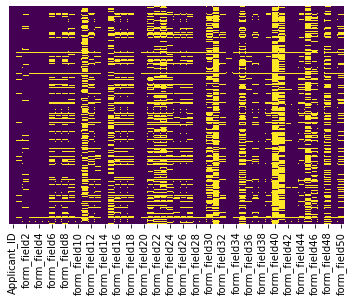

In [33]:
sns.heatmap(data_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
data_test.isnull().sum()

Applicant_ID        0
form_field1      1110
form_field2      1709
form_field3       146
form_field4       146
form_field5       146
form_field6      5604
form_field7      2231
form_field8      5604
form_field9      3400
form_field10      147
form_field11    13398
form_field12     4183
form_field13     2463
form_field14        0
form_field15     9592
form_field16     5474
form_field17     4695
form_field18     4369
form_field19        0
form_field20      147
form_field21     6707
form_field22     8724
form_field23    12125
form_field24     5605
form_field25     2256
form_field26     3172
form_field27     3910
form_field28      147
form_field29      147
form_field30    10908
form_field31    16810
form_field32     2256
form_field33      495
form_field34      147
form_field35     9866
form_field36      903
form_field37     2256
form_field38      147
form_field39     1829
form_field40    18828
form_field41    16349
form_field42      578
form_field43      250
form_field44     2362
form_field

In [35]:
label_encoder = LabelEncoder()
data_test['form_field47'] = label_encoder.fit_transform(data_test['form_field47'])

In [36]:
data_test.drop('Applicant_ID',axis=1,inplace=True)

In [38]:
for column in data_test.columns:
    data_test_mean = data_test[column].mean()
    data_test[column].fillna(data_train_mean, inplace = True)
    print(data_test.isnull().sum())

form_field1     0
form_field2     0
form_field3     0
form_field4     0
form_field5     0
form_field6     0
form_field7     0
form_field8     0
form_field9     0
form_field10    0
form_field11    0
form_field12    0
form_field13    0
form_field14    0
form_field15    0
form_field16    0
form_field17    0
form_field18    0
form_field19    0
form_field20    0
form_field21    0
form_field22    0
form_field23    0
form_field24    0
form_field25    0
form_field26    0
form_field27    0
form_field28    0
form_field29    0
form_field30    0
form_field31    0
form_field32    0
form_field33    0
form_field34    0
form_field35    0
form_field36    0
form_field37    0
form_field38    0
form_field39    0
form_field40    0
form_field41    0
form_field42    0
form_field43    0
form_field44    0
form_field45    0
form_field46    0
form_field47    0
form_field48    0
form_field49    0
form_field50    0
dtype: int64
form_field1     0
form_field2     0
form_field3     0
form_field4     0
form_field5    

dtype: int64
form_field1     0
form_field2     0
form_field3     0
form_field4     0
form_field5     0
form_field6     0
form_field7     0
form_field8     0
form_field9     0
form_field10    0
form_field11    0
form_field12    0
form_field13    0
form_field14    0
form_field15    0
form_field16    0
form_field17    0
form_field18    0
form_field19    0
form_field20    0
form_field21    0
form_field22    0
form_field23    0
form_field24    0
form_field25    0
form_field26    0
form_field27    0
form_field28    0
form_field29    0
form_field30    0
form_field31    0
form_field32    0
form_field33    0
form_field34    0
form_field35    0
form_field36    0
form_field37    0
form_field38    0
form_field39    0
form_field40    0
form_field41    0
form_field42    0
form_field43    0
form_field44    0
form_field45    0
form_field46    0
form_field47    0
form_field48    0
form_field49    0
form_field50    0
dtype: int64
form_field1     0
form_field2     0
form_field3     0
form_field4     0
fo

form_field1     0
form_field2     0
form_field3     0
form_field4     0
form_field5     0
form_field6     0
form_field7     0
form_field8     0
form_field9     0
form_field10    0
form_field11    0
form_field12    0
form_field13    0
form_field14    0
form_field15    0
form_field16    0
form_field17    0
form_field18    0
form_field19    0
form_field20    0
form_field21    0
form_field22    0
form_field23    0
form_field24    0
form_field25    0
form_field26    0
form_field27    0
form_field28    0
form_field29    0
form_field30    0
form_field31    0
form_field32    0
form_field33    0
form_field34    0
form_field35    0
form_field36    0
form_field37    0
form_field38    0
form_field39    0
form_field40    0
form_field41    0
form_field42    0
form_field43    0
form_field44    0
form_field45    0
form_field46    0
form_field47    0
form_field48    0
form_field49    0
form_field50    0
dtype: int64
form_field1     0
form_field2     0
form_field3     0
form_field4     0
form_field5    

In [39]:
data_test.head(3)

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,3236.000000,0.34875,10.2006,0.0000,0.0,418564.000000,4.185640e+05,418564.000000,5.407100e+05,0.0,...,600586.172883,0.825000,1.01,0.800000,600586.172883,0.000000,0,600586.172883,0.000000,0.011221
1,3284.000000,1.27360,2.9606,9.0198,0.0,0.000000,9.858816e+06,49014.000000,1.510098e+06,18308285.0,...,18.841500,0.507694,4.04,0.623248,1.000000,0.000000,1,600586.172883,0.504974,0.043525
2,600586.172883,0.27505,0.0600,0.0000,0.0,600586.172883,6.005862e+05,600586.172883,6.005862e+05,0.0,...,600586.172883,600586.172883,0.00,600586.172883,600586.172883,600586.172883,0,600586.172883,0.000000,600586.172883


In [40]:
label_encoder = LabelEncoder()
data_test['form_field47'] = label_encoder.fit_transform(data_test['form_field47'])

In [41]:
data_train.columns

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field14', 'form_field15', 'form_field16',
       'form_field17', 'form_field18', 'form_field19', 'form_field20',
       'form_field21', 'form_field22', 'form_field23', 'form_field24',
       'form_field25', 'form_field26', 'form_field27', 'form_field28',
       'form_field29', 'form_field30', 'form_field31', 'form_field32',
       'form_field33', 'form_field34', 'form_field35', 'form_field36',
       'form_field37', 'form_field38', 'form_field39', 'form_field40',
       'form_field41', 'form_field42', 'form_field43', 'form_field44',
       'form_field45', 'form_field46', 'form_field47', 'form_field48',
       'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [42]:
data_test.columns

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field14', 'form_field15', 'form_field16',
       'form_field17', 'form_field18', 'form_field19', 'form_field20',
       'form_field21', 'form_field22', 'form_field23', 'form_field24',
       'form_field25', 'form_field26', 'form_field27', 'form_field28',
       'form_field29', 'form_field30', 'form_field31', 'form_field32',
       'form_field33', 'form_field34', 'form_field35', 'form_field36',
       'form_field37', 'form_field38', 'form_field39', 'form_field40',
       'form_field41', 'form_field42', 'form_field43', 'form_field44',
       'form_field45', 'form_field46', 'form_field47', 'form_field48',
       'form_field49', 'form_field50'],
      dtype='object')

In [43]:
#Features 
feature_columns = ['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field14', 'form_field15', 'form_field16',
       'form_field17', 'form_field18', 'form_field19', 'form_field20',
       'form_field21', 'form_field22', 'form_field23', 'form_field24',
       'form_field25', 'form_field26', 'form_field27', 'form_field28',
       'form_field29', 'form_field30', 'form_field31', 'form_field32',
       'form_field33', 'form_field34', 'form_field35', 'form_field36',
       'form_field37', 'form_field38', 'form_field39', 'form_field40',
       'form_field41', 'form_field42', 'form_field43', 'form_field44',
       'form_field45', 'form_field46', 'form_field47', 'form_field48',
       'form_field49', 'form_field50']

In [53]:
test_pred = gb_model.predict(data_test[feature_columns])

In [54]:
#Our Test Prediction
set(test_pred)

{0, 1}

In [55]:
Submission = pd.read_csv('SampleSubmission.csv')

In [56]:
Submission.head()

,Applicant_ID,default_status
0,Apcnt_1000032,1
1,Apcnt_1000048,1
2,Apcnt_1000052,1
3,Apcnt_1000076,1
4,Apcnt_1000080,1


In [57]:
New_Test = pd.read_csv('Test.csv')

In [58]:
New_Test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [59]:
print(test_pred)

[1 1 0 ... 0 1 0]


In [60]:
my_submission = pd.DataFrame({"Applicant_ID": New_Test["Applicant_ID"], 'default_status': test_pred})
my_submission.head()

,Applicant_ID,default_status
0,Apcnt_1000032,1
1,Apcnt_1000048,1
2,Apcnt_1000052,0
3,Apcnt_1000076,1
4,Apcnt_1000080,1


In [61]:
#My recent submission
my_submission.to_csv("My_Submission.csv", index=False)

In [84]:
from catboost import CatBoostClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

In [64]:
catmodel = CatBoostClassifier(iterations=5000)
catmodel = catmodel.fit(X_train, y_train)
cat_pred = catmodel.predict(X_test)

Learning rate set to 0.01128
0:	learn: 0.6859357	total: 213ms	remaining: 17m 44s
1:	learn: 0.6789496	total: 255ms	remaining: 10m 38s
2:	learn: 0.6719864	total: 306ms	remaining: 8m 29s
3:	learn: 0.6652179	total: 418ms	remaining: 8m 41s
4:	learn: 0.6590829	total: 484ms	remaining: 8m 3s
5:	learn: 0.6533879	total: 524ms	remaining: 7m 16s
6:	learn: 0.6474247	total: 572ms	remaining: 6m 47s
7:	learn: 0.6415995	total: 620ms	remaining: 6m 26s
8:	learn: 0.6356766	total: 662ms	remaining: 6m 7s
9:	learn: 0.6303587	total: 707ms	remaining: 5m 52s
10:	learn: 0.6251263	total: 746ms	remaining: 5m 38s
11:	learn: 0.6199519	total: 783ms	remaining: 5m 25s
12:	learn: 0.6153425	total: 841ms	remaining: 5m 22s
13:	learn: 0.6105710	total: 883ms	remaining: 5m 14s
14:	learn: 0.6059580	total: 923ms	remaining: 5m 6s
15:	learn: 0.6011023	total: 962ms	remaining: 4m 59s
16:	learn: 0.5968743	total: 999ms	remaining: 4m 52s
17:	learn: 0.5921524	total: 1.04s	remaining: 4m 48s
18:	learn: 0.5879247	total: 1.09s	remaining: 4

161:	learn: 0.4270919	total: 7.67s	remaining: 3m 49s
162:	learn: 0.4268353	total: 7.71s	remaining: 3m 48s
163:	learn: 0.4266608	total: 7.74s	remaining: 3m 48s
164:	learn: 0.4264275	total: 7.78s	remaining: 3m 48s
165:	learn: 0.4262315	total: 7.82s	remaining: 3m 47s
166:	learn: 0.4260073	total: 7.86s	remaining: 3m 47s
167:	learn: 0.4258231	total: 7.9s	remaining: 3m 47s
168:	learn: 0.4256220	total: 7.94s	remaining: 3m 47s
169:	learn: 0.4254398	total: 7.98s	remaining: 3m 46s
170:	learn: 0.4252499	total: 8.02s	remaining: 3m 46s
171:	learn: 0.4250926	total: 8.06s	remaining: 3m 46s
172:	learn: 0.4249026	total: 8.1s	remaining: 3m 45s
173:	learn: 0.4247448	total: 8.14s	remaining: 3m 45s
174:	learn: 0.4245437	total: 8.18s	remaining: 3m 45s
175:	learn: 0.4243429	total: 8.22s	remaining: 3m 45s
176:	learn: 0.4241607	total: 8.25s	remaining: 3m 44s
177:	learn: 0.4239981	total: 8.29s	remaining: 3m 44s
178:	learn: 0.4238028	total: 8.33s	remaining: 3m 44s
179:	learn: 0.4236213	total: 8.37s	remaining: 3m

319:	learn: 0.4095116	total: 13.6s	remaining: 3m 18s
320:	learn: 0.4094487	total: 13.6s	remaining: 3m 18s
321:	learn: 0.4093893	total: 13.6s	remaining: 3m 17s
322:	learn: 0.4093232	total: 13.7s	remaining: 3m 17s
323:	learn: 0.4092603	total: 13.7s	remaining: 3m 17s
324:	learn: 0.4092091	total: 13.7s	remaining: 3m 17s
325:	learn: 0.4091466	total: 13.8s	remaining: 3m 17s
326:	learn: 0.4090926	total: 13.8s	remaining: 3m 17s
327:	learn: 0.4090366	total: 13.8s	remaining: 3m 16s
328:	learn: 0.4089871	total: 13.9s	remaining: 3m 16s
329:	learn: 0.4089374	total: 13.9s	remaining: 3m 16s
330:	learn: 0.4088843	total: 13.9s	remaining: 3m 16s
331:	learn: 0.4088241	total: 14s	remaining: 3m 16s
332:	learn: 0.4087662	total: 14s	remaining: 3m 16s
333:	learn: 0.4087032	total: 14s	remaining: 3m 16s
334:	learn: 0.4086585	total: 14.1s	remaining: 3m 15s
335:	learn: 0.4085937	total: 14.1s	remaining: 3m 15s
336:	learn: 0.4085364	total: 14.1s	remaining: 3m 15s
337:	learn: 0.4084878	total: 14.2s	remaining: 3m 15s

477:	learn: 0.4027985	total: 20.1s	remaining: 3m 10s
478:	learn: 0.4027693	total: 20.1s	remaining: 3m 10s
479:	learn: 0.4027323	total: 20.2s	remaining: 3m 9s
480:	learn: 0.4027036	total: 20.2s	remaining: 3m 9s
481:	learn: 0.4026650	total: 20.2s	remaining: 3m 9s
482:	learn: 0.4026359	total: 20.3s	remaining: 3m 9s
483:	learn: 0.4025962	total: 20.3s	remaining: 3m 9s
484:	learn: 0.4025573	total: 20.4s	remaining: 3m 9s
485:	learn: 0.4025277	total: 20.4s	remaining: 3m 9s
486:	learn: 0.4024892	total: 20.4s	remaining: 3m 9s
487:	learn: 0.4024450	total: 20.5s	remaining: 3m 9s
488:	learn: 0.4024134	total: 20.5s	remaining: 3m 9s
489:	learn: 0.4023846	total: 20.6s	remaining: 3m 9s
490:	learn: 0.4023519	total: 20.6s	remaining: 3m 9s
491:	learn: 0.4023120	total: 20.6s	remaining: 3m 9s
492:	learn: 0.4022778	total: 20.7s	remaining: 3m 9s
493:	learn: 0.4022418	total: 20.7s	remaining: 3m 9s
494:	learn: 0.4022074	total: 20.8s	remaining: 3m 8s
495:	learn: 0.4021783	total: 20.8s	remaining: 3m 8s
496:	learn

638:	learn: 0.3978920	total: 26.3s	remaining: 2m 59s
639:	learn: 0.3978700	total: 26.3s	remaining: 2m 59s
640:	learn: 0.3978378	total: 26.3s	remaining: 2m 59s
641:	learn: 0.3978173	total: 26.4s	remaining: 2m 59s
642:	learn: 0.3977885	total: 26.4s	remaining: 2m 59s
643:	learn: 0.3977724	total: 26.5s	remaining: 2m 58s
644:	learn: 0.3977426	total: 26.5s	remaining: 2m 59s
645:	learn: 0.3977230	total: 26.6s	remaining: 2m 59s
646:	learn: 0.3977004	total: 26.6s	remaining: 2m 59s
647:	learn: 0.3976714	total: 26.6s	remaining: 2m 58s
648:	learn: 0.3976401	total: 26.7s	remaining: 2m 58s
649:	learn: 0.3976162	total: 26.7s	remaining: 2m 58s
650:	learn: 0.3975913	total: 26.8s	remaining: 2m 58s
651:	learn: 0.3975636	total: 26.8s	remaining: 2m 58s
652:	learn: 0.3975439	total: 26.9s	remaining: 2m 58s
653:	learn: 0.3975105	total: 26.9s	remaining: 2m 58s
654:	learn: 0.3974895	total: 26.9s	remaining: 2m 58s
655:	learn: 0.3974647	total: 27s	remaining: 2m 58s
656:	learn: 0.3974205	total: 27s	remaining: 2m 5

797:	learn: 0.3938954	total: 32.6s	remaining: 2m 51s
798:	learn: 0.3938783	total: 32.7s	remaining: 2m 51s
799:	learn: 0.3938580	total: 32.7s	remaining: 2m 51s
800:	learn: 0.3938223	total: 32.8s	remaining: 2m 51s
801:	learn: 0.3938025	total: 32.8s	remaining: 2m 51s
802:	learn: 0.3937806	total: 32.8s	remaining: 2m 51s
803:	learn: 0.3937461	total: 32.9s	remaining: 2m 51s
804:	learn: 0.3937295	total: 32.9s	remaining: 2m 51s
805:	learn: 0.3937160	total: 33s	remaining: 2m 51s
806:	learn: 0.3936827	total: 33s	remaining: 2m 51s
807:	learn: 0.3936585	total: 33.1s	remaining: 2m 51s
808:	learn: 0.3936291	total: 33.1s	remaining: 2m 51s
809:	learn: 0.3936116	total: 33.1s	remaining: 2m 51s
810:	learn: 0.3935779	total: 33.2s	remaining: 2m 51s
811:	learn: 0.3935527	total: 33.2s	remaining: 2m 51s
812:	learn: 0.3935243	total: 33.3s	remaining: 2m 51s
813:	learn: 0.3935100	total: 33.3s	remaining: 2m 51s
814:	learn: 0.3934870	total: 33.4s	remaining: 2m 51s
815:	learn: 0.3934614	total: 33.4s	remaining: 2m 5

957:	learn: 0.3899269	total: 38.9s	remaining: 2m 44s
958:	learn: 0.3899064	total: 38.9s	remaining: 2m 44s
959:	learn: 0.3898911	total: 39s	remaining: 2m 44s
960:	learn: 0.3898737	total: 39s	remaining: 2m 43s
961:	learn: 0.3898451	total: 39.1s	remaining: 2m 43s
962:	learn: 0.3898176	total: 39.1s	remaining: 2m 43s
963:	learn: 0.3897829	total: 39.1s	remaining: 2m 43s
964:	learn: 0.3897557	total: 39.2s	remaining: 2m 43s
965:	learn: 0.3897286	total: 39.2s	remaining: 2m 43s
966:	learn: 0.3897103	total: 39.2s	remaining: 2m 43s
967:	learn: 0.3896985	total: 39.3s	remaining: 2m 43s
968:	learn: 0.3896759	total: 39.3s	remaining: 2m 43s
969:	learn: 0.3896374	total: 39.4s	remaining: 2m 43s
970:	learn: 0.3896181	total: 39.4s	remaining: 2m 43s
971:	learn: 0.3895900	total: 39.4s	remaining: 2m 43s
972:	learn: 0.3895657	total: 39.5s	remaining: 2m 43s
973:	learn: 0.3895474	total: 39.5s	remaining: 2m 43s
974:	learn: 0.3895269	total: 39.5s	remaining: 2m 43s
975:	learn: 0.3895009	total: 39.6s	remaining: 2m 4

1116:	learn: 0.3857103	total: 44.9s	remaining: 2m 36s
1117:	learn: 0.3856802	total: 45s	remaining: 2m 36s
1118:	learn: 0.3856528	total: 45s	remaining: 2m 36s
1119:	learn: 0.3856318	total: 45s	remaining: 2m 35s
1120:	learn: 0.3856036	total: 45.1s	remaining: 2m 35s
1121:	learn: 0.3855822	total: 45.1s	remaining: 2m 35s
1122:	learn: 0.3855588	total: 45.1s	remaining: 2m 35s
1123:	learn: 0.3855322	total: 45.2s	remaining: 2m 35s
1124:	learn: 0.3855077	total: 45.2s	remaining: 2m 35s
1125:	learn: 0.3854789	total: 45.2s	remaining: 2m 35s
1126:	learn: 0.3854628	total: 45.3s	remaining: 2m 35s
1127:	learn: 0.3854350	total: 45.3s	remaining: 2m 35s
1128:	learn: 0.3854114	total: 45.4s	remaining: 2m 35s
1129:	learn: 0.3853831	total: 45.4s	remaining: 2m 35s
1130:	learn: 0.3853550	total: 45.4s	remaining: 2m 35s
1131:	learn: 0.3853335	total: 45.5s	remaining: 2m 35s
1132:	learn: 0.3853067	total: 45.5s	remaining: 2m 35s
1133:	learn: 0.3852651	total: 45.5s	remaining: 2m 35s
1134:	learn: 0.3852435	total: 45.6

1271:	learn: 0.3813851	total: 50.8s	remaining: 2m 28s
1272:	learn: 0.3813613	total: 50.9s	remaining: 2m 28s
1273:	learn: 0.3813289	total: 50.9s	remaining: 2m 28s
1274:	learn: 0.3813003	total: 51s	remaining: 2m 28s
1275:	learn: 0.3812780	total: 51s	remaining: 2m 28s
1276:	learn: 0.3812506	total: 51s	remaining: 2m 28s
1277:	learn: 0.3812185	total: 51.1s	remaining: 2m 28s
1278:	learn: 0.3811896	total: 51.1s	remaining: 2m 28s
1279:	learn: 0.3811548	total: 51.1s	remaining: 2m 28s
1280:	learn: 0.3811292	total: 51.2s	remaining: 2m 28s
1281:	learn: 0.3811052	total: 51.2s	remaining: 2m 28s
1282:	learn: 0.3810800	total: 51.3s	remaining: 2m 28s
1283:	learn: 0.3810523	total: 51.3s	remaining: 2m 28s
1284:	learn: 0.3810313	total: 51.3s	remaining: 2m 28s
1285:	learn: 0.3810028	total: 51.4s	remaining: 2m 28s
1286:	learn: 0.3809760	total: 51.4s	remaining: 2m 28s
1287:	learn: 0.3809493	total: 51.5s	remaining: 2m 28s
1288:	learn: 0.3809212	total: 51.5s	remaining: 2m 28s
1289:	learn: 0.3808882	total: 51.5

1424:	learn: 0.3773073	total: 56.9s	remaining: 2m 22s
1425:	learn: 0.3772859	total: 56.9s	remaining: 2m 22s
1426:	learn: 0.3772597	total: 57s	remaining: 2m 22s
1427:	learn: 0.3772209	total: 57s	remaining: 2m 22s
1428:	learn: 0.3771953	total: 57s	remaining: 2m 22s
1429:	learn: 0.3771658	total: 57.1s	remaining: 2m 22s
1430:	learn: 0.3771280	total: 57.1s	remaining: 2m 22s
1431:	learn: 0.3771016	total: 57.2s	remaining: 2m 22s
1432:	learn: 0.3770774	total: 57.2s	remaining: 2m 22s
1433:	learn: 0.3770525	total: 57.3s	remaining: 2m 22s
1434:	learn: 0.3770236	total: 57.3s	remaining: 2m 22s
1435:	learn: 0.3770006	total: 57.3s	remaining: 2m 22s
1436:	learn: 0.3769663	total: 57.4s	remaining: 2m 22s
1437:	learn: 0.3769458	total: 57.4s	remaining: 2m 22s
1438:	learn: 0.3769315	total: 57.5s	remaining: 2m 22s
1439:	learn: 0.3768983	total: 57.5s	remaining: 2m 22s
1440:	learn: 0.3768680	total: 57.5s	remaining: 2m 22s
1441:	learn: 0.3768439	total: 57.6s	remaining: 2m 22s
1442:	learn: 0.3768216	total: 57.6

1580:	learn: 0.3733553	total: 1m 3s	remaining: 2m 16s
1581:	learn: 0.3733333	total: 1m 3s	remaining: 2m 16s
1582:	learn: 0.3732976	total: 1m 3s	remaining: 2m 16s
1583:	learn: 0.3732747	total: 1m 3s	remaining: 2m 16s
1584:	learn: 0.3732470	total: 1m 3s	remaining: 2m 16s
1585:	learn: 0.3732270	total: 1m 3s	remaining: 2m 16s
1586:	learn: 0.3732047	total: 1m 3s	remaining: 2m 16s
1587:	learn: 0.3731793	total: 1m 3s	remaining: 2m 16s
1588:	learn: 0.3731510	total: 1m 3s	remaining: 2m 16s
1589:	learn: 0.3731287	total: 1m 3s	remaining: 2m 16s
1590:	learn: 0.3731152	total: 1m 3s	remaining: 2m 16s
1591:	learn: 0.3730906	total: 1m 3s	remaining: 2m 16s
1592:	learn: 0.3730689	total: 1m 3s	remaining: 2m 16s
1593:	learn: 0.3730485	total: 1m 3s	remaining: 2m 16s
1594:	learn: 0.3730306	total: 1m 3s	remaining: 2m 15s
1595:	learn: 0.3730058	total: 1m 3s	remaining: 2m 15s
1596:	learn: 0.3729815	total: 1m 3s	remaining: 2m 15s
1597:	learn: 0.3729586	total: 1m 3s	remaining: 2m 15s
1598:	learn: 0.3729329	total

1733:	learn: 0.3694934	total: 1m 9s	remaining: 2m 10s
1734:	learn: 0.3694748	total: 1m 9s	remaining: 2m 10s
1735:	learn: 0.3694526	total: 1m 9s	remaining: 2m 10s
1736:	learn: 0.3694384	total: 1m 9s	remaining: 2m 10s
1737:	learn: 0.3694154	total: 1m 9s	remaining: 2m 10s
1738:	learn: 0.3693835	total: 1m 9s	remaining: 2m 10s
1739:	learn: 0.3693497	total: 1m 9s	remaining: 2m 10s
1740:	learn: 0.3693213	total: 1m 9s	remaining: 2m 10s
1741:	learn: 0.3693021	total: 1m 9s	remaining: 2m 10s
1742:	learn: 0.3692871	total: 1m 9s	remaining: 2m 10s
1743:	learn: 0.3692611	total: 1m 9s	remaining: 2m 10s
1744:	learn: 0.3692306	total: 1m 9s	remaining: 2m 9s
1745:	learn: 0.3692041	total: 1m 9s	remaining: 2m 9s
1746:	learn: 0.3691877	total: 1m 9s	remaining: 2m 9s
1747:	learn: 0.3691630	total: 1m 9s	remaining: 2m 9s
1748:	learn: 0.3691396	total: 1m 9s	remaining: 2m 9s
1749:	learn: 0.3691083	total: 1m 9s	remaining: 2m 9s
1750:	learn: 0.3690812	total: 1m 9s	remaining: 2m 9s
1751:	learn: 0.3690580	total: 1m 9s

1887:	learn: 0.3657850	total: 1m 15s	remaining: 2m 3s
1888:	learn: 0.3657557	total: 1m 15s	remaining: 2m 3s
1889:	learn: 0.3657237	total: 1m 15s	remaining: 2m 3s
1890:	learn: 0.3657008	total: 1m 15s	remaining: 2m 3s
1891:	learn: 0.3656729	total: 1m 15s	remaining: 2m 3s
1892:	learn: 0.3656507	total: 1m 15s	remaining: 2m 3s
1893:	learn: 0.3656207	total: 1m 15s	remaining: 2m 3s
1894:	learn: 0.3655919	total: 1m 15s	remaining: 2m 3s
1895:	learn: 0.3655770	total: 1m 15s	remaining: 2m 3s
1896:	learn: 0.3655490	total: 1m 15s	remaining: 2m 3s
1897:	learn: 0.3655285	total: 1m 15s	remaining: 2m 3s
1898:	learn: 0.3654995	total: 1m 15s	remaining: 2m 3s
1899:	learn: 0.3654844	total: 1m 15s	remaining: 2m 3s
1900:	learn: 0.3654676	total: 1m 15s	remaining: 2m 3s
1901:	learn: 0.3654523	total: 1m 15s	remaining: 2m 3s
1902:	learn: 0.3654360	total: 1m 15s	remaining: 2m 2s
1903:	learn: 0.3654183	total: 1m 15s	remaining: 2m 2s
1904:	learn: 0.3653937	total: 1m 15s	remaining: 2m 2s
1905:	learn: 0.3653597	total

2043:	learn: 0.3622799	total: 1m 20s	remaining: 1m 57s
2044:	learn: 0.3622541	total: 1m 20s	remaining: 1m 56s
2045:	learn: 0.3622289	total: 1m 21s	remaining: 1m 56s
2046:	learn: 0.3622108	total: 1m 21s	remaining: 1m 56s
2047:	learn: 0.3621906	total: 1m 21s	remaining: 1m 56s
2048:	learn: 0.3621599	total: 1m 21s	remaining: 1m 56s
2049:	learn: 0.3621386	total: 1m 21s	remaining: 1m 56s
2050:	learn: 0.3621187	total: 1m 21s	remaining: 1m 56s
2051:	learn: 0.3620968	total: 1m 21s	remaining: 1m 56s
2052:	learn: 0.3620692	total: 1m 21s	remaining: 1m 56s
2053:	learn: 0.3620447	total: 1m 21s	remaining: 1m 56s
2054:	learn: 0.3620228	total: 1m 21s	remaining: 1m 56s
2055:	learn: 0.3619992	total: 1m 21s	remaining: 1m 56s
2056:	learn: 0.3619813	total: 1m 21s	remaining: 1m 56s
2057:	learn: 0.3619608	total: 1m 21s	remaining: 1m 56s
2058:	learn: 0.3619343	total: 1m 21s	remaining: 1m 56s
2059:	learn: 0.3619078	total: 1m 21s	remaining: 1m 56s
2060:	learn: 0.3618835	total: 1m 21s	remaining: 1m 56s
2061:	lear

2195:	learn: 0.3588469	total: 1m 26s	remaining: 1m 50s
2196:	learn: 0.3588248	total: 1m 26s	remaining: 1m 50s
2197:	learn: 0.3588032	total: 1m 26s	remaining: 1m 50s
2198:	learn: 0.3587784	total: 1m 26s	remaining: 1m 50s
2199:	learn: 0.3587544	total: 1m 27s	remaining: 1m 50s
2200:	learn: 0.3587336	total: 1m 27s	remaining: 1m 50s
2201:	learn: 0.3587083	total: 1m 27s	remaining: 1m 50s
2202:	learn: 0.3586902	total: 1m 27s	remaining: 1m 50s
2203:	learn: 0.3586611	total: 1m 27s	remaining: 1m 50s
2204:	learn: 0.3586430	total: 1m 27s	remaining: 1m 50s
2205:	learn: 0.3586204	total: 1m 27s	remaining: 1m 50s
2206:	learn: 0.3586056	total: 1m 27s	remaining: 1m 50s
2207:	learn: 0.3585870	total: 1m 27s	remaining: 1m 50s
2208:	learn: 0.3585667	total: 1m 27s	remaining: 1m 50s
2209:	learn: 0.3585436	total: 1m 27s	remaining: 1m 50s
2210:	learn: 0.3585247	total: 1m 27s	remaining: 1m 50s
2211:	learn: 0.3585092	total: 1m 27s	remaining: 1m 50s
2212:	learn: 0.3584808	total: 1m 27s	remaining: 1m 50s
2213:	lear

2346:	learn: 0.3555265	total: 1m 33s	remaining: 1m 45s
2347:	learn: 0.3554996	total: 1m 33s	remaining: 1m 45s
2348:	learn: 0.3554894	total: 1m 33s	remaining: 1m 45s
2349:	learn: 0.3554619	total: 1m 33s	remaining: 1m 45s
2350:	learn: 0.3554368	total: 1m 33s	remaining: 1m 45s
2351:	learn: 0.3554190	total: 1m 33s	remaining: 1m 45s
2352:	learn: 0.3553911	total: 1m 33s	remaining: 1m 45s
2353:	learn: 0.3553666	total: 1m 33s	remaining: 1m 45s
2354:	learn: 0.3553442	total: 1m 33s	remaining: 1m 45s
2355:	learn: 0.3553186	total: 1m 33s	remaining: 1m 45s
2356:	learn: 0.3552917	total: 1m 33s	remaining: 1m 45s
2357:	learn: 0.3552764	total: 1m 33s	remaining: 1m 45s
2358:	learn: 0.3552528	total: 1m 33s	remaining: 1m 45s
2359:	learn: 0.3552345	total: 1m 33s	remaining: 1m 45s
2360:	learn: 0.3552043	total: 1m 34s	remaining: 1m 45s
2361:	learn: 0.3551787	total: 1m 34s	remaining: 1m 45s
2362:	learn: 0.3551593	total: 1m 34s	remaining: 1m 45s
2363:	learn: 0.3551370	total: 1m 34s	remaining: 1m 44s
2364:	lear

2498:	learn: 0.3521460	total: 1m 39s	remaining: 1m 39s
2499:	learn: 0.3521296	total: 1m 39s	remaining: 1m 39s
2500:	learn: 0.3521049	total: 1m 39s	remaining: 1m 39s
2501:	learn: 0.3520759	total: 1m 39s	remaining: 1m 39s
2502:	learn: 0.3520632	total: 1m 39s	remaining: 1m 39s
2503:	learn: 0.3520388	total: 1m 39s	remaining: 1m 39s
2504:	learn: 0.3520122	total: 1m 39s	remaining: 1m 39s
2505:	learn: 0.3519915	total: 1m 39s	remaining: 1m 39s
2506:	learn: 0.3519626	total: 1m 39s	remaining: 1m 39s
2507:	learn: 0.3519442	total: 1m 40s	remaining: 1m 39s
2508:	learn: 0.3519257	total: 1m 40s	remaining: 1m 39s
2509:	learn: 0.3519010	total: 1m 40s	remaining: 1m 39s
2510:	learn: 0.3518862	total: 1m 40s	remaining: 1m 39s
2511:	learn: 0.3518635	total: 1m 40s	remaining: 1m 39s
2512:	learn: 0.3518396	total: 1m 40s	remaining: 1m 39s
2513:	learn: 0.3518143	total: 1m 40s	remaining: 1m 39s
2514:	learn: 0.3517918	total: 1m 40s	remaining: 1m 39s
2515:	learn: 0.3517709	total: 1m 40s	remaining: 1m 39s
2516:	lear

2649:	learn: 0.3490208	total: 1m 45s	remaining: 1m 33s
2650:	learn: 0.3490001	total: 1m 45s	remaining: 1m 33s
2651:	learn: 0.3489776	total: 1m 45s	remaining: 1m 33s
2652:	learn: 0.3489520	total: 1m 45s	remaining: 1m 33s
2653:	learn: 0.3489331	total: 1m 45s	remaining: 1m 33s
2654:	learn: 0.3489112	total: 1m 45s	remaining: 1m 33s
2655:	learn: 0.3488914	total: 1m 45s	remaining: 1m 33s
2656:	learn: 0.3488703	total: 1m 45s	remaining: 1m 33s
2657:	learn: 0.3488521	total: 1m 45s	remaining: 1m 33s
2658:	learn: 0.3488271	total: 1m 45s	remaining: 1m 33s
2659:	learn: 0.3488057	total: 1m 45s	remaining: 1m 33s
2660:	learn: 0.3487826	total: 1m 45s	remaining: 1m 33s
2661:	learn: 0.3487582	total: 1m 45s	remaining: 1m 32s
2662:	learn: 0.3487353	total: 1m 45s	remaining: 1m 32s
2663:	learn: 0.3487179	total: 1m 45s	remaining: 1m 32s
2664:	learn: 0.3486961	total: 1m 45s	remaining: 1m 32s
2665:	learn: 0.3486773	total: 1m 46s	remaining: 1m 32s
2666:	learn: 0.3486580	total: 1m 46s	remaining: 1m 32s
2667:	lear

2800:	learn: 0.3459174	total: 1m 51s	remaining: 1m 27s
2801:	learn: 0.3459006	total: 1m 51s	remaining: 1m 27s
2802:	learn: 0.3458785	total: 1m 51s	remaining: 1m 27s
2803:	learn: 0.3458630	total: 1m 51s	remaining: 1m 27s
2804:	learn: 0.3458451	total: 1m 51s	remaining: 1m 27s
2805:	learn: 0.3458186	total: 1m 51s	remaining: 1m 27s
2806:	learn: 0.3457999	total: 1m 51s	remaining: 1m 27s
2807:	learn: 0.3457824	total: 1m 51s	remaining: 1m 27s
2808:	learn: 0.3457602	total: 1m 51s	remaining: 1m 27s
2809:	learn: 0.3457368	total: 1m 51s	remaining: 1m 27s
2810:	learn: 0.3457176	total: 1m 52s	remaining: 1m 27s
2811:	learn: 0.3456942	total: 1m 52s	remaining: 1m 27s
2812:	learn: 0.3456748	total: 1m 52s	remaining: 1m 27s
2813:	learn: 0.3456545	total: 1m 52s	remaining: 1m 27s
2814:	learn: 0.3456330	total: 1m 52s	remaining: 1m 27s
2815:	learn: 0.3456046	total: 1m 52s	remaining: 1m 27s
2816:	learn: 0.3455909	total: 1m 52s	remaining: 1m 27s
2817:	learn: 0.3455707	total: 1m 52s	remaining: 1m 26s
2818:	lear

2952:	learn: 0.3427857	total: 1m 57s	remaining: 1m 21s
2953:	learn: 0.3427624	total: 1m 57s	remaining: 1m 21s
2954:	learn: 0.3427311	total: 1m 57s	remaining: 1m 21s
2955:	learn: 0.3427097	total: 1m 57s	remaining: 1m 21s
2956:	learn: 0.3426924	total: 1m 57s	remaining: 1m 21s
2957:	learn: 0.3426737	total: 1m 57s	remaining: 1m 21s
2958:	learn: 0.3426552	total: 1m 57s	remaining: 1m 21s
2959:	learn: 0.3426315	total: 1m 57s	remaining: 1m 21s
2960:	learn: 0.3426125	total: 1m 57s	remaining: 1m 21s
2961:	learn: 0.3426028	total: 1m 57s	remaining: 1m 21s
2962:	learn: 0.3425760	total: 1m 58s	remaining: 1m 21s
2963:	learn: 0.3425542	total: 1m 58s	remaining: 1m 21s
2964:	learn: 0.3425254	total: 1m 58s	remaining: 1m 21s
2965:	learn: 0.3425056	total: 1m 58s	remaining: 1m 21s
2966:	learn: 0.3424890	total: 1m 58s	remaining: 1m 20s
2967:	learn: 0.3424668	total: 1m 58s	remaining: 1m 20s
2968:	learn: 0.3424481	total: 1m 58s	remaining: 1m 20s
2969:	learn: 0.3424161	total: 1m 58s	remaining: 1m 20s
2970:	lear

3107:	learn: 0.3395847	total: 2m 3s	remaining: 1m 15s
3108:	learn: 0.3395635	total: 2m 3s	remaining: 1m 15s
3109:	learn: 0.3395491	total: 2m 3s	remaining: 1m 15s
3110:	learn: 0.3395327	total: 2m 3s	remaining: 1m 15s
3111:	learn: 0.3395092	total: 2m 3s	remaining: 1m 15s
3112:	learn: 0.3394907	total: 2m 3s	remaining: 1m 15s
3113:	learn: 0.3394708	total: 2m 3s	remaining: 1m 15s
3114:	learn: 0.3394494	total: 2m 3s	remaining: 1m 15s
3115:	learn: 0.3394278	total: 2m 3s	remaining: 1m 14s
3116:	learn: 0.3394093	total: 2m 4s	remaining: 1m 14s
3117:	learn: 0.3393887	total: 2m 4s	remaining: 1m 14s
3118:	learn: 0.3393663	total: 2m 4s	remaining: 1m 14s
3119:	learn: 0.3393493	total: 2m 4s	remaining: 1m 14s
3120:	learn: 0.3393296	total: 2m 4s	remaining: 1m 14s
3121:	learn: 0.3393089	total: 2m 4s	remaining: 1m 14s
3122:	learn: 0.3392927	total: 2m 4s	remaining: 1m 14s
3123:	learn: 0.3392748	total: 2m 4s	remaining: 1m 14s
3124:	learn: 0.3392482	total: 2m 4s	remaining: 1m 14s
3125:	learn: 0.3392321	total

3262:	learn: 0.3366366	total: 2m 9s	remaining: 1m 9s
3263:	learn: 0.3366175	total: 2m 9s	remaining: 1m 9s
3264:	learn: 0.3365915	total: 2m 9s	remaining: 1m 9s
3265:	learn: 0.3365726	total: 2m 9s	remaining: 1m 8s
3266:	learn: 0.3365520	total: 2m 9s	remaining: 1m 8s
3267:	learn: 0.3365337	total: 2m 9s	remaining: 1m 8s
3268:	learn: 0.3365169	total: 2m 10s	remaining: 1m 8s
3269:	learn: 0.3365007	total: 2m 10s	remaining: 1m 8s
3270:	learn: 0.3364798	total: 2m 10s	remaining: 1m 8s
3271:	learn: 0.3364650	total: 2m 10s	remaining: 1m 8s
3272:	learn: 0.3364469	total: 2m 10s	remaining: 1m 8s
3273:	learn: 0.3364294	total: 2m 10s	remaining: 1m 8s
3274:	learn: 0.3364123	total: 2m 10s	remaining: 1m 8s
3275:	learn: 0.3363891	total: 2m 10s	remaining: 1m 8s
3276:	learn: 0.3363649	total: 2m 10s	remaining: 1m 8s
3277:	learn: 0.3363500	total: 2m 10s	remaining: 1m 8s
3278:	learn: 0.3363229	total: 2m 10s	remaining: 1m 8s
3279:	learn: 0.3362969	total: 2m 10s	remaining: 1m 8s
3280:	learn: 0.3362781	total: 2m 1

3414:	learn: 0.3336088	total: 2m 15s	remaining: 1m 2s
3415:	learn: 0.3335824	total: 2m 15s	remaining: 1m 2s
3416:	learn: 0.3335594	total: 2m 15s	remaining: 1m 2s
3417:	learn: 0.3335393	total: 2m 15s	remaining: 1m 2s
3418:	learn: 0.3335205	total: 2m 15s	remaining: 1m 2s
3419:	learn: 0.3334992	total: 2m 15s	remaining: 1m 2s
3420:	learn: 0.3334810	total: 2m 15s	remaining: 1m 2s
3421:	learn: 0.3334638	total: 2m 15s	remaining: 1m 2s
3422:	learn: 0.3334451	total: 2m 15s	remaining: 1m 2s
3423:	learn: 0.3334263	total: 2m 15s	remaining: 1m 2s
3424:	learn: 0.3334038	total: 2m 15s	remaining: 1m 2s
3425:	learn: 0.3333863	total: 2m 15s	remaining: 1m 2s
3426:	learn: 0.3333636	total: 2m 15s	remaining: 1m 2s
3427:	learn: 0.3333429	total: 2m 15s	remaining: 1m 2s
3428:	learn: 0.3333228	total: 2m 16s	remaining: 1m 2s
3429:	learn: 0.3333018	total: 2m 16s	remaining: 1m 2s
3430:	learn: 0.3332819	total: 2m 16s	remaining: 1m 2s
3431:	learn: 0.3332662	total: 2m 16s	remaining: 1m 2s
3432:	learn: 0.3332512	total

3571:	learn: 0.3306548	total: 2m 21s	remaining: 56.5s
3572:	learn: 0.3306355	total: 2m 21s	remaining: 56.4s
3573:	learn: 0.3306147	total: 2m 21s	remaining: 56.4s
3574:	learn: 0.3305973	total: 2m 21s	remaining: 56.3s
3575:	learn: 0.3305846	total: 2m 21s	remaining: 56.3s
3576:	learn: 0.3305653	total: 2m 21s	remaining: 56.3s
3577:	learn: 0.3305493	total: 2m 21s	remaining: 56.2s
3578:	learn: 0.3305364	total: 2m 21s	remaining: 56.2s
3579:	learn: 0.3305180	total: 2m 21s	remaining: 56.1s
3580:	learn: 0.3304925	total: 2m 21s	remaining: 56.1s
3581:	learn: 0.3304729	total: 2m 21s	remaining: 56.1s
3582:	learn: 0.3304520	total: 2m 21s	remaining: 56s
3583:	learn: 0.3304330	total: 2m 21s	remaining: 56s
3584:	learn: 0.3304010	total: 2m 21s	remaining: 55.9s
3585:	learn: 0.3303841	total: 2m 21s	remaining: 55.9s
3586:	learn: 0.3303559	total: 2m 21s	remaining: 55.9s
3587:	learn: 0.3303302	total: 2m 21s	remaining: 55.8s
3588:	learn: 0.3303080	total: 2m 21s	remaining: 55.8s
3589:	learn: 0.3302857	total: 2m

3725:	learn: 0.3277931	total: 2m 26s	remaining: 50.2s
3726:	learn: 0.3277710	total: 2m 26s	remaining: 50.2s
3727:	learn: 0.3277541	total: 2m 27s	remaining: 50.2s
3728:	learn: 0.3277372	total: 2m 27s	remaining: 50.1s
3729:	learn: 0.3277179	total: 2m 27s	remaining: 50.1s
3730:	learn: 0.3277003	total: 2m 27s	remaining: 50s
3731:	learn: 0.3276736	total: 2m 27s	remaining: 50s
3732:	learn: 0.3276568	total: 2m 27s	remaining: 50s
3733:	learn: 0.3276286	total: 2m 27s	remaining: 49.9s
3734:	learn: 0.3276094	total: 2m 27s	remaining: 49.9s
3735:	learn: 0.3275892	total: 2m 27s	remaining: 49.9s
3736:	learn: 0.3275722	total: 2m 27s	remaining: 49.8s
3737:	learn: 0.3275532	total: 2m 27s	remaining: 49.8s
3738:	learn: 0.3275371	total: 2m 27s	remaining: 49.7s
3739:	learn: 0.3275180	total: 2m 27s	remaining: 49.7s
3740:	learn: 0.3275012	total: 2m 27s	remaining: 49.7s
3741:	learn: 0.3274803	total: 2m 27s	remaining: 49.6s
3742:	learn: 0.3274572	total: 2m 27s	remaining: 49.6s
3743:	learn: 0.3274387	total: 2m 2

3880:	learn: 0.3248133	total: 2m 33s	remaining: 44.2s
3881:	learn: 0.3247982	total: 2m 33s	remaining: 44.1s
3882:	learn: 0.3247801	total: 2m 33s	remaining: 44.1s
3883:	learn: 0.3247553	total: 2m 33s	remaining: 44s
3884:	learn: 0.3247388	total: 2m 33s	remaining: 44s
3885:	learn: 0.3247181	total: 2m 33s	remaining: 44s
3886:	learn: 0.3246944	total: 2m 33s	remaining: 43.9s
3887:	learn: 0.3246806	total: 2m 33s	remaining: 43.9s
3888:	learn: 0.3246683	total: 2m 33s	remaining: 43.8s
3889:	learn: 0.3246484	total: 2m 33s	remaining: 43.8s
3890:	learn: 0.3246289	total: 2m 33s	remaining: 43.8s
3891:	learn: 0.3246039	total: 2m 33s	remaining: 43.7s
3892:	learn: 0.3245801	total: 2m 33s	remaining: 43.7s
3893:	learn: 0.3245562	total: 2m 33s	remaining: 43.6s
3894:	learn: 0.3245324	total: 2m 33s	remaining: 43.6s
3895:	learn: 0.3245157	total: 2m 33s	remaining: 43.6s
3896:	learn: 0.3244962	total: 2m 33s	remaining: 43.5s
3897:	learn: 0.3244758	total: 2m 33s	remaining: 43.5s
3898:	learn: 0.3244541	total: 2m 3

4037:	learn: 0.3219152	total: 2m 39s	remaining: 38s
4038:	learn: 0.3218989	total: 2m 39s	remaining: 37.9s
4039:	learn: 0.3218774	total: 2m 39s	remaining: 37.9s
4040:	learn: 0.3218633	total: 2m 39s	remaining: 37.8s
4041:	learn: 0.3218385	total: 2m 39s	remaining: 37.8s
4042:	learn: 0.3218209	total: 2m 39s	remaining: 37.8s
4043:	learn: 0.3218091	total: 2m 39s	remaining: 37.7s
4044:	learn: 0.3217827	total: 2m 39s	remaining: 37.7s
4045:	learn: 0.3217631	total: 2m 39s	remaining: 37.6s
4046:	learn: 0.3217429	total: 2m 39s	remaining: 37.6s
4047:	learn: 0.3217259	total: 2m 39s	remaining: 37.6s
4048:	learn: 0.3217103	total: 2m 39s	remaining: 37.5s
4049:	learn: 0.3216932	total: 2m 39s	remaining: 37.5s
4050:	learn: 0.3216734	total: 2m 39s	remaining: 37.4s
4051:	learn: 0.3216521	total: 2m 39s	remaining: 37.4s
4052:	learn: 0.3216277	total: 2m 39s	remaining: 37.4s
4053:	learn: 0.3216075	total: 2m 39s	remaining: 37.3s
4054:	learn: 0.3215920	total: 2m 40s	remaining: 37.3s
4055:	learn: 0.3215865	total: 

4193:	learn: 0.3191260	total: 2m 45s	remaining: 31.9s
4194:	learn: 0.3191112	total: 2m 45s	remaining: 31.8s
4195:	learn: 0.3190920	total: 2m 45s	remaining: 31.8s
4196:	learn: 0.3190782	total: 2m 45s	remaining: 31.7s
4197:	learn: 0.3190571	total: 2m 45s	remaining: 31.7s
4198:	learn: 0.3190408	total: 2m 45s	remaining: 31.7s
4199:	learn: 0.3190291	total: 2m 46s	remaining: 31.6s
4200:	learn: 0.3190179	total: 2m 46s	remaining: 31.6s
4201:	learn: 0.3190023	total: 2m 46s	remaining: 31.5s
4202:	learn: 0.3189822	total: 2m 46s	remaining: 31.5s
4203:	learn: 0.3189659	total: 2m 46s	remaining: 31.5s
4204:	learn: 0.3189526	total: 2m 46s	remaining: 31.4s
4205:	learn: 0.3189358	total: 2m 46s	remaining: 31.4s
4206:	learn: 0.3189163	total: 2m 46s	remaining: 31.3s
4207:	learn: 0.3188998	total: 2m 46s	remaining: 31.3s
4208:	learn: 0.3188902	total: 2m 46s	remaining: 31.3s
4209:	learn: 0.3188717	total: 2m 46s	remaining: 31.2s
4210:	learn: 0.3188596	total: 2m 46s	remaining: 31.2s
4211:	learn: 0.3188418	total

4350:	learn: 0.3163990	total: 2m 51s	remaining: 25.6s
4351:	learn: 0.3163839	total: 2m 51s	remaining: 25.6s
4352:	learn: 0.3163721	total: 2m 52s	remaining: 25.6s
4353:	learn: 0.3163557	total: 2m 52s	remaining: 25.5s
4354:	learn: 0.3163383	total: 2m 52s	remaining: 25.5s
4355:	learn: 0.3163253	total: 2m 52s	remaining: 25.5s
4356:	learn: 0.3163122	total: 2m 52s	remaining: 25.4s
4357:	learn: 0.3162895	total: 2m 52s	remaining: 25.4s
4358:	learn: 0.3162759	total: 2m 52s	remaining: 25.3s
4359:	learn: 0.3162564	total: 2m 52s	remaining: 25.3s
4360:	learn: 0.3162428	total: 2m 52s	remaining: 25.3s
4361:	learn: 0.3162212	total: 2m 52s	remaining: 25.2s
4362:	learn: 0.3162046	total: 2m 52s	remaining: 25.2s
4363:	learn: 0.3161856	total: 2m 52s	remaining: 25.1s
4364:	learn: 0.3161797	total: 2m 52s	remaining: 25.1s
4365:	learn: 0.3161606	total: 2m 52s	remaining: 25.1s
4366:	learn: 0.3161359	total: 2m 52s	remaining: 25s
4367:	learn: 0.3161214	total: 2m 52s	remaining: 25s
4368:	learn: 0.3161022	total: 2m

4506:	learn: 0.3136515	total: 2m 58s	remaining: 19.5s
4507:	learn: 0.3136455	total: 2m 58s	remaining: 19.5s
4508:	learn: 0.3136301	total: 2m 58s	remaining: 19.4s
4509:	learn: 0.3136087	total: 2m 58s	remaining: 19.4s
4510:	learn: 0.3135922	total: 2m 58s	remaining: 19.4s
4511:	learn: 0.3135698	total: 2m 58s	remaining: 19.3s
4512:	learn: 0.3135526	total: 2m 58s	remaining: 19.3s
4513:	learn: 0.3135280	total: 2m 58s	remaining: 19.2s
4514:	learn: 0.3135042	total: 2m 58s	remaining: 19.2s
4515:	learn: 0.3134790	total: 2m 58s	remaining: 19.2s
4516:	learn: 0.3134632	total: 2m 58s	remaining: 19.1s
4517:	learn: 0.3134499	total: 2m 58s	remaining: 19.1s
4518:	learn: 0.3134335	total: 2m 58s	remaining: 19s
4519:	learn: 0.3134142	total: 2m 58s	remaining: 19s
4520:	learn: 0.3134053	total: 2m 59s	remaining: 19s
4521:	learn: 0.3133935	total: 2m 59s	remaining: 18.9s
4522:	learn: 0.3133771	total: 2m 59s	remaining: 18.9s
4523:	learn: 0.3133594	total: 2m 59s	remaining: 18.8s
4524:	learn: 0.3133439	total: 2m 5

4664:	learn: 0.3109535	total: 3m 4s	remaining: 13.3s
4665:	learn: 0.3109351	total: 3m 5s	remaining: 13.2s
4666:	learn: 0.3109131	total: 3m 5s	remaining: 13.2s
4667:	learn: 0.3108925	total: 3m 5s	remaining: 13.2s
4668:	learn: 0.3108727	total: 3m 5s	remaining: 13.1s
4669:	learn: 0.3108577	total: 3m 5s	remaining: 13.1s
4670:	learn: 0.3108435	total: 3m 5s	remaining: 13s
4671:	learn: 0.3108250	total: 3m 5s	remaining: 13s
4672:	learn: 0.3108047	total: 3m 5s	remaining: 13s
4673:	learn: 0.3107912	total: 3m 5s	remaining: 12.9s
4674:	learn: 0.3107666	total: 3m 5s	remaining: 12.9s
4675:	learn: 0.3107543	total: 3m 5s	remaining: 12.8s
4676:	learn: 0.3107410	total: 3m 5s	remaining: 12.8s
4677:	learn: 0.3107175	total: 3m 5s	remaining: 12.8s
4678:	learn: 0.3107039	total: 3m 5s	remaining: 12.7s
4679:	learn: 0.3106871	total: 3m 5s	remaining: 12.7s
4680:	learn: 0.3106617	total: 3m 5s	remaining: 12.6s
4681:	learn: 0.3106369	total: 3m 5s	remaining: 12.6s
4682:	learn: 0.3106177	total: 3m 5s	remaining: 12.6s

4823:	learn: 0.3082502	total: 3m 11s	remaining: 6.97s
4824:	learn: 0.3082299	total: 3m 11s	remaining: 6.93s
4825:	learn: 0.3082191	total: 3m 11s	remaining: 6.89s
4826:	learn: 0.3082034	total: 3m 11s	remaining: 6.86s
4827:	learn: 0.3081794	total: 3m 11s	remaining: 6.82s
4828:	learn: 0.3081592	total: 3m 11s	remaining: 6.78s
4829:	learn: 0.3081422	total: 3m 11s	remaining: 6.74s
4830:	learn: 0.3081187	total: 3m 11s	remaining: 6.7s
4831:	learn: 0.3081050	total: 3m 11s	remaining: 6.66s
4832:	learn: 0.3080853	total: 3m 11s	remaining: 6.62s
4833:	learn: 0.3080722	total: 3m 11s	remaining: 6.58s
4834:	learn: 0.3080584	total: 3m 11s	remaining: 6.54s
4835:	learn: 0.3080409	total: 3m 11s	remaining: 6.5s
4836:	learn: 0.3080237	total: 3m 11s	remaining: 6.46s
4837:	learn: 0.3080131	total: 3m 11s	remaining: 6.42s
4838:	learn: 0.3079956	total: 3m 11s	remaining: 6.38s
4839:	learn: 0.3079817	total: 3m 11s	remaining: 6.34s
4840:	learn: 0.3079681	total: 3m 11s	remaining: 6.3s
4841:	learn: 0.3079514	total: 3

4979:	learn: 0.3056658	total: 3m 17s	remaining: 793ms
4980:	learn: 0.3056514	total: 3m 17s	remaining: 753ms
4981:	learn: 0.3056353	total: 3m 17s	remaining: 714ms
4982:	learn: 0.3056217	total: 3m 17s	remaining: 674ms
4983:	learn: 0.3056053	total: 3m 17s	remaining: 634ms
4984:	learn: 0.3055948	total: 3m 17s	remaining: 595ms
4985:	learn: 0.3055778	total: 3m 17s	remaining: 555ms
4986:	learn: 0.3055596	total: 3m 17s	remaining: 515ms
4987:	learn: 0.3055407	total: 3m 17s	remaining: 476ms
4988:	learn: 0.3055317	total: 3m 17s	remaining: 436ms
4989:	learn: 0.3055193	total: 3m 17s	remaining: 396ms
4990:	learn: 0.3055052	total: 3m 17s	remaining: 357ms
4991:	learn: 0.3054867	total: 3m 17s	remaining: 317ms
4992:	learn: 0.3054783	total: 3m 17s	remaining: 277ms
4993:	learn: 0.3054611	total: 3m 17s	remaining: 238ms
4994:	learn: 0.3054466	total: 3m 17s	remaining: 198ms
4995:	learn: 0.3054313	total: 3m 17s	remaining: 159ms
4996:	learn: 0.3054199	total: 3m 18s	remaining: 119ms
4997:	learn: 0.3054054	total

In [65]:
accuracy = accuracy_score(y_test, cat_pred)
print("CatBoost5000", accuracy)

CatBoost5000 0.8096428571428571


In [72]:
catmodel1000 = CatBoostClassifier(depth=10)
catmodel1000 = catmodel1000.fit(X_train, y_train)
cat_pred = catmodel1000.predict(X_test)


Learning rate set to 0.049348
0:	learn: 0.6602190	total: 394ms	remaining: 6m 33s
1:	learn: 0.6325226	total: 699ms	remaining: 5m 48s
2:	learn: 0.6076894	total: 1.01s	remaining: 5m 36s
3:	learn: 0.5866153	total: 1.33s	remaining: 5m 30s
4:	learn: 0.5669805	total: 1.63s	remaining: 5m 24s
5:	learn: 0.5495851	total: 1.92s	remaining: 5m 18s
6:	learn: 0.5342332	total: 2.34s	remaining: 5m 31s
7:	learn: 0.5203725	total: 2.66s	remaining: 5m 29s
8:	learn: 0.5075232	total: 2.97s	remaining: 5m 26s
9:	learn: 0.4970231	total: 3.37s	remaining: 5m 33s
10:	learn: 0.4875361	total: 3.81s	remaining: 5m 42s
11:	learn: 0.4800086	total: 4.22s	remaining: 5m 47s
12:	learn: 0.4719557	total: 4.57s	remaining: 5m 46s
13:	learn: 0.4653302	total: 4.9s	remaining: 5m 44s
14:	learn: 0.4593726	total: 5.21s	remaining: 5m 42s
15:	learn: 0.4542153	total: 5.51s	remaining: 5m 38s
16:	learn: 0.4491773	total: 5.81s	remaining: 5m 35s
17:	learn: 0.4446241	total: 6.12s	remaining: 5m 33s
18:	learn: 0.4409685	total: 6.41s	remaining: 

158:	learn: 0.3327052	total: 50.7s	remaining: 4m 28s
159:	learn: 0.3322314	total: 51.1s	remaining: 4m 28s
160:	learn: 0.3317950	total: 51.4s	remaining: 4m 27s
161:	learn: 0.3314160	total: 51.7s	remaining: 4m 27s
162:	learn: 0.3308425	total: 52s	remaining: 4m 27s
163:	learn: 0.3304534	total: 52.3s	remaining: 4m 26s
164:	learn: 0.3300625	total: 52.6s	remaining: 4m 26s
165:	learn: 0.3296184	total: 53s	remaining: 4m 26s
166:	learn: 0.3293749	total: 53.3s	remaining: 4m 25s
167:	learn: 0.3290062	total: 53.7s	remaining: 4m 25s
168:	learn: 0.3286734	total: 54s	remaining: 4m 25s
169:	learn: 0.3285219	total: 54.3s	remaining: 4m 25s
170:	learn: 0.3282076	total: 54.6s	remaining: 4m 24s
171:	learn: 0.3278493	total: 54.9s	remaining: 4m 24s
172:	learn: 0.3273406	total: 55.3s	remaining: 4m 24s
173:	learn: 0.3271338	total: 55.6s	remaining: 4m 23s
174:	learn: 0.3267630	total: 55.9s	remaining: 4m 23s
175:	learn: 0.3262365	total: 56.2s	remaining: 4m 23s
176:	learn: 0.3258559	total: 56.5s	remaining: 4m 22s

312:	learn: 0.2768334	total: 1m 38s	remaining: 3m 36s
313:	learn: 0.2765195	total: 1m 38s	remaining: 3m 35s
314:	learn: 0.2762640	total: 1m 39s	remaining: 3m 35s
315:	learn: 0.2758962	total: 1m 39s	remaining: 3m 35s
316:	learn: 0.2754980	total: 1m 39s	remaining: 3m 35s
317:	learn: 0.2751361	total: 1m 40s	remaining: 3m 34s
318:	learn: 0.2749251	total: 1m 40s	remaining: 3m 34s
319:	learn: 0.2746424	total: 1m 40s	remaining: 3m 34s
320:	learn: 0.2743372	total: 1m 41s	remaining: 3m 33s
321:	learn: 0.2741087	total: 1m 41s	remaining: 3m 33s
322:	learn: 0.2737516	total: 1m 41s	remaining: 3m 33s
323:	learn: 0.2733962	total: 1m 42s	remaining: 3m 33s
324:	learn: 0.2730630	total: 1m 42s	remaining: 3m 32s
325:	learn: 0.2726443	total: 1m 42s	remaining: 3m 32s
326:	learn: 0.2723022	total: 1m 43s	remaining: 3m 32s
327:	learn: 0.2719098	total: 1m 43s	remaining: 3m 31s
328:	learn: 0.2716159	total: 1m 43s	remaining: 3m 31s
329:	learn: 0.2711903	total: 1m 43s	remaining: 3m 30s
330:	learn: 0.2708147	total:

466:	learn: 0.2298283	total: 2m 25s	remaining: 2m 45s
467:	learn: 0.2295982	total: 2m 25s	remaining: 2m 45s
468:	learn: 0.2291314	total: 2m 25s	remaining: 2m 44s
469:	learn: 0.2288421	total: 2m 26s	remaining: 2m 44s
470:	learn: 0.2285228	total: 2m 26s	remaining: 2m 44s
471:	learn: 0.2283490	total: 2m 26s	remaining: 2m 44s
472:	learn: 0.2281380	total: 2m 26s	remaining: 2m 43s
473:	learn: 0.2278958	total: 2m 27s	remaining: 2m 43s
474:	learn: 0.2276056	total: 2m 27s	remaining: 2m 43s
475:	learn: 0.2273627	total: 2m 27s	remaining: 2m 42s
476:	learn: 0.2268723	total: 2m 28s	remaining: 2m 42s
477:	learn: 0.2265689	total: 2m 28s	remaining: 2m 42s
478:	learn: 0.2263584	total: 2m 28s	remaining: 2m 41s
479:	learn: 0.2261101	total: 2m 29s	remaining: 2m 41s
480:	learn: 0.2258751	total: 2m 29s	remaining: 2m 41s
481:	learn: 0.2256615	total: 2m 29s	remaining: 2m 40s
482:	learn: 0.2254425	total: 2m 29s	remaining: 2m 40s
483:	learn: 0.2251570	total: 2m 30s	remaining: 2m 40s
484:	learn: 0.2249468	total:

620:	learn: 0.1923767	total: 3m 11s	remaining: 1m 57s
621:	learn: 0.1920585	total: 3m 12s	remaining: 1m 56s
622:	learn: 0.1918325	total: 3m 12s	remaining: 1m 56s
623:	learn: 0.1914643	total: 3m 12s	remaining: 1m 56s
624:	learn: 0.1912757	total: 3m 13s	remaining: 1m 55s
625:	learn: 0.1910401	total: 3m 13s	remaining: 1m 55s
626:	learn: 0.1908059	total: 3m 13s	remaining: 1m 55s
627:	learn: 0.1905915	total: 3m 13s	remaining: 1m 54s
628:	learn: 0.1903262	total: 3m 14s	remaining: 1m 54s
629:	learn: 0.1901908	total: 3m 14s	remaining: 1m 54s
630:	learn: 0.1899441	total: 3m 14s	remaining: 1m 53s
631:	learn: 0.1897296	total: 3m 15s	remaining: 1m 53s
632:	learn: 0.1894530	total: 3m 15s	remaining: 1m 53s
633:	learn: 0.1891984	total: 3m 15s	remaining: 1m 52s
634:	learn: 0.1889817	total: 3m 16s	remaining: 1m 52s
635:	learn: 0.1888209	total: 3m 16s	remaining: 1m 52s
636:	learn: 0.1886190	total: 3m 16s	remaining: 1m 52s
637:	learn: 0.1883678	total: 3m 16s	remaining: 1m 51s
638:	learn: 0.1880536	total:

772:	learn: 0.1623224	total: 3m 57s	remaining: 1m 9s
773:	learn: 0.1621760	total: 3m 57s	remaining: 1m 9s
774:	learn: 0.1619914	total: 3m 57s	remaining: 1m 9s
775:	learn: 0.1617925	total: 3m 58s	remaining: 1m 8s
776:	learn: 0.1616535	total: 3m 58s	remaining: 1m 8s
777:	learn: 0.1613969	total: 3m 58s	remaining: 1m 8s
778:	learn: 0.1611724	total: 3m 59s	remaining: 1m 7s
779:	learn: 0.1610179	total: 3m 59s	remaining: 1m 7s
780:	learn: 0.1607294	total: 3m 59s	remaining: 1m 7s
781:	learn: 0.1605341	total: 3m 59s	remaining: 1m 6s
782:	learn: 0.1604705	total: 4m	remaining: 1m 6s
783:	learn: 0.1603005	total: 4m	remaining: 1m 6s
784:	learn: 0.1600265	total: 4m	remaining: 1m 5s
785:	learn: 0.1598592	total: 4m 1s	remaining: 1m 5s
786:	learn: 0.1596595	total: 4m 1s	remaining: 1m 5s
787:	learn: 0.1594395	total: 4m 1s	remaining: 1m 5s
788:	learn: 0.1592537	total: 4m 1s	remaining: 1m 4s
789:	learn: 0.1590463	total: 4m 2s	remaining: 1m 4s
790:	learn: 0.1588997	total: 4m 2s	remaining: 1m 4s
791:	learn:

928:	learn: 0.1379158	total: 4m 43s	remaining: 21.7s
929:	learn: 0.1377749	total: 4m 44s	remaining: 21.4s
930:	learn: 0.1376205	total: 4m 44s	remaining: 21.1s
931:	learn: 0.1374728	total: 4m 44s	remaining: 20.8s
932:	learn: 0.1373141	total: 4m 44s	remaining: 20.5s
933:	learn: 0.1372423	total: 4m 45s	remaining: 20.2s
934:	learn: 0.1371579	total: 4m 45s	remaining: 19.8s
935:	learn: 0.1370518	total: 4m 45s	remaining: 19.5s
936:	learn: 0.1368845	total: 4m 46s	remaining: 19.2s
937:	learn: 0.1367894	total: 4m 46s	remaining: 18.9s
938:	learn: 0.1366475	total: 4m 46s	remaining: 18.6s
939:	learn: 0.1362951	total: 4m 46s	remaining: 18.3s
940:	learn: 0.1361535	total: 4m 47s	remaining: 18s
941:	learn: 0.1359982	total: 4m 47s	remaining: 17.7s
942:	learn: 0.1359417	total: 4m 47s	remaining: 17.4s
943:	learn: 0.1358755	total: 4m 48s	remaining: 17.1s
944:	learn: 0.1358409	total: 4m 48s	remaining: 16.8s
945:	learn: 0.1357500	total: 4m 48s	remaining: 16.5s
946:	learn: 0.1356415	total: 4m 48s	remaining: 1

In [85]:
lgm_model = LGBMClassifier().fit(X_train, y_train)
lgm_pred = lgm_model.predict(X_test)
accuracy = accuracy_score(y_test, xgb_pred)
print(accuracy)
error_rate = 1 - accuracy
print(error_rate)

0.8011904761904762
0.19880952380952377


In [79]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, xgb_pred)
print(accuracy)
error_rate = 1 - accuracy
print(error_rate)

0.8011904761904762
0.19880952380952377


In [73]:
accuracy = accuracy_score(y_test, cat_pred)
print("CatBoost (1000iterations):", accuracy)

CatBoost (1000iterations): 0.8055952380952381


In [86]:
test_pred = lgm_model.predict(data_test[feature_columns])

In [87]:
set(test_pred)

{0, 1}

In [88]:
my_submission = pd.DataFrame({"Applicant_ID": New_Test["Applicant_ID"], 'default_status': test_pred})
my_submission.head()

,Applicant_ID,default_status
0,Apcnt_1000032,1
1,Apcnt_1000048,0
2,Apcnt_1000052,0
3,Apcnt_1000076,1
4,Apcnt_1000080,0


In [89]:
my_submission.to_csv("New_Submission.csv", index=False)